In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.01
c_reg2=0.0001
d=2

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.18393399591638193>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.1436172208565294>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.08161029429182631>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.04737603744823826>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([1.78181202, 2.81540745, 1.63639722, 1.68368915, 2.16258425,
       2.18560121, 1.01633677, 2.02594922, 2.39422578, 2.07327877])>


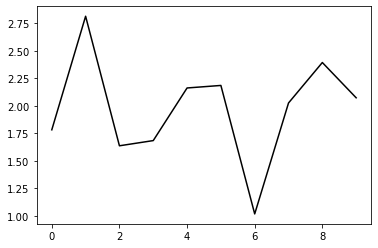

In [4]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


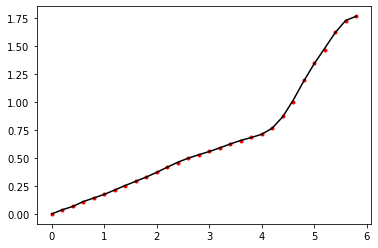

In [7]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [8]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [9]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

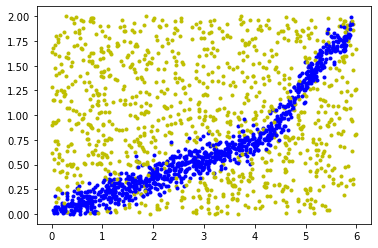

In [10]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [11]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [12]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [13]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

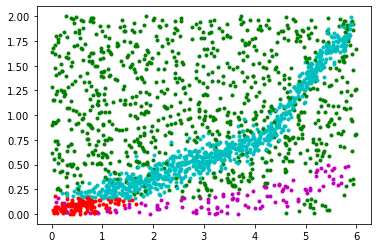

In [14]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [15]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_p+sum_n+E_reg1+E_reg2

In [16]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(0.9927368510290617, shape=(), dtype=float64)
tf.Tensor(0.9632115035870786, shape=(), dtype=float64)
tf.Tensor(0.9981934331730619, shape=(), dtype=float64)
tf.Tensor(1.0454572175699737, shape=(), dtype=float64)
tf.Tensor(1.0092157774415023, shape=(), dtype=float64)
tf.Tensor(1.047504526780201, shape=(), dtype=float64)
tf.Tensor(1.0238327459652654, shape=(), dtype=float64)
tf.Tensor(0.9872479493370312, shape=(), dtype=float64)
tf.Tensor(0.9822126536316902, shape=(), dtype=float64)
tf.Tensor(1.0104054580486457, shape=(), dtype=float64)


# Optimize

0 0.9331554494737266
0.2006616585705763 2.1268898894068102 0.06488254584546671 -0.03065174825397792
[1.68181249 2.71540932 1.73639374 1.7831358  2.06259378 2.08560944
 0.91634707 1.92595607 2.29423246 2.17324163]


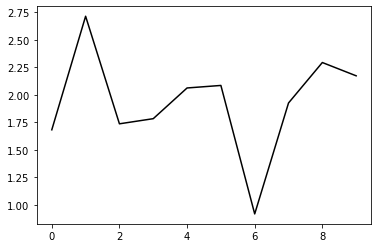

1100 0.8777772237921238
0.260683190149398 2.0596510101865126 0.04118358750131223 -0.04843804521721774
[1.40307699 1.93073095 1.85626125 1.6847676  1.77314661 1.75465793
 0.74938434 1.62849638 2.01011815 3.22638117]


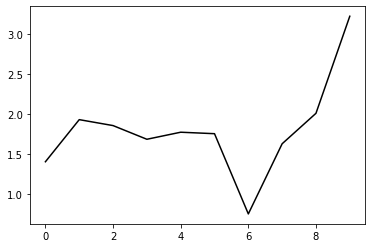

2200 0.7323192307178025
0.20351309127893347 2.0340601458147143 -0.00956936744754322 -0.03365806552453561
[1.52829226 1.37251001 1.28835203 1.19936465 1.17184376 1.08756755
 0.25099507 0.98659488 1.38497476 4.20727856]


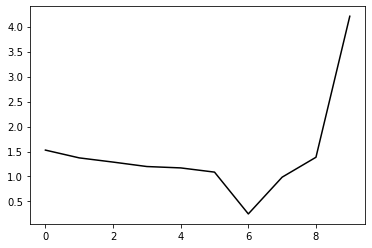

3300 0.9419289990424565
0.22585440925067685 2.088321608268078 -0.07799142089389885 -0.06880860201545251
[1.08611292 1.31894992 1.38664271 1.31038669 1.23674646 1.10120206
 0.38505786 1.01181961 1.42425297 5.13189114]


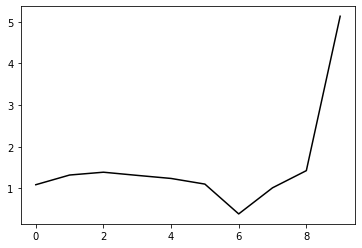

4400 0.8844190438926011
0.2734378033606769 2.0213868812415705 -0.043024320927867496 -0.07867598636416817
[0.98846077 1.15159473 1.29021846 1.2369039  1.08103702 0.82878023
 0.13064107 0.58240561 0.94557756 6.00441137]


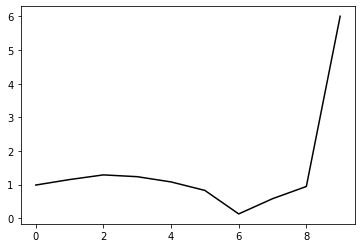

5500 0.5211442990418157
0.29441759063712475 1.977923665971495 -0.060281360283041735 -0.05219662803164516
[ 0.92904923  1.02394961  1.06372671  0.97156358  0.7402324   0.36586569
 -0.3840149  -0.12837871  0.13669893  6.79522483]


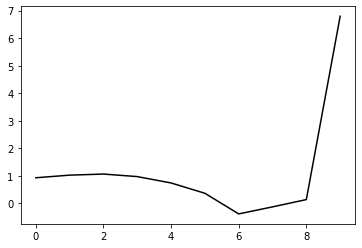

6600 0.7335260289954125
0.2781377961189688 1.9795809287577824 -0.05458341983904676 -0.0724346187362371
[ 0.93561534  0.93688476  0.96830011  0.87516545  0.63255677  0.2218464
 -0.52188431 -0.36162072 -0.12754727  7.4878927 ]


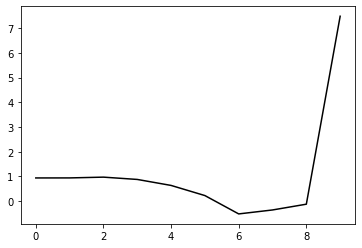

7700 0.4746815711034034
0.30682353554906616 1.94652717971782 -0.0727321394240598 -0.06662706999902056
[ 0.87207606  0.97079655  1.04895556  0.96887434  0.73042037  0.30673905
 -0.42133561 -0.32494867 -0.10329682  8.05255357]


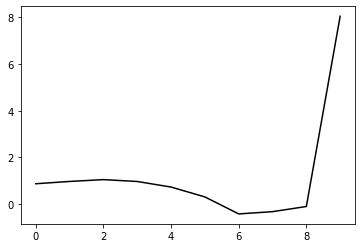

8800 0.7293988572896976
0.2952804862532754 1.9305911133432418 -0.050234313200390825 -0.07904587443333115
[ 0.88393893  0.85405902  0.91254954  0.83398687  0.57812094  0.11921454
 -0.6246948  -0.62229465 -0.44511857  8.42049545]


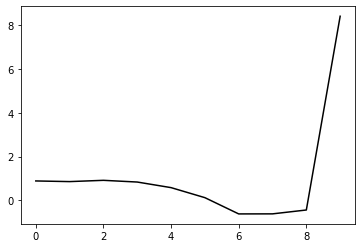

9900 0.5885567964440053
0.31900348536519674 1.8799434386670295 -0.051103835236909916 -0.07041046485015075
[ 0.78729509  0.99044761  1.07782067  1.00650133  0.75592203  0.28832476
 -0.45196177 -0.51375018 -0.36233449  8.54202217]


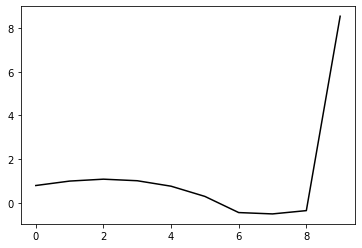

11000 0.501443809534581
0.3266252431812056 1.8588904993610695 -0.0710600293921616 -0.05950188418893692
[ 0.65228437  0.99753095  1.08094598  1.01908339  0.76337345  0.27738611
 -0.47392255 -0.60853222 -0.49415702  8.54512524]


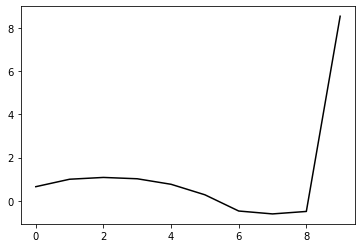

12100 0.4562723011869244
0.3394810255131418 1.8019785352150635 -0.060727431553168405 -0.057793577100458356
[ 0.65250662  0.90519779  1.00057123  0.93572085  0.67784824  0.18296971
 -0.56989668 -0.74831326 -0.64529436  8.54003799]


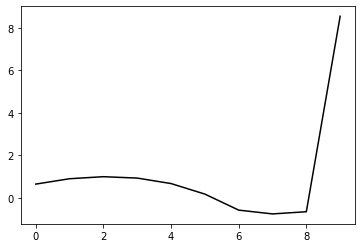

13200 0.5554062080664981
0.34460576003320437 1.7873898613693027 -0.03983882193748078 -0.08113174178428569
[ 0.68225802  0.9146243   1.09534598  1.07171093  0.83442837  0.34984519
 -0.3903555  -0.59736158 -0.49202201  8.55614081]


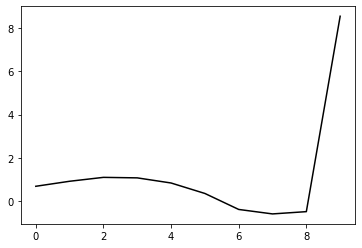

14300 0.834911128959096
0.34573698373826944 1.7239240466528507 -0.022743062069331743 -0.06734393308255361
[ 0.7274024   0.65081117  0.78183636  0.76365394  0.5224253   0.02262306
 -0.73095006 -0.99879567 -0.91964285  8.48370827]


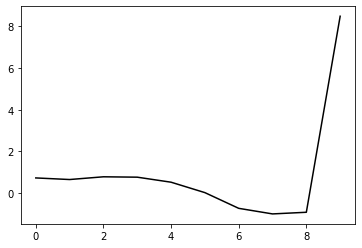

15400 0.8394001247583333
0.34754798273588083 1.7183874040438158 -0.027909043273212756 -0.08652781706864661
[ 0.74835192  0.7574057   0.86514647  0.8585482   0.64204247  0.15545964
 -0.59009356 -0.89131544 -0.82037694  8.50073669]


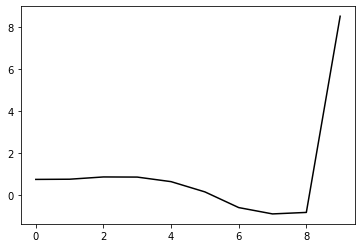

16500 0.3356380142546197
0.36251786612525383 1.6888506684362699 -0.05347167000467638 -0.07498622766156503
[ 0.60685724  0.87587794  0.97190902  0.95153951  0.74141111  0.25808417
 -0.4900882  -0.83347345 -0.78097045  8.51456333]


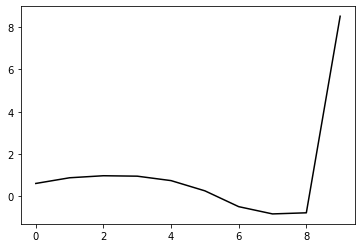

17600 0.45735686352184723
0.36387843147071747 1.6843743043327157 -0.06048528644077425 -0.07313270230728751
[ 0.66823832  0.67213802  0.77718764  0.76636657  0.56346029  0.08673591
 -0.66271621 -1.05629798 -1.02262521  8.49115533]


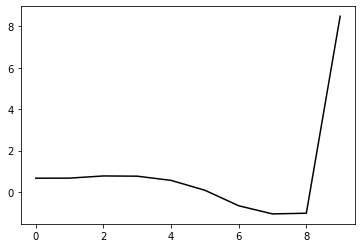

18700 0.715397482887532
0.3769609351966148 1.6841812878128315 -0.061879874055361946 -0.08706003524354605
[ 0.4773866   0.97723449  1.14521129  1.17226229  1.00432232  0.55882727
 -0.16949186 -0.58736555 -0.5526438   8.55856249]


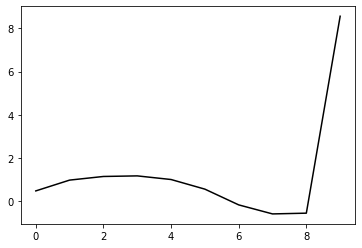

19800 0.4648790928666237
0.37514780134922315 1.6598026173523617 -0.05341597528349971 -0.09202853642357349
[ 0.63455419  0.81344387  0.94878419  0.971512    0.80483315  0.3605494
 -0.3742774  -0.84566382 -0.8423162   8.49440391]


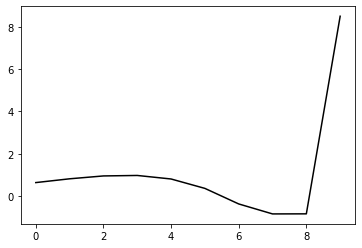

20900 0.7437737427480889
0.3751261642865498 1.6136619423834504 -0.04264561671800635 -0.09083836077435178
[ 0.7053418   0.65825309  0.76650314  0.77789602  0.60610253  0.15906011
 -0.58586119 -1.11469633 -1.15002329  8.41470578]


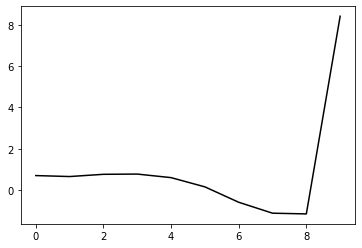

22000 0.5315384283542547
0.3939026202660988 1.5656129007365494 -0.059466784071712984 -0.07917980002531205
[ 0.50818484  0.86757952  0.96508048  0.9648748   0.7948817   0.35261904
 -0.39446293 -0.96405686 -1.02677536  8.49349464]


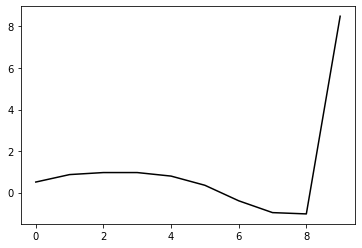

23100 0.40470994487162226
0.4012555173332783 1.4770417832622482 -0.046806611734076436 -0.06838381275153038
[ 0.50440818  0.76659087  0.84624006  0.82443788  0.64006826  0.19269015
 -0.56092047 -1.16795333 -1.25087813  8.52330859]


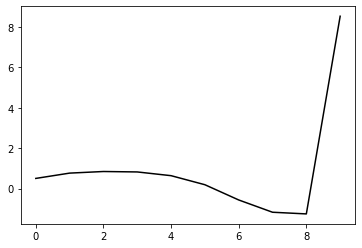

24200 0.6543802581349852
0.4079918572647273 1.4489524450563336 -0.05214792805992251 -0.06672962284157899
[ 0.4838626   0.76622125  0.85355789  0.84061569  0.66137337  0.22185643
 -0.52825042 -1.16270116 -1.26169951  8.46735644]


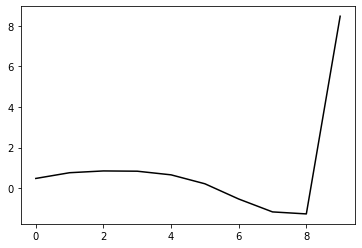

25300 0.5063181927090926
0.4093264854150011 1.4285617603688845 -0.051622289193457224 -0.07481798856335371
[ 0.48410158  0.82756322  0.87159106  0.85219756  0.68106071  0.25242432
 -0.49102679 -1.14919789 -1.26090131  8.45929142]


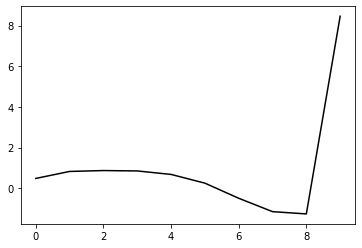

26400 0.5112061129483537
0.40134756693558127 1.38553117650264 -0.03646378895386471 -0.07911371551693328
[ 0.67443786  0.51822726  0.53187707  0.49927621  0.32452984 -0.09912982
 -0.83881272 -1.5203102  -1.64317487  8.43336234]


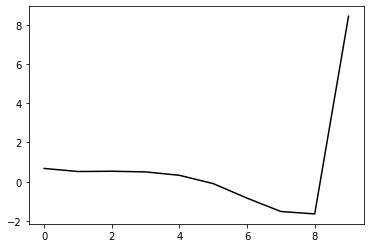

27500 0.3599055341994716
0.4150208726761219 1.3728002482957453 -0.056999361763051246 -0.08113172104950392
[ 0.54097622  0.83532643  0.8283572   0.77610359  0.60274019  0.18660241
 -0.54895782 -1.25082913 -1.38861695  8.41914261]


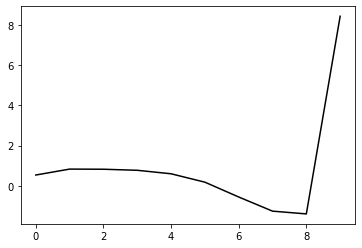

28600 0.48295023670859066
0.4169628789935285 1.332796840176418 -0.0491095449969535 -0.08563683511023572
[ 0.59417255  0.76921662  0.79679429  0.73934826  0.55692371  0.1434329
 -0.58867059 -1.31305346 -1.46524859  8.4147673 ]


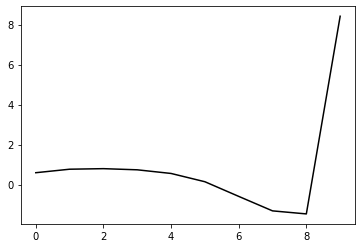

29700 0.515014725351842
0.4284188150050437 1.3469663906302896 -0.051063100880226794 -0.09917843068866405
[ 0.6705981   0.70458721  0.86088073  0.86448024  0.71294715  0.3319924
 -0.3674536  -1.08538697 -1.22009492  8.41274257]


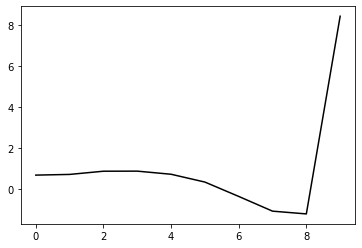

30800 0.5755889132552872
0.4370611653271378 1.31047823159541 -0.05959563031625991 -0.09177561467721145
[ 0.47668769  0.87891147  0.98512955  0.99013853  0.83168391  0.43831922
 -0.27331954 -1.03247188 -1.2049928   8.4712729 ]


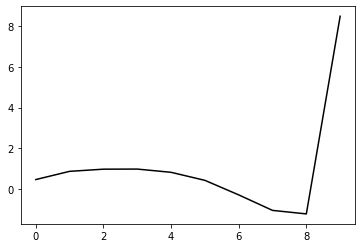

31900 0.5185624327663484
0.4329840625366127 1.2448086758440373 -0.048469736678665866 -0.08782151093645357
[ 0.6159782   0.6393826   0.71184263  0.70951703  0.55040757  0.1549182
 -0.55868403 -1.34083511 -1.53241924  8.35617642]


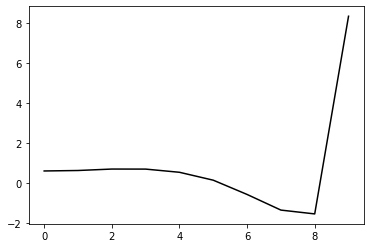

33000 0.5427557518383417
0.4332068971298951 1.2243216492483495 -0.04827776954955188 -0.08848971884184108
[ 0.63852223  0.54012063  0.60528263  0.60112052  0.44530963  0.05305184
 -0.65875415 -1.45838451 -1.6632783   8.41784755]


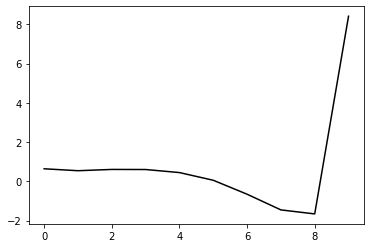

34100 0.4704318332022851
0.4401948194096089 1.179587179192756 -0.05622715697335072 -0.08390595899517815
[ 0.6839263   0.58896751  0.60711225  0.58532041  0.43120184  0.0427926
 -0.66724478 -1.48455636 -1.70579586  8.37729693]


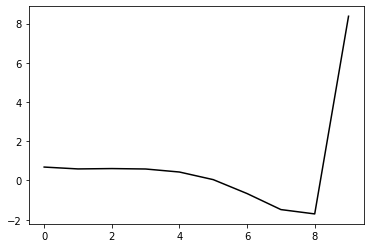

35200 0.4186597606640974
0.44557294268088193 1.1237579742119617 -0.05706128610232086 -0.08067463717330023
[ 0.64525818  0.59444058  0.60859537  0.5571964   0.38561817 -0.0125706
 -0.73462441 -1.58879014 -1.85054342  8.35681369]


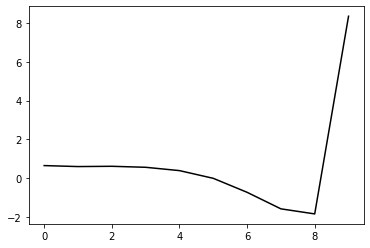

36300 0.4429159337386812
0.4603974601903079 1.0987813655559036 -0.05762322026421882 -0.09391179805312028
[ 0.57088184  0.72857084  0.81684926  0.78909217  0.63064734  0.25153668
 -0.45122373 -1.30514015 -1.56527196  8.4723152 ]


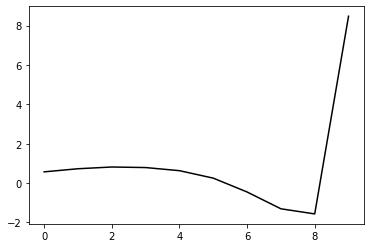

37400 0.4170740651127823
0.451047983077931 1.0944493739959658 -0.05893150728575331 -0.08976562495252538
[ 0.57344467  0.64362952  0.66046537  0.63429466  0.46773043  0.07952497
 -0.63277322 -1.51715681 -1.80984744  8.3674194 ]


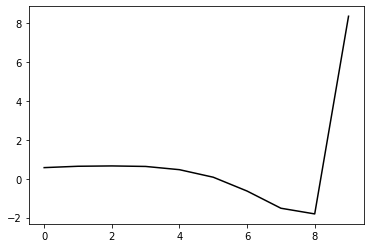

38500 0.3812985515583541
0.46306360059467105 1.0600016222532007 -0.06153380591119378 -0.09618707672239261
[ 0.51329837  0.81887099  0.84232586  0.80044907  0.63552692  0.25025315
 -0.46074457 -1.36345681 -1.67774733  8.38608555]


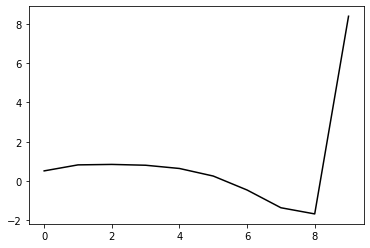

39600 0.4365542007267647
0.4549652891272508 1.0231228179933456 -0.05905233576299471 -0.09163629943411788
[ 0.59812301  0.65290272  0.62459635  0.55759543  0.37019197 -0.0324454
 -0.761034   -1.70252382 -2.06106764  8.26944868]


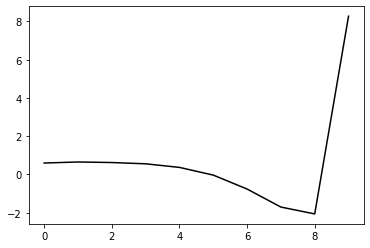

40700 0.43852143991601195
0.4544231961573188 0.9883166806468093 -0.05517426919879844 -0.09981189070938357
[ 0.66561535  0.61247798  0.58498351  0.50220672  0.30659253 -0.09955745
 -0.83179102 -1.79448413 -2.18170605  8.35656235]


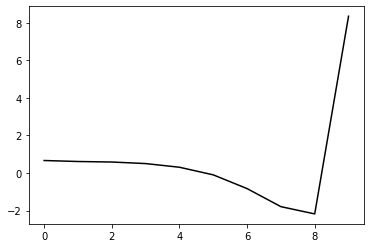

41800 0.3840013802999566
0.46966720150129454 0.9397370959703012 -0.059633974231961935 -0.09878555621061323
[ 0.60188456  0.73888942  0.76503855  0.68826847  0.49111452  0.08753746
 -0.64106734 -1.61622005 -2.02323289  8.28082454]


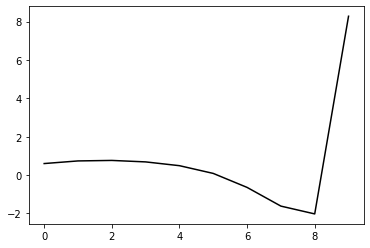

42900 0.6184540527239034
0.47122532136580997 0.9157669770661244 -0.05240421526361554 -0.1083861582038281
[ 0.67515648  0.6435014   0.70374728  0.64828424  0.4532819   0.05083389
 -0.67524244 -1.66237179 -2.08747472  8.32790975]


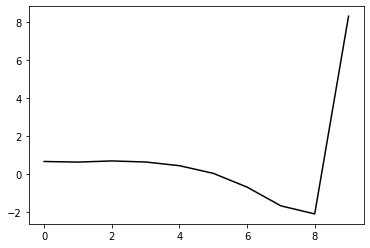

44000 0.5932459651290761
0.46823831857388576 0.8584915245841458 -0.053819690649396845 -0.09916185691459252
[ 0.69693802  0.59547064  0.60806905  0.55053043  0.35172245 -0.05916041
 -0.79409976 -1.8033483  -2.25850548  8.31180233]


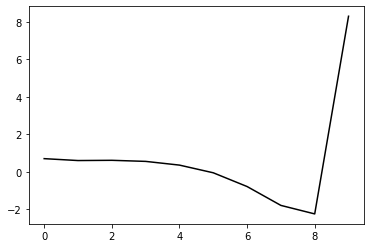

45100 0.3829934037858557
0.4859966998980678 0.82811368728847 -0.06144306977574129 -0.10318835960695928
[ 0.59725301  0.75697239  0.82972256  0.78069032  0.59007833  0.184446
 -0.54648234 -1.56257588 -2.03063572  8.38072009]


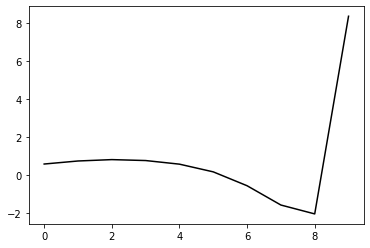

46200 0.7038464203361103
0.49122451922188576 0.733630617504585 -0.06652388135017102 -0.08702525907067162
[ 0.49818496  0.77663061  0.81288457  0.76018643  0.55958285  0.14045
 -0.60528003 -1.6479554  -2.15239191  8.27553065]


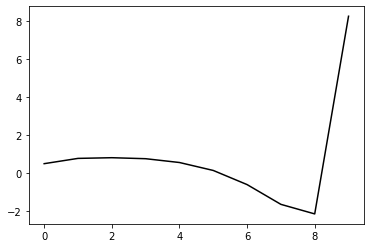

47300 0.60306538327477
0.4949830271797916 0.6962121929434182 -0.058955896590582986 -0.09938192945936429
[ 0.67703798  0.54295911  0.61697403  0.57972466  0.39232958 -0.01667262
 -0.75326696 -1.79547504 -2.30096623  8.38743166]


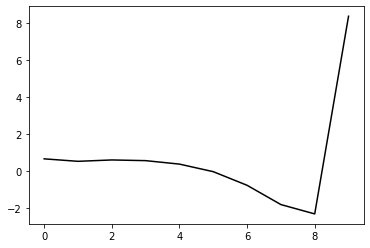

48400 0.4445673236774644
0.494293407304781 0.6468449578890394 -0.06425798367597196 -0.09208083507054012
[ 0.66492334  0.63450934  0.6420516   0.58903123  0.39748209 -0.0198037
 -0.76931606 -1.83732102 -2.37950828  8.28670545]


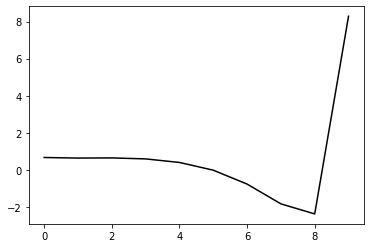

49500 0.3519050442726982
0.5079503435608026 0.6254523318777307 -0.06452076547748138 -0.10634910165057485
[ 0.64438234  0.65872674  0.75164417  0.7122642   0.52889927  0.12032602
 -0.62362296 -1.69630947 -2.2498813   8.32050491]


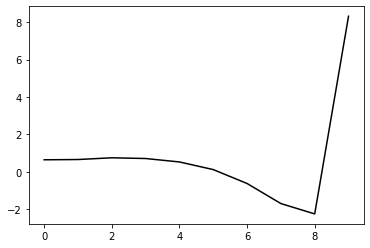

50600 0.4541944656070178
0.5066386725107409 0.5755959224626169 -0.0596647331456322 -0.10963938817343263
[ 0.59333293  0.68401118  0.767205    0.74358481  0.56120227  0.14970287
 -0.60068022 -1.69160575 -2.27434108  8.38604021]


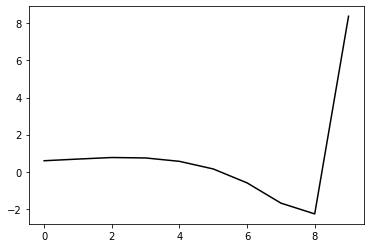

51700 0.3128855726392765
0.5170232160644583 0.5699137261584504 -0.06397452517161994 -0.1128094269068929
[ 0.57236859  0.7818568   0.88401179  0.89159344  0.74219478  0.35788324
 -0.36956932 -1.44693874 -2.0198044   8.34155788]


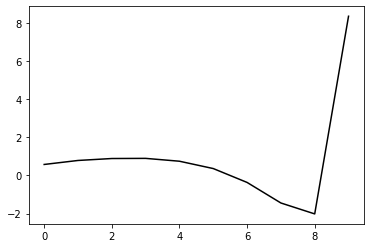

52800 0.569934039146406
0.49218773788570414 0.5550814932656849 -0.05848069074204549 -0.11001996841977853
[ 0.7296796   0.50710296  0.47482288  0.42617122  0.24464505 -0.17349972
 -0.94041867 -2.07052438 -2.70963523  8.19853956]


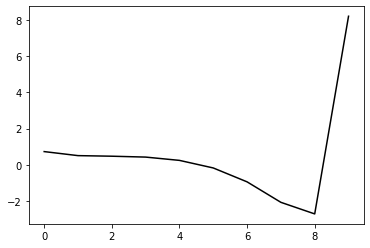

53900 0.5918008830703082
0.5082867943350873 0.5184895742469272 -0.07293989211062085 -0.10209578180436088
[ 0.5378272   0.76728157  0.7475864   0.67223322  0.48050501  0.05711775
 -0.72155965 -1.87774105 -2.55961995  8.29918478]


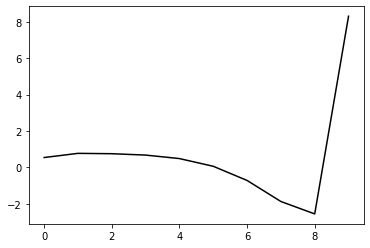

55000 0.35204376678976007
0.5124319708153939 0.48604780036978956 -0.07326978588730353 -0.10638661483392446
[ 0.56463591  0.75038096  0.76973618  0.69516912  0.50149514  0.08450763
 -0.68913406 -1.84975558 -2.54285088  8.27702858]


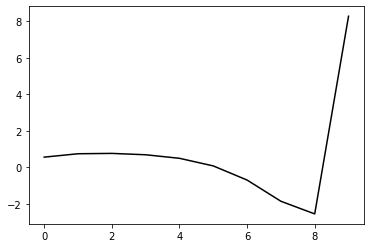

56100 0.39049759539807705
0.5183932716723259 0.41497485206474166 -0.07184427225494458 -0.1078268031839279
[ 0.56498588  0.78126896  0.82529229  0.76385978  0.56828853  0.15161143
 -0.62282274 -1.79603754 -2.51503967  8.32110829]


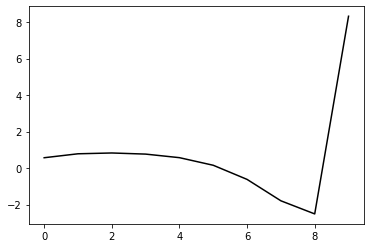

57200 0.4003196654997481
0.5168736743436938 0.36123038031178484 -0.06849313662140882 -0.10918999071331126
[ 0.65529294  0.64504758  0.69427175  0.64162309  0.44149812  0.01686556
 -0.76689479 -1.96084095 -2.71277672  8.19433156]


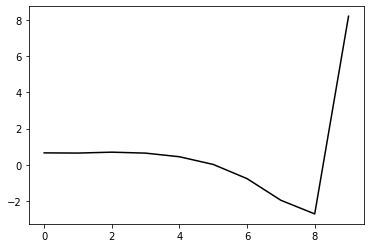

58300 0.46148179322330046
0.5286633896697213 0.38284328246748617 -0.07046051447759123 -0.11818317159521628
[ 0.63370254  0.6999219   0.80586101  0.79650778  0.6322434   0.2376378
 -0.51815081 -1.69243046 -2.43012451  8.3243967 ]


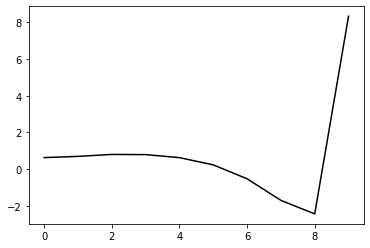

59400 0.44326352641801164
0.5169864618012164 0.32885011602408065 -0.07644917457821027 -0.10066843370211156
[ 0.64441779  0.55721486  0.54680851  0.49675822  0.30124146 -0.13138825
 -0.93107584 -2.16482964 -2.98433476  8.24054409]


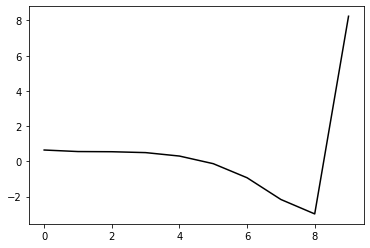

60500 0.33510453243202365
0.5234763155728209 0.28894528319761403 -0.07216548290221009 -0.11397552726045374
[ 0.63528302  0.69410481  0.70517915  0.65126046  0.46732606  0.04817503
 -0.74043679 -1.96918147 -2.78974012  8.20828793]


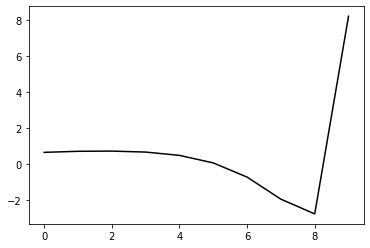

61600 0.3894478244504986
0.5286531655336215 0.24528109611639318 -0.07259796199575866 -0.11470483408734156
[ 0.60884561  0.70116818  0.74993238  0.70291592  0.51925561  0.10350048
 -0.68396375 -1.91923066 -2.75480836  8.2623828 ]


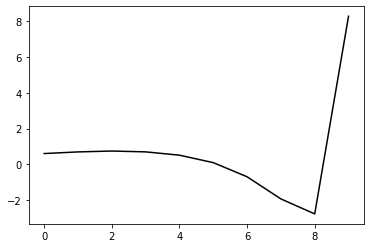

62700 0.3369731419835622
0.5377857762371266 0.19361701925142571 -0.07276371272793293 -0.11923929387556352
[ 0.65321481  0.65575213  0.7368107   0.70844044  0.53255646  0.12362862
 -0.65898379 -1.89763031 -2.74589314  8.23021471]


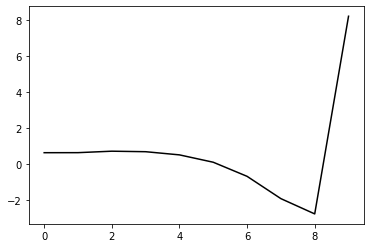

63800 0.5443321700413531
0.539530426865838 0.1451903019850643 -0.0774948569360204 -0.11239681494209415
[ 0.50935453  0.77459406  0.83346126  0.80903337  0.63316175  0.21995955
 -0.56998408 -1.82572778 -2.70442601  8.20442012]


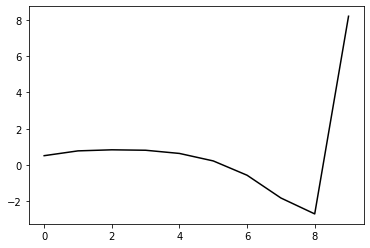

64900 0.44243107504338053
0.5458012430159582 0.09488044482255084 -0.07393880631581322 -0.1233899001581877
[ 0.59382691  0.78943229  0.85981306  0.84434129  0.68410405  0.28491218
 -0.49327431 -1.74321257 -2.62228088  8.29450351]


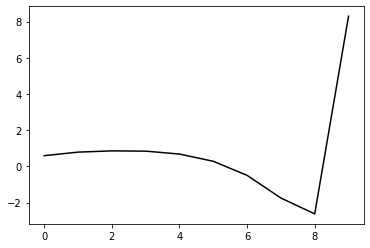

66000 0.3496648160667339
0.53933945617081 0.02225997726006556 -0.08098355730471546 -0.10686542963489491
[ 0.59180626  0.65540762  0.68375807  0.6454629   0.4669484   0.04860933
 -0.75277282 -2.03671552 -2.96754055  8.12304794]


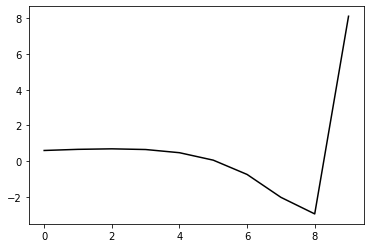

67100 0.35094708273626607
0.5341240081343614 -0.09693901271105214 -0.08380985405221889 -0.1015358788139093
[ 0.61545213  0.63120027  0.6294551   0.57923652  0.40047556 -0.01625415
 -0.81828826 -2.10927525 -3.05612183  8.2262258 ]


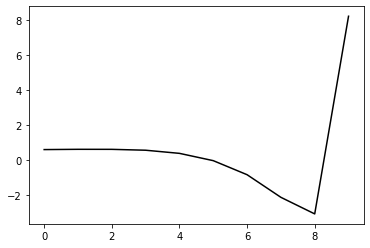

68200 0.41382446351318875
0.5276434034189038 -0.2399486283008193 -0.08257316810228353 -0.11061561422771518
[ 0.78045843  0.56215104  0.54750272  0.49295793  0.32293093 -0.08031324
 -0.8707384  -2.1561659  -3.10357364  8.21466123]


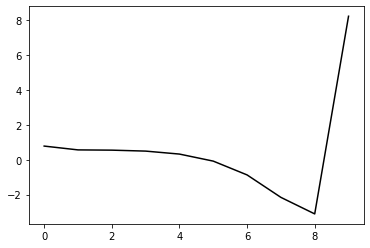

69300 0.8173022769784238
0.5105613085905455 -0.3465859545340111 -0.07432755485982721 -0.13214705793124795
[ 0.86429122  0.55108333  0.52884583  0.46523205  0.29070899 -0.11196906
 -0.90400678 -2.19936781 -3.16854003  8.17171023]


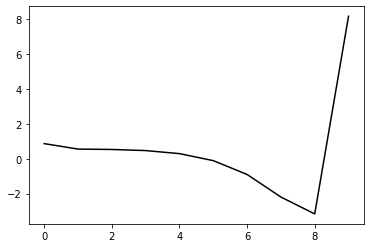

70400 0.4296001752949431
0.506833430156813 -0.4135977791885729 -0.09223337303141003 -0.12161058152626422
[ 0.73077186  0.72602665  0.64888416  0.54998556  0.34623646 -0.0839248
 -0.90860246 -2.25102607 -3.29127175  8.1828698 ]


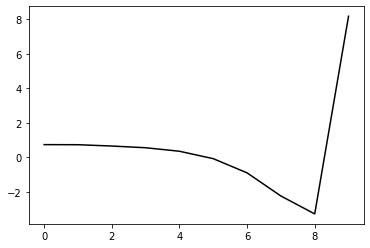

71500 0.44729714960804273
0.49882988390026195 -0.49955638270760605 -0.09643922659232004 -0.13938415346629787
[ 0.84626492  0.68626273  0.68307925  0.60667536  0.42323292  0.01990768
 -0.77695345 -2.09723539 -3.12175941  8.22629501]


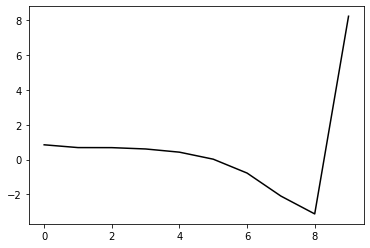

72600 0.15294190297282534
0.4996085245218462 -0.5794836125894132 -0.11334315137025397 -0.14575286486564518
[ 0.76826038  0.88399442  0.91259232  0.86418328  0.7032823   0.32608336
 -0.44303812 -1.74155688 -2.75174841  8.30602747]


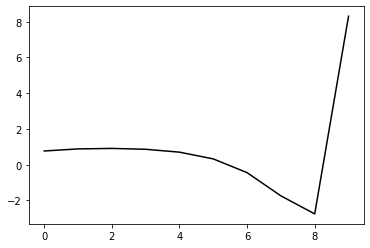

73700 0.1821760339439833
0.5011369761364314 -0.5997377035694844 -0.11675758515070193 -0.15279846055096424
[ 0.77873297  1.01498255  1.07108033  1.05660004  0.92248825  0.56870467
 -0.17998997 -1.46810066 -2.48046502  8.30688778]


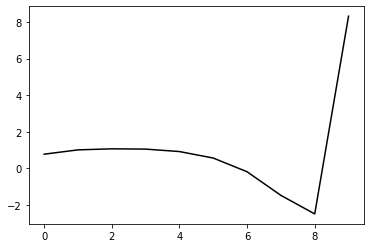

74800 0.18946925169994347
0.49782682777878207 -0.6059014849851897 -0.12359849573002649 -0.148429090241073
[ 0.80598908  0.96824336  1.0565608   1.08355584  0.98716043  0.66435554
 -0.06142957 -1.34433945 -2.3761111   8.26758008]


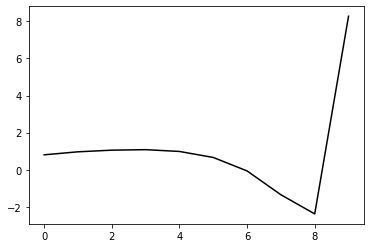

75900 0.28299291327553655
0.4901252498224581 -0.6077666920098442 -0.1251612323506515 -0.14666618043856458
[ 0.80417607  0.97325407  0.98137941  0.97774433  0.8777186   0.55839529
 -0.16265009 -1.45182019 -2.51426696  8.28791311]


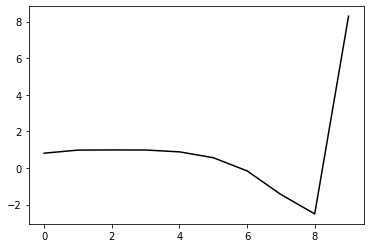

77000 0.27557257997842227
0.4777269691349776 -0.61220267836453 -0.12568210050559442 -0.14834398159505183
[ 0.89846184  0.9006055   0.93233862  0.92635929  0.82124676  0.50151939
 -0.22023827 -1.51778777 -2.60323923  8.26568764]


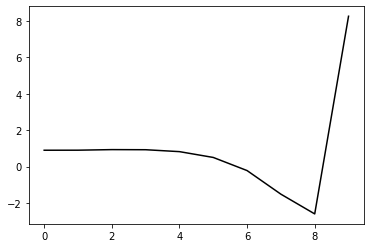

78100 0.1987232347330902
0.4874369619472582 -0.6067150499866649 -0.13014674804396836 -0.14427586253229147
[ 8.49548860e-01  9.99790735e-01  1.06831554e+00  1.08899367e+00
  1.00389568e+00  7.02257680e-01 -7.39096202e-03 -1.30844432e+00
 -2.42248054e+00  8.15553090e+00]


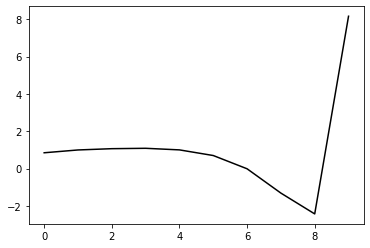

79200 0.3375642413184638
0.4613384530545247 -0.6225790328808841 -0.14165493287570788 -0.13119003712899752
[ 0.88544574  0.72710741  0.70644629  0.68669211  0.57720532  0.26197073
 -0.45439804 -1.76736446 -2.90845979  8.1979186 ]


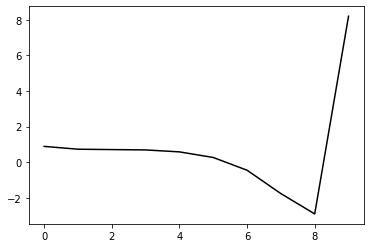

80300 0.28592896925704253
0.48929825509892444 -0.5953085264663173 -0.13126805854460905 -0.14346148415871132
[ 0.96435879  0.96529417  1.05758645  1.06331453  0.97101529  0.66971686
 -0.03816588 -1.35426798 -2.51653796  8.34911416]


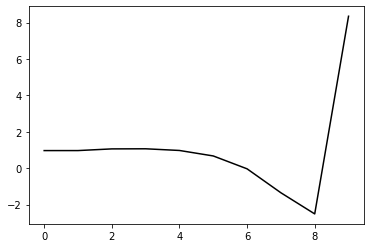

81400 0.28767097073404807
0.46295743227962755 -0.613181260890436 -0.140465195587254 -0.13504898196969076
[ 0.91448594  1.03863643  1.05283398  1.05862869  0.96031601  0.65183488
 -0.06415022 -1.39996598 -2.60755106  8.26039713]


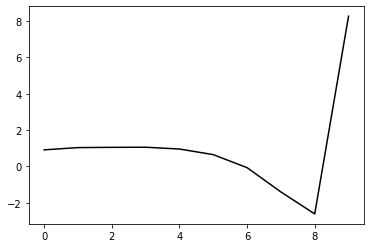

82500 0.19237271396404684
0.48103967497500255 -0.5889303299080189 -0.13302857914936167 -0.13561269954841115
[ 0.95079184  1.12165863  1.19344349  1.19319097  1.0908171   0.77836322
  0.05823383 -1.28778838 -2.51967484  8.27429281]


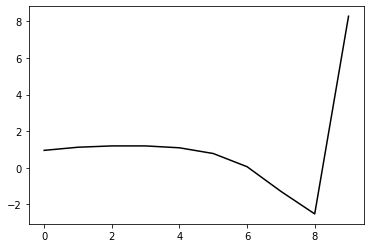

83600 0.15497890501564857
0.4872599072698773 -0.5817660678756725 -0.1316946046222443 -0.13575565082087113
[ 0.95572465  1.0027365   1.13043791  1.18306375  1.10566168  0.81303469
  0.1113827  -1.22630864 -2.4711672   8.23282262]


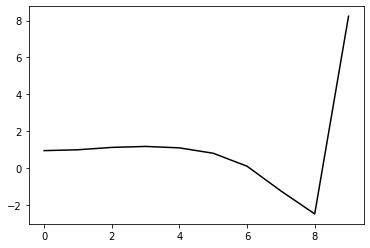

84700 0.26216375453424096
0.43333596454117107 -0.6043770425417453 -0.1395005915068052 -0.12769278137257445
[ 0.96815021  0.79980578  0.72585982  0.70970506  0.59697423  0.27804353
 -0.44004295 -1.79374378 -3.06572081  8.22421303]


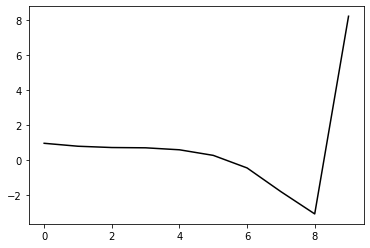

85800 0.2149089399821681
0.49165193647783084 -0.5794138295080772 -0.13527650105276873 -0.1387801651708181
[ 0.89488323  1.26366805  1.3374628   1.32417852  1.21800064  0.90367739
  0.18567731 -1.175437   -2.46912531  8.22043833]


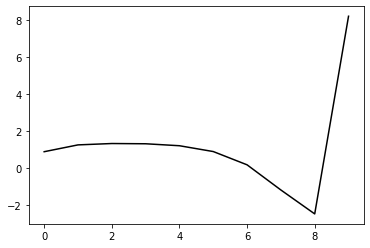

86900 0.29829164812082004
0.4897603116619489 -0.5718290439482134 -0.13352116448324008 -0.135765309133862
[ 0.9934076   1.07520254  1.21153303  1.24755042  1.16270535  0.86514305
  0.15925707 -1.2019385  -2.52054645  8.31449035]


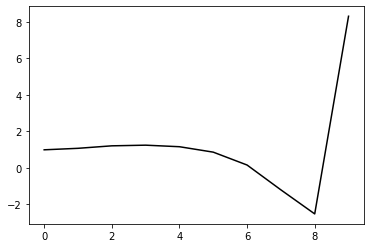

88000 0.38446774935442746
0.47382907481686287 -0.5808433301802686 -0.14013012284706852 -0.12801982396407977
[ 0.8924576   1.07162888  1.13923023  1.16471283  1.06580683  0.74614177
  0.01747456 -1.37393173 -2.75028478  8.23771403]


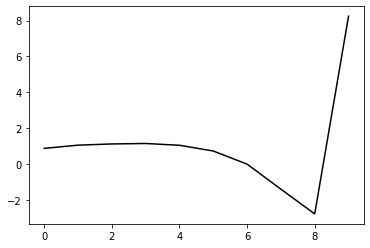

89100 0.3365996951828121
0.46013445928129304 -0.578308590309471 -0.14240616158813746 -0.11910511209968835
[ 0.92703029  0.97955211  1.02704626  1.04396962  0.95021803  0.63513675
 -0.09576167 -1.50663412 -2.94093316  8.24405052]


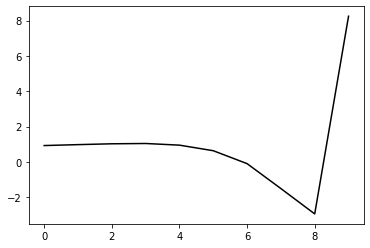

90200 0.268883575228747
0.4886826784712337 -0.558714684666812 -0.13423210044862002 -0.13398131309264785
[ 1.04955741  1.21531658  1.34240228  1.38742546  1.32357123  1.03645862
  0.32890957 -1.06468609 -2.49317885  8.3641581 ]


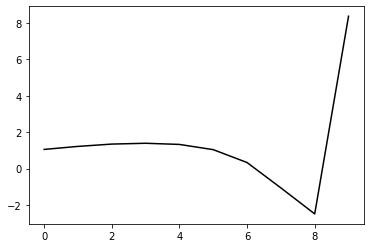

91300 0.43624151080630724
0.4708516506612713 -0.5514924959287207 -0.12715442989671857 -0.1318706357115442
[ 1.07066989  1.0714148   1.13664538  1.13790692  1.03019911  0.7054956
 -0.03526673 -1.46317279 -2.94158085  8.21005012]


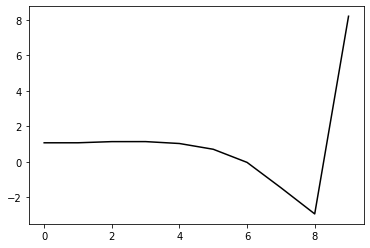

92400 0.25783123039878086
0.48269289029576534 -0.5664826083588335 -0.14070265928182699 -0.1306925249410617
[ 0.95027436  1.20642829  1.33790605  1.35673632  1.25162605  0.92900368
  0.19185668 -1.23246807 -2.71383313  8.26686943]


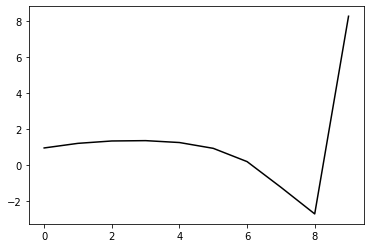

93500 0.3076845169703274
0.4429845590740152 -0.5805553593385375 -0.14668117286723997 -0.12674495382898177
[ 1.06831199  0.95575776  0.99545429  0.99442899  0.87218128  0.53620646
 -0.20862579 -1.64196556 -3.14726537  8.17753121]


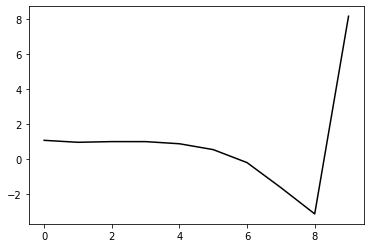

94600 0.15564508095651883
0.4823831526491631 -0.5534136922217929 -0.13634168212040704 -0.13436637142570876
[ 1.01872995  1.2379937   1.36522388  1.38071494  1.26270169  0.92225449
  0.16912442 -1.27683166 -2.80826515  8.21129513]


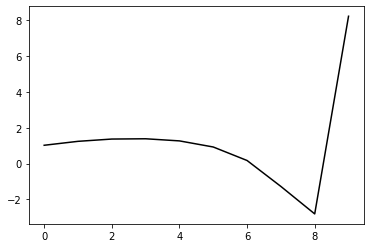

95700 0.1936602539285012
0.4865168865878868 -0.5537936835523036 -0.13927703945633566 -0.13279394014554086
[ 0.98344297  1.1694627   1.33809095  1.41685901  1.33589967  1.01766311
  0.2807187  -1.15589803 -2.69558646  8.23871737]


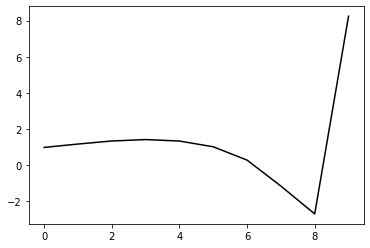

96800 0.30242842014057936
0.46286699032355927 -0.5616827905448529 -0.14391715240691275 -0.12608092469412518
[ 1.09955904e+00  9.80682893e-01  1.07059034e+00  1.13428505e+00
  1.06316097e+00  7.46298501e-01  3.37298293e-03 -1.44758105e+00
 -3.02680412e+00  8.31084942e+00]


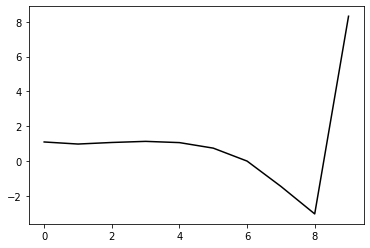

97900 0.2688701912154045
0.4841105392034909 -0.5469393428684611 -0.14026829166481736 -0.12480867734999569
[ 0.98644175  1.23104203  1.36893329  1.44243684  1.38977513  1.08863261
  0.35028781 -1.10762208 -2.72025305  8.26773986]


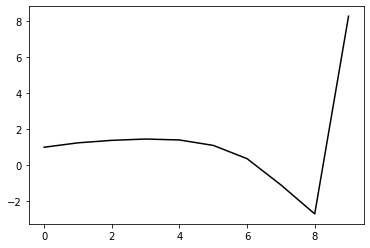

99000 0.22262974896466736
0.47201412615301164 -0.5563734833782913 -0.14564520755039606 -0.12616123711144567
[ 1.04370624  1.1380426   1.27835515  1.39753074  1.40238948  1.1636033
  0.47946154 -0.93698084 -2.53328606  8.26528384]


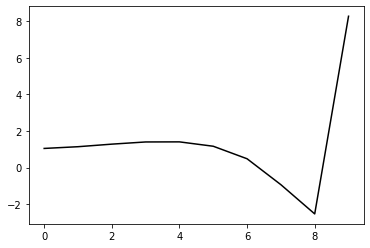

100100 0.3601013333183796
0.4549249645255592 -0.5440317849088556 -0.13651789912116716 -0.1270884989826419
[ 1.23471177  0.85651623  0.91008303  0.9588215   0.91933712  0.65515711
 -0.05160974 -1.50072846 -3.16599234  8.32575594]


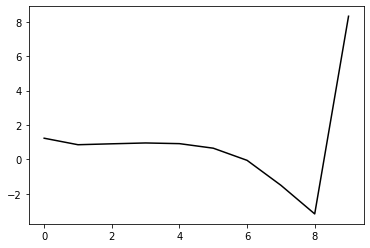

101200 0.19438797165302366
0.47870516478348063 -0.5392870940483485 -0.1402930180429135 -0.13006640208846884
[ 1.00346625  1.43179135  1.48177864  1.47549063  1.3881263   1.08028013
  0.33097843 -1.16266286 -2.88450795  8.21102037]


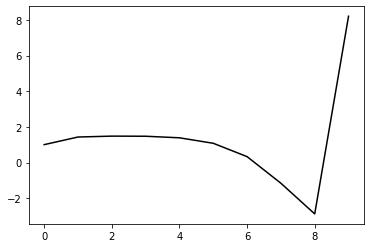

102300 0.23463480583423124
0.4727039111731149 -0.5416734339687569 -0.14266975515561853 -0.131807032068431
[ 1.02272042  1.23071662  1.38413829  1.42817866  1.35628157  1.06696459
  0.33618015 -1.1455651  -2.87025805  8.26371794]


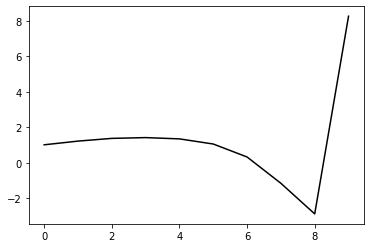

103400 0.2228625338007897
0.46918570072453086 -0.5398279229490819 -0.14515673213411737 -0.12525800961461736
[ 1.0196359   1.30448048  1.45239091  1.51772435  1.44998193  1.15632358
  0.41870741 -1.08109615 -2.85303442  8.26171414]


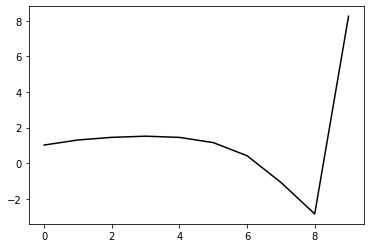

104500 0.19941101706999284
0.46631562088949224 -0.5339970195330911 -0.14421290427326594 -0.12249528172525367
[ 1.09067364  1.25517197  1.3869218   1.44788701  1.38016424  1.08216134
  0.34108345 -1.1669992  -2.9654862   8.20518497]


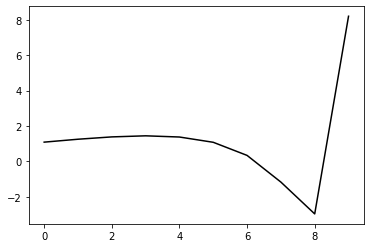

105600 0.19703119679063089
0.47617142344013463 -0.5253413010316765 -0.14097610007353292 -0.1272085723058777
[ 1.11999878  1.30962904  1.50739817  1.6228941   1.59865264  1.33350179
  0.61721302 -0.87816172 -2.68832336  8.19997882]


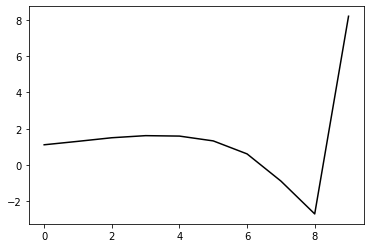

106700 0.1980880023642406
0.4721195127618529 -0.5183974480838874 -0.13848595762277263 -0.124241612824742
[ 1.10073409  1.33570171  1.50910177  1.63005407  1.61843418  1.3577752
  0.63782047 -0.87487293 -2.73764567  8.27144004]


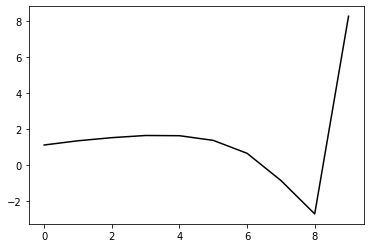

107800 0.19313382771635906
0.4666845811259758 -0.5245880121645905 -0.145012090934218 -0.12110123100362462
[ 1.05747076  1.39902901  1.55493812  1.62926762  1.57710153  1.27707032
  0.51938185 -1.02969443 -2.93855356  8.19395883]


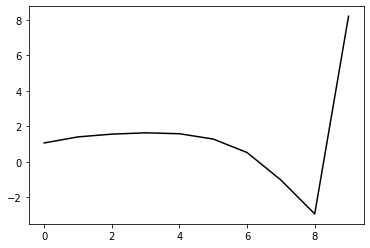

108900 0.2684283667090718
0.4556246868917428 -0.5262104971201922 -0.1471050918286729 -0.11890237987184865
[ 1.05620955  1.4064868   1.53929234  1.59150468  1.51555849  1.19578709
  0.42026717 -1.14694787 -3.08376395  8.13838969]


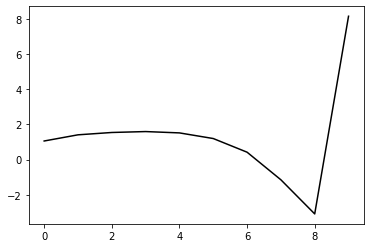

110000 0.24215705179155395
0.4628212690199523 -0.5171770028195051 -0.14434430541572643 -0.12220884628814759
[ 1.0464795   1.3906627   1.59251841  1.69016014  1.6371321   1.33296316
  0.56578444 -1.00369276 -2.96534897  8.15812469]


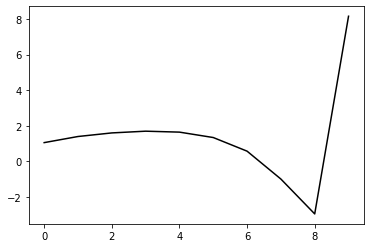

111100 0.15965531333524344
0.46753740752176615 -0.5132157344354283 -0.14440176087633577 -0.12046207144201891
[ 1.08993129  1.36625441  1.59271296  1.74009708  1.73991825  1.48081063
  0.75098409 -0.79285681 -2.75424625  8.29989019]


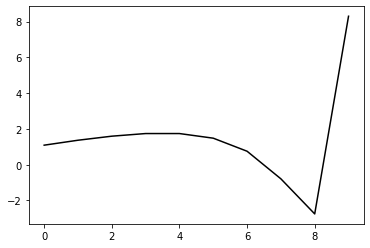

112200 0.41684449949235014
0.435444863463447 -0.5107517170772236 -0.13682207545676742 -0.12622419383928615
[ 1.23370714  1.03122758  1.13409382  1.2399998   1.22313586  0.95802179
  0.22797705 -1.31735857 -3.30348019  8.12467326]


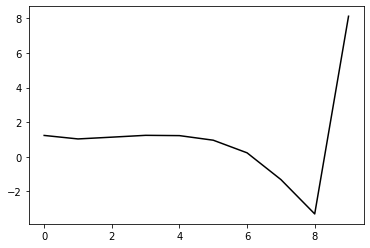

113300 0.22360868795612981
0.47170425882107864 -0.5038104677385393 -0.14058588313244333 -0.12103582378443113
[ 1.05222321  1.44989519  1.58146389  1.61773148  1.54350443  1.22696251
  0.44861211 -1.14197955 -3.18009747  8.19748088]


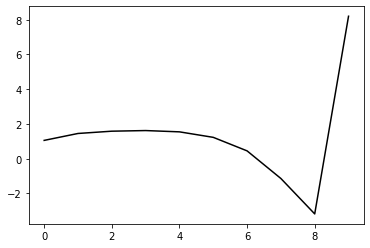

114400 0.5964105588435464
0.4449148109433513 -0.5013460460648017 -0.13359309211390066 -0.13251454779959845
[ 1.1870563   1.16115699  1.31244162  1.36255294  1.27471957  0.95073618
  0.16977224 -1.42280047 -3.47253629  8.11551662]


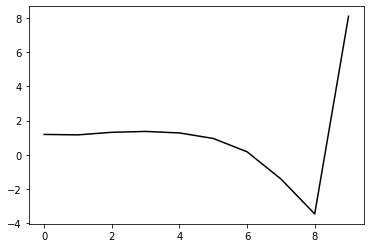

115500 0.19919803190932678
0.46771364927507303 -0.5096309457743391 -0.14797751660421452 -0.12828485898840344
[ 1.09583624  1.29951266  1.53840674  1.63565965  1.57544821  1.26837693
  0.49918831 -1.0882507  -3.14652024  8.20670704]


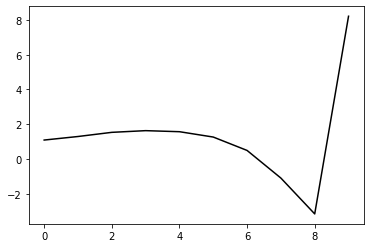

116600 0.15258214715780702
0.4687960908542606 -0.4990812412879837 -0.1437696561338463 -0.12428730959398604
[ 1.09128528  1.2419647   1.45628274  1.59254969  1.56159357  1.26969093
  0.50888833 -1.08083985 -3.16871723  8.17567173]


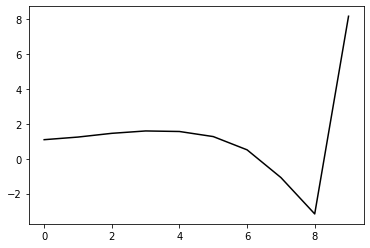

117700 0.2106546882251352
0.44108469964863956 -0.5135320643927921 -0.14920341889794447 -0.1291803605337771
[ 1.117483    1.24939161  1.37218557  1.47092627  1.42658064  1.11984327
  0.34529582 -1.25603967 -3.36320586  8.14556625]


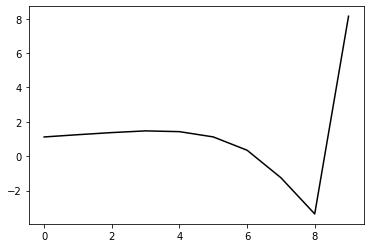

118800 0.2104783598092604
0.45266182522132603 -0.5093667640805596 -0.1503245992156476 -0.12665509043558812
[ 1.03277704  1.41509108  1.55572041  1.63240625  1.57793215  1.26165082
  0.47316637 -1.14670172 -3.28755742  8.15544503]


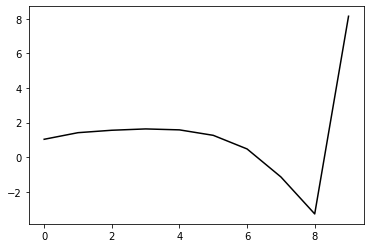

119900 0.266077964306595
0.4637994469572221 -0.5022212440078149 -0.14876673638109725 -0.12768586740690352
[ 1.02337389  1.3587971   1.58833867  1.70677194  1.67578935  1.38309386
  0.61294675 -0.99535403 -3.14038532  8.18414047]


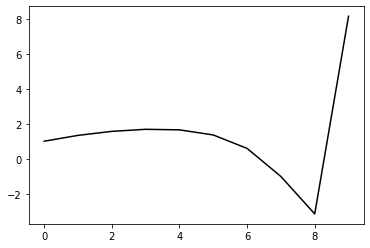

121000 0.3831273129983672
0.45678791144070574 -0.49485200171506416 -0.14499867126655971 -0.12869124139390864
[ 1.18910893  1.25299386  1.44655226  1.56784343  1.54318994  1.25287186
  0.48069839 -1.13672296 -3.31015749  8.14244897]


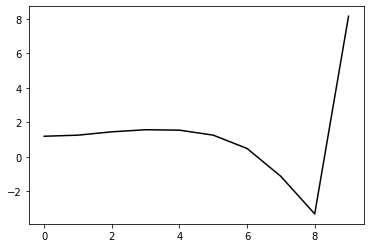

122100 0.1860560749534307
0.458369735580016 -0.48923057606366044 -0.14478568038906842 -0.12161488876271306
[ 1.00989922  1.40116391  1.52102022  1.59072436  1.53454968  1.21820775
  0.42008171 -1.22680525 -3.44655229  8.1372016 ]


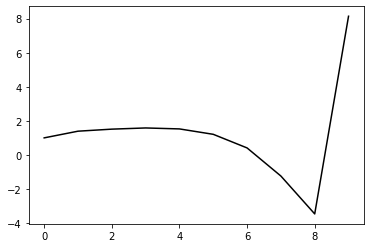

123200 0.2615440086695601
0.4470301222874116 -0.5007530959544677 -0.15129384995247902 -0.12255747698989636
[ 1.15581819  1.05345345  1.24808006  1.35347107  1.32432282  1.04132169
  0.27539695 -1.34319589 -3.54286894  8.12038305]


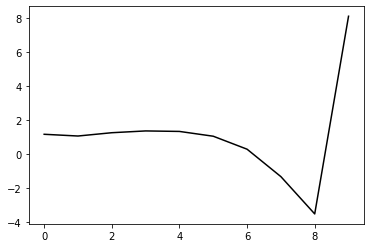

124300 0.4158846027312478
0.4213448996084141 -0.5164446359533887 -0.1603663311497013 -0.11631861265994196
[ 1.02827177  1.19866764  1.29896398  1.36803544  1.30775753  0.99544199
  0.20237356 -1.44485275 -3.68578639  8.18578254]


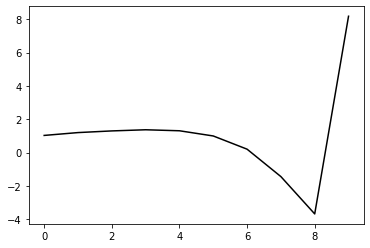

125400 0.2305666550405787
0.44844471830141747 -0.4932124941994715 -0.14934430500822293 -0.12799739675183233
[ 1.09236236  1.41531873  1.56782151  1.64270419  1.60037832  1.30563585
  0.52610603 -1.11402515 -3.35984765  8.0972781 ]


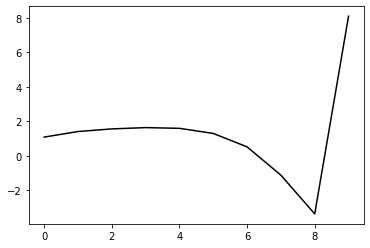

126500 0.20433081936263642
0.4583239579090045 -0.4885767242562053 -0.15076988259585955 -0.12409086415761349
[ 1.05904012  1.28861963  1.54634442  1.69033391  1.68084599  1.41417777
  0.65702538 -0.97180306 -3.22782068  8.21343672]


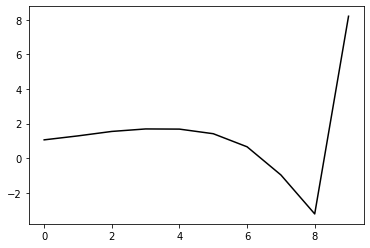

127600 0.1470027326869754
0.45573241250306706 -0.4796036041322506 -0.14729223123012486 -0.12145070821600533
[ 1.10730729  1.38458583  1.57557075  1.70912301  1.70209278  1.43038984
  0.66461709 -0.9822393  -3.28094842  8.1856631 ]


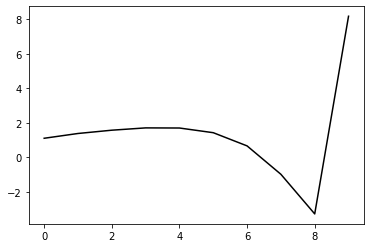

128700 0.1885542017630449
0.4477837407670007 -0.48711537778534475 -0.15230982048289354 -0.1226621679340779
[ 1.10537315  1.31240595  1.50076947  1.66510286  1.7007434   1.47059344
  0.73839737 -0.88679777 -3.18573829  8.1742575 ]


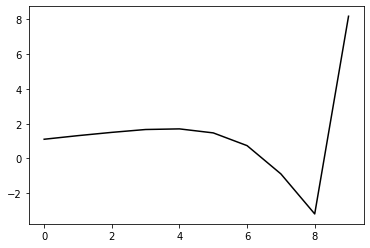

129800 0.25257817392490917
0.4334484058947633 -0.48421522670073674 -0.15346234296248934 -0.1140037688949788
[ 1.09543013  1.3561246   1.4681456   1.50850937  1.43952793  1.12832185
  0.33268258 -1.34666181 -3.70716282  8.09054583]


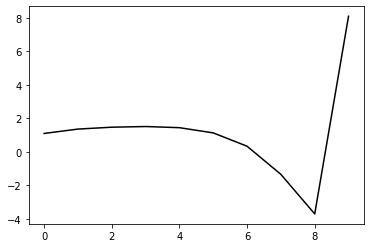

130900 0.6098072738873674
0.44610505461023875 -0.47013890557896215 -0.14561408388968267 -0.13029089261583812
[ 1.25476124  1.367725    1.60596417  1.71284283  1.67547925  1.38912317
  0.61237845 -1.0580018  -3.42780918  8.14437923]


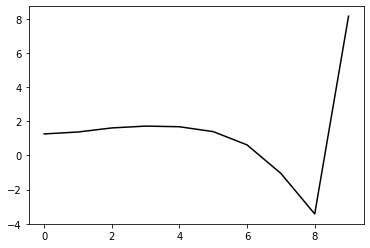

132000 0.23856205346744483
0.44466791955250773 -0.4775059507759535 -0.1542410039016202 -0.12247496851303748
[ 1.10082979  1.47143119  1.70266375  1.82193874  1.78501111  1.49224478
  0.71006825 -0.96897095 -3.36132583  8.1555587 ]


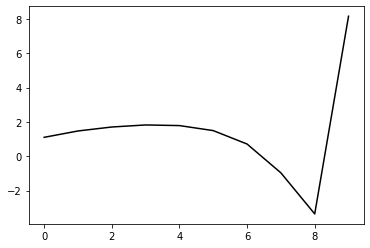

133100 0.19630241831530404
0.4532141909307049 -0.46712103431065544 -0.15153986687580176 -0.11801621202616974
[ 1.05484427  1.45751262  1.69895909  1.85574893  1.84999969  1.57483613
  0.80240279 -0.8798096  -3.30822849  8.19710949]


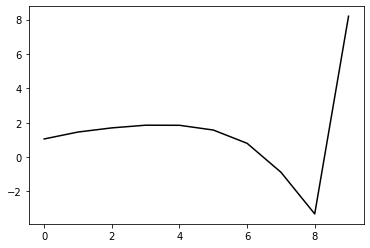

134200 0.27535803879873627
0.42584101945065433 -0.4660286430648331 -0.14714121628075455 -0.12102392927669325
[ 1.15317184  1.30323656  1.45004617  1.55868185  1.52210649  1.21851226
  0.42132897 -1.28295798 -3.74216947  8.06133788]


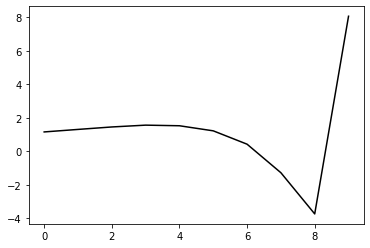

135300 0.26857861073170336
0.44023986169789836 -0.4718185121313665 -0.15627094673301475 -0.1172677755117505
[ 1.06805805  1.36744095  1.60315655  1.74987505  1.75080098  1.48083785
  0.70829633 -0.98157853 -3.44654651  8.1905874 ]


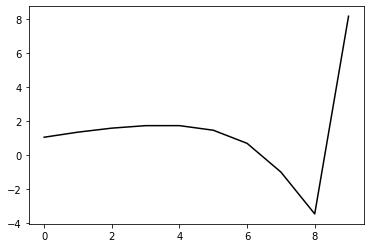

136400 0.26142385122935036
0.4342979865456693 -0.46665577846232936 -0.15353412781558776 -0.11584528902777654
[ 1.13945292  1.28560273  1.45040941  1.55904892  1.53665075  1.24729393
  0.45599239 -1.25259573 -3.74427906  8.01797236]


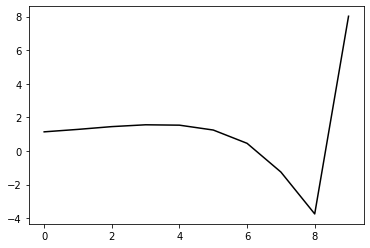

137500 0.2191954801603063
0.44150372535867227 -0.46347856747512156 -0.1543294026819347 -0.1174175619323805
[ 1.07810459  1.4514636   1.64137102  1.73817842  1.69739344  1.39250092
  0.58491208 -1.14274468 -3.66565645  8.04904578]


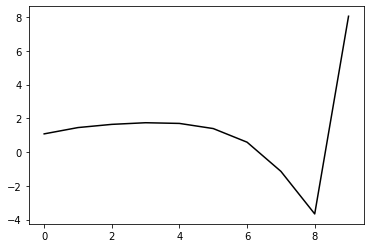

138600 0.15727618343620978
0.4432308342525138 -0.4611061268429441 -0.1528622942762847 -0.12424606461497749
[ 1.13538915  1.33220565  1.59296093  1.74967281  1.74848866  1.47830946
  0.6998234  -1.00740221 -3.52693546  8.12938717]


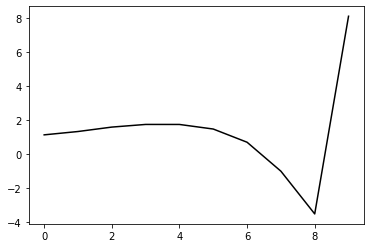

139700 0.24827201967372545
0.38615344265528473 -0.4821115312644074 -0.16295708393748115 -0.11207779691485294
[ 1.14830968  1.10480648  1.16488054  1.29586893  1.29791371  1.03344356
  0.26098179 -1.44578609 -3.98340284  8.06409934]


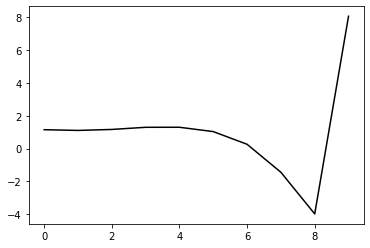

140800 0.25067172917462777
0.43584538058956995 -0.45865165126606533 -0.1552177736499679 -0.12205877002420154
[ 1.1726394   1.38560108  1.57588151  1.67984271  1.67844829  1.41572887
  0.64217269 -1.07037902 -3.62529524  8.11470739]


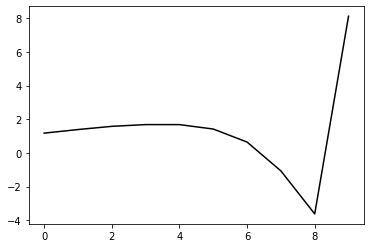

141900 0.30368893850198264
0.44281157264392884 -0.45086197140226403 -0.15227080802804882 -0.12209861764047936
[ 1.14561337  1.37972278  1.63128264  1.76853782  1.7729255   1.52107835
  0.75743239 -0.95231401 -3.52292185  8.14484107]


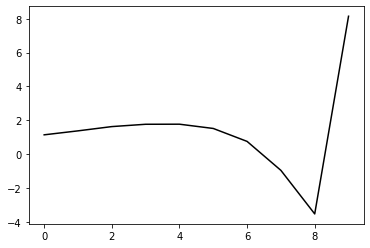

143000 0.23786518843469934
0.4378717658517456 -0.45293056034966106 -0.15422287524418354 -0.1212364337492909
[ 1.14847279  1.40723718  1.63892072  1.79541325  1.80644249  1.55544111
  0.79157949 -0.92453701 -3.51953334  8.06582026]


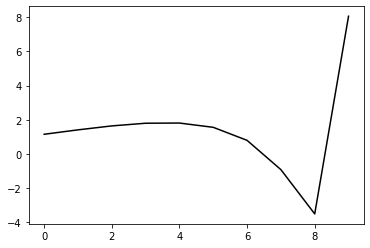

144100 0.2452681869531507
0.4449159605585647 -0.4502180656126927 -0.15481464349895097 -0.12051005346168023
[ 1.04138372  1.52241795  1.76851681  1.93628434  1.9625132   1.72253321
  0.96651303 -0.75016428 -3.36782231  8.12129872]


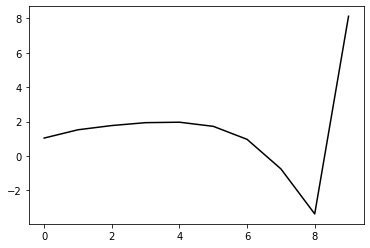

145200 0.275289268380428
0.4106841394186643 -0.47164200266616996 -0.1642314933979826 -0.11848361600532083
[ 1.11276186  1.24921893  1.40784572  1.52696472  1.52088224  1.25923908
  0.49100062 -1.23155682 -3.85643802  8.08192098]


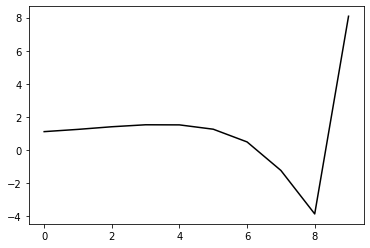

146300 0.21290221719234853
0.4387447929099435 -0.44814660925259225 -0.15357253134771773 -0.12033374019745856
[ 1.08083835  1.38107901  1.59173589  1.69034312  1.65942948  1.37813025
  0.59342882 -1.14610177 -3.79879538  8.11204413]


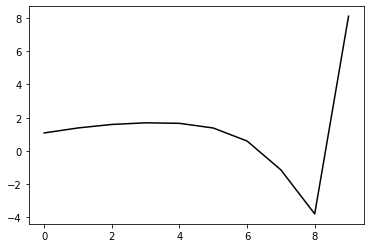

147400 0.4470480230836752
0.43561312148427783 -0.4460262150975517 -0.15194479629331928 -0.12613871851535438
[ 1.26030512  1.29012922  1.53166565  1.69811086  1.71495415  1.46887585
  0.71277192 -1.00727254 -3.65863141  8.07305718]


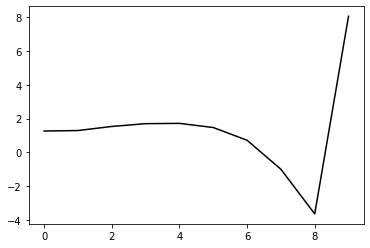

148500 0.1988022134695674
0.42287385761687857 -0.4548706487656092 -0.15874859102434852 -0.11758419407563381
[ 1.13691231  1.45348538  1.63137525  1.75099483  1.73117125  1.44954065
  0.66208976 -1.08709124 -3.77721562  8.08675699]


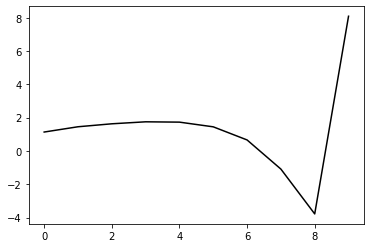

149600 0.17420847609731424
0.42239355858566807 -0.4542548179299335 -0.15917906899980744 -0.12212503683384808
[ 1.15205888  1.50234188  1.6971493   1.81393188  1.78944097  1.50271345
  0.70981806 -1.04579349 -3.75038453  8.12549716]


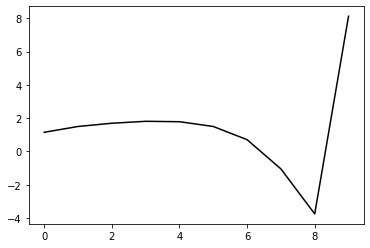

150700 0.17924595690240605
0.44643895881674406 -0.4384421087736727 -0.15322232813215794 -0.1226993087261343
[ 1.12828053  1.51772036  1.82602806  1.99134737  1.98526419  1.70926639
  0.92247326 -0.83310397 -3.5541585   8.02403163]


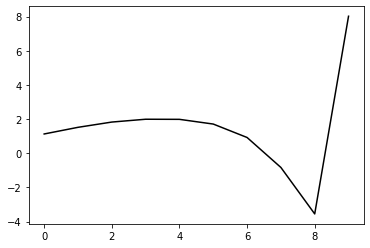

151800 0.20853284311338435
0.44454525415546575 -0.4428275750838387 -0.15713477075288987 -0.12134062022063816
[ 1.07694481  1.43795167  1.68901989  1.88203126  1.90709733  1.65136986
  0.88087342 -0.86174583 -3.58070638  8.1284647 ]


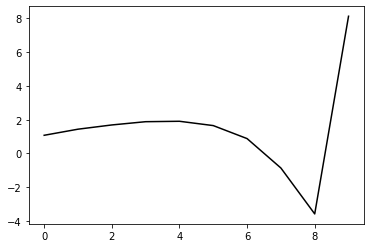

152900 0.2687231050988076
0.4577792244963376 -0.42691317294717346 -0.14964228703566232 -0.1200528389108232
[ 1.08193226  1.45612923  1.71785181  1.9109562   1.95893686  1.72385869
  0.9659894  -0.77248806 -3.51044466  8.13806985]


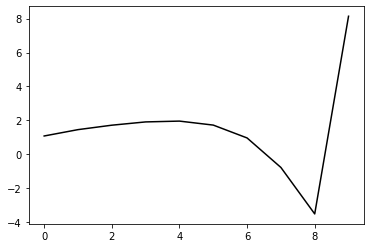

154000 0.2792934395432863
0.4324117478588675 -0.4378991627412536 -0.152558414506446 -0.12811220357069056
[ 1.16627319  1.43394918  1.63067416  1.79049623  1.81869698  1.57247063
  0.80564112 -0.94052126 -3.69364877  8.0728055 ]


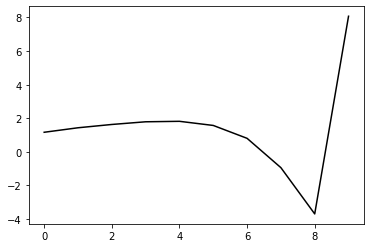

155100 0.2552359106035977
0.41581334814270865 -0.44670874672390415 -0.15727115924924276 -0.12471600876857616
[ 1.14780995  1.16380159  1.33955634  1.47036908  1.48122832  1.22875614
  0.45803186 -1.29274638 -4.06043872  8.08884458]


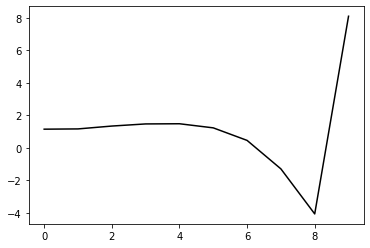

156200 0.2674404155160202
0.41259460777886797 -0.4568310845619893 -0.16633813849980156 -0.11858397038375387
[ 1.1242752   1.2672804   1.44136014  1.55723955  1.55510633  1.29456937
  0.51635748 -1.24321924 -4.02632261  8.04795026]


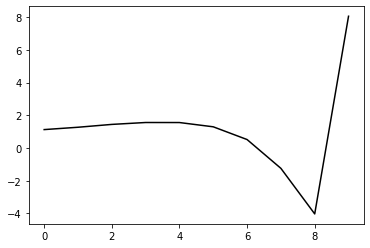

157300 0.25937397515681376
0.4306043889055845 -0.44033504876814494 -0.15746190574782265 -0.12441129565551488
[ 1.1413123   1.45207455  1.64378117  1.74651044  1.72388865  1.4474544
  0.65561855 -1.11873893 -3.92507685  8.07340735]


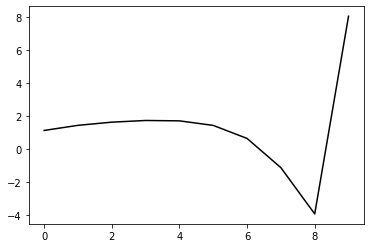

158400 0.21589570758538643
0.44413754690852936 -0.43341625466821776 -0.15630641835468512 -0.12200340647727224
[ 1.11676909  1.42443181  1.68315752  1.82949552  1.82361573  1.55882256
  0.77745603 -0.99253149 -3.81089331  8.03326789]


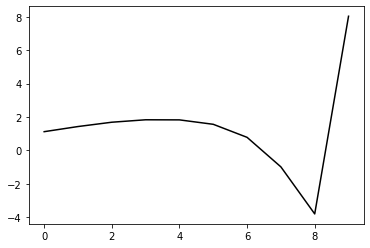

159500 0.22150058235439224
0.4449199928066396 -0.43071520006521924 -0.15471781859927725 -0.12429375733410294
[ 1.17780877  1.3278576   1.61547948  1.79566096  1.81110028  1.55672403
  0.78440149 -0.98101071 -3.81194889  8.16595512]


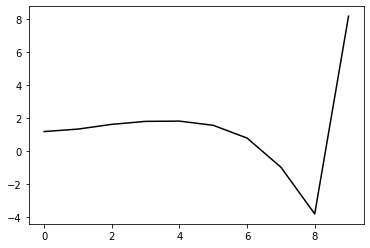

160600 0.16615035127228878
0.4248190026940497 -0.43665570292188344 -0.15630226972765615 -0.12571001908251098
[ 1.17331657  1.35414268  1.55895138  1.72230119  1.73496988  1.4736113
  0.6942856  -1.07866604 -3.92748332  8.03585386]


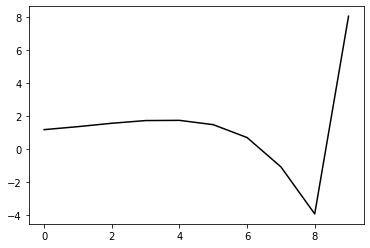

161700 0.1993629936965543
0.42651297126307053 -0.4389589635531778 -0.1598601298853307 -0.12456178549717614
[ 1.16806511  1.30456368  1.53966951  1.70413249  1.72702776  1.47766895
  0.70808494 -1.05832739 -3.91392288  8.07080487]


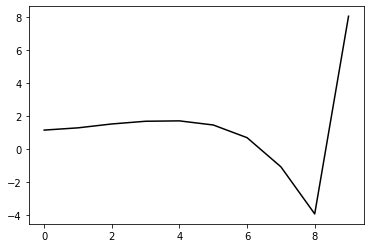

162800 0.20037339287425202
0.43308938401651365 -0.43117344486155 -0.15752197746981855 -0.12382640049434963
[ 1.06928462  1.50323118  1.71903798  1.87557744  1.90019639  1.6527035
  0.87955223 -0.89912704 -3.79188627  8.09711317]


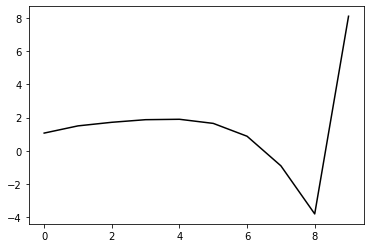

163900 0.289824104901927
0.431666252021357 -0.4330052154088192 -0.16095481482342322 -0.12058016691660099
[ 1.08196174  1.4941077   1.71558092  1.87373047  1.89888171  1.65591333
  0.88605606 -0.89452323 -3.80652162  8.12910491]


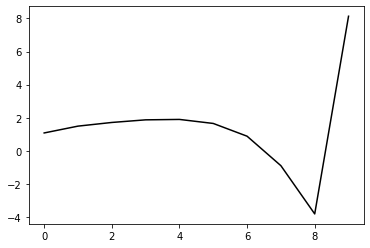

165000 0.24158465738286916
0.4268600604314204 -0.43228408933325657 -0.16117326520183245 -0.12376349901024097
[ 1.14317524  1.45370471  1.68341216  1.8404052   1.8690655   1.63238932
  0.86842693 -0.909258   -3.82801767  8.06737471]


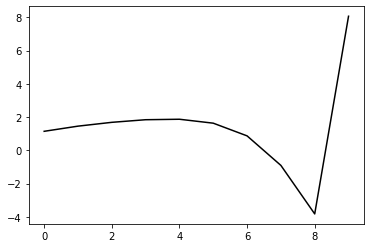

166100 0.21040657080084244
0.4215541297946021 -0.42599966803255807 -0.15738890152916718 -0.12403337567582022
[ 1.06958364  1.26406294  1.46868705  1.60170142  1.60148618  1.34559021
  0.56871772 -1.22236316 -4.16819603  8.13022902]


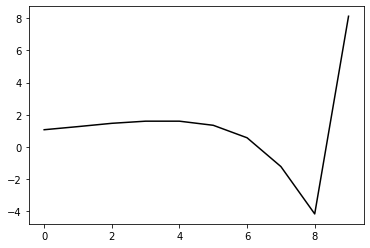

167200 0.23869339376319268
0.4334764785476573 -0.4211597448987952 -0.1579083626042759 -0.12648162359233853
[ 1.04474602  1.54325984  1.72503147  1.83412489  1.81624372  1.54336491
  0.75180878 -1.05333247 -4.01796903  8.03597476]


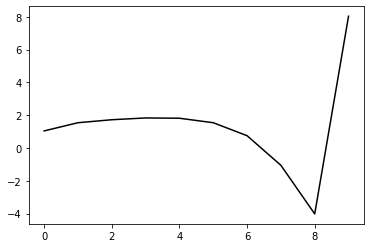

168300 0.27740373258045403
0.4159644103344378 -0.4359377209420647 -0.16735781167966962 -0.12220013382600713
[ 1.07734031  1.32073171  1.53510383  1.66993694  1.66095313  1.39581927
  0.61261218 -1.18699509 -4.15698761  8.08312183]


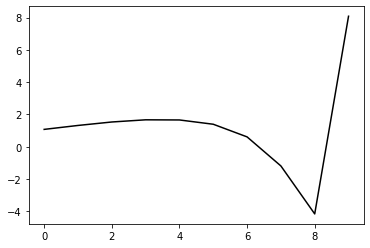

169400 0.25053550997815965
0.41610880005612993 -0.4300150479474254 -0.16394916156699468 -0.12468362248779262
[ 1.08660392  1.30071836  1.53631269  1.68268043  1.67984855  1.41604306
  0.63345291 -1.16909262 -4.15564723  7.99359772]


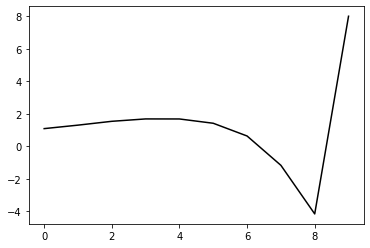

170500 0.20449868391157505
0.42980047838664387 -0.4199251441341999 -0.16052863279641447 -0.1288001350324571
[ 1.14366946  1.38089985  1.6547477   1.8428228   1.88063245  1.64887401
  0.8923321  -0.89157817 -3.87563606  8.14907255]


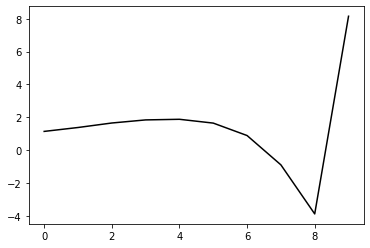

171600 0.1449284343550503
0.43358336673435477 -0.4104725032323665 -0.1573804287424212 -0.12264657062656599
[ 1.10714232  1.47226968  1.68032566  1.82865613  1.84216307  1.58664889
  0.8062167  -1.00524523 -4.04011637  8.09715465]


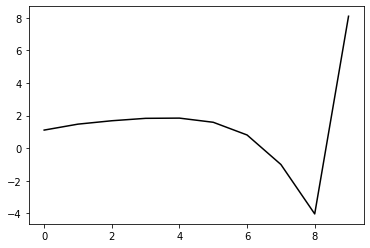

172700 0.2137334378604445
0.4216821934997643 -0.4199538417440413 -0.1623454332584005 -0.1222060208562929
[ 1.0817402   1.35738916  1.56583589  1.73746471  1.76647431  1.52756243
  0.76222858 -1.03655804 -4.07075759  8.01092249]


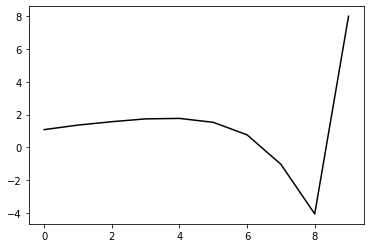

173800 0.2797369526317389
0.43678451061710877 -0.4075422584260287 -0.15855557356265484 -0.12246083209700515
[ 1.03433786  1.4934886   1.73065305  1.90712609  1.9546693   1.7331346
  0.97907138 -0.81820876 -3.87562697  8.0931714 ]


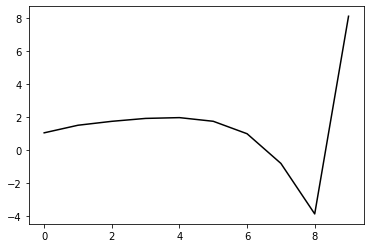

174900 0.37950991959409136
0.4262680903483736 -0.4186371840225055 -0.1646903007690201 -0.12187905000761555
[ 1.06489683  1.44396949  1.68178951  1.86515353  1.92356549  1.71695144
  0.97719222 -0.80884129 -3.86657748  8.07970229]


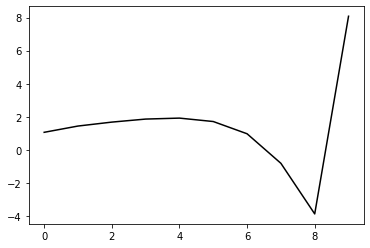

176000 0.25484424467220174
0.4232096244255611 -0.4122423551496503 -0.15889285865266586 -0.1279272838064824
[ 1.09955445  1.45669459  1.63897809  1.75811037  1.76484802  1.51672927
  0.74269946 -1.07286782 -4.16323943  8.0653189 ]


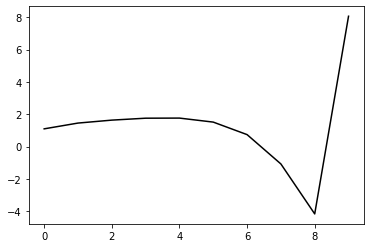

177100 0.20145748197589622
0.44841902337339296 -0.3962858526711143 -0.1539074284650573 -0.12499923119242154
[ 1.02509096  1.55444429  1.84556056  1.98749308  1.98537914  1.73085905
  0.95236031 -0.87157954 -3.98693781  8.09749724]


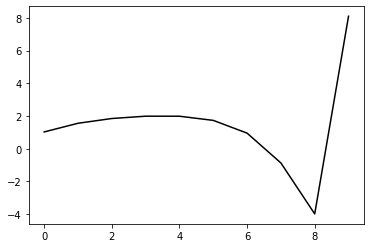

178200 0.26523786025584245
0.4345879565506171 -0.4032527674407081 -0.15796988549389687 -0.1215126652945867
[ 1.18747373  1.16130065  1.42440116  1.61737404  1.65889712  1.43940748
  0.69578335 -1.09858618 -4.20003502  8.02764781]


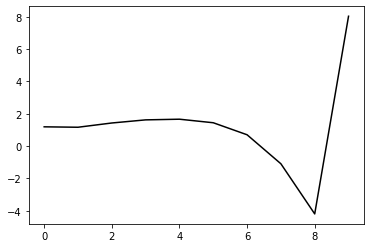

179300 0.21927226887356294
0.4314626392329868 -0.4085460026039502 -0.16039657916673572 -0.12986501847612994
[ 1.09959103  1.36999897  1.63352405  1.84385461  1.91885986  1.72579847
  1.00328864 -0.77467325 -3.87217543  8.07611762]


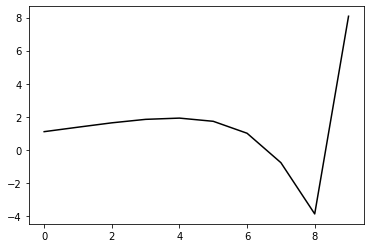

180400 0.49800633678441764
0.4056355763625908 -0.4358064344204638 -0.17824401681318877 -0.1166950581091934
[ 1.06758836  1.18529338  1.27992048  1.39565224  1.41942409  1.20081029
  0.46960443 -1.30639432 -4.40569972  8.03797042]


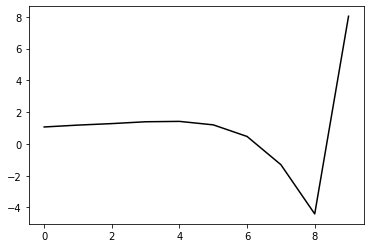

181500 0.42870453494743493
0.4111255788064343 -0.4013329902972881 -0.1538664314551796 -0.13913821685002095
[ 1.22925672  1.24087593  1.38578846  1.48798485  1.50855174  1.29499535
  0.56766207 -1.20958055 -4.32577648  7.95772317]


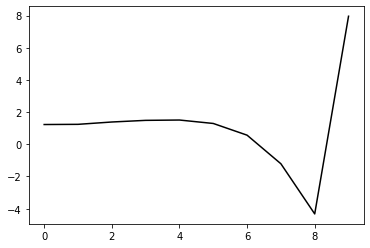

182600 0.1600484572223111
0.4283752596485484 -0.4045747386743423 -0.1607806142562848 -0.1355192661578764
[ 1.13120916  1.4875039   1.63097029  1.69493796  1.6785825   1.44065097
  0.69623454 -1.09460326 -4.2265257   8.06519211]


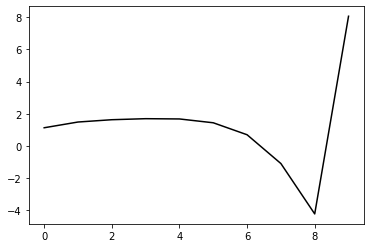

183700 0.18994167359312686
0.437201095096517 -0.4011764946095607 -0.16165261286444507 -0.13577476401085173
[ 1.07752303  1.49684639  1.74661487  1.87539241  1.87438786  1.64870344
  0.91743477 -0.86566832 -4.00686582  8.03550297]


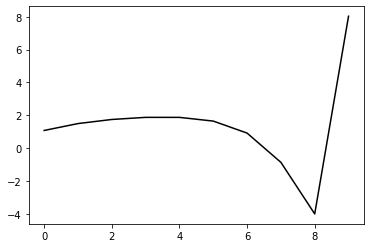

184800 0.21126454675842168
0.4342930467126862 -0.39456090121618737 -0.1612654488633645 -0.12824936905787349
[ 1.0604442   1.47965696  1.64168366  1.74588641  1.71832084  1.46276296
  0.70896152 -1.0951625  -4.26948913  7.94431659]


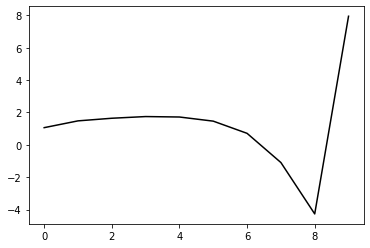

185900 0.2712648922556934
0.4441677615593498 -0.3924112139785956 -0.1631343874717054 -0.129134575305658
[ 1.05567224  1.48126536  1.72802139  1.86625565  1.86848491  1.63366024
  0.89908698 -0.88877542 -4.05966498  8.08211308]


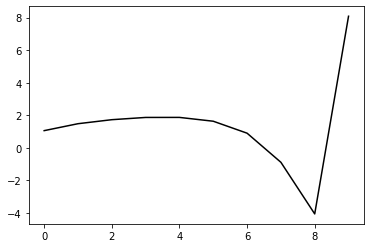

187000 0.24988231085161308
0.44176382630701794 -0.3881704187269215 -0.16035232789958617 -0.1325489643409429
[ 1.14407217  1.41230337  1.68994254  1.86815095  1.89908566  1.68354693
  0.96682803 -0.80467266 -3.97268932  8.06021248]


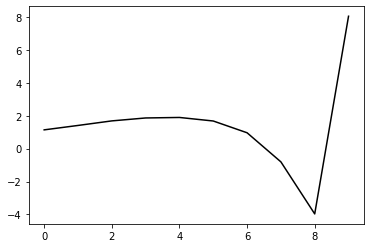

188100 0.2528517452743067
0.4098542458745829 -0.4012042108820734 -0.16240265512858368 -0.13801936023012248
[ 1.17817435  1.16719323  1.35652539  1.50948358  1.5262257   1.2949179
  0.56605934 -1.21214092 -4.39387232  7.92810946]


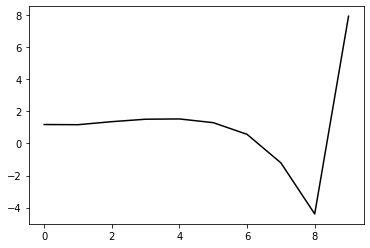

189200 0.1824604340554488
0.4303261358945872 -0.3970065038000505 -0.1660914345151539 -0.13373270655860656
[ 1.1034279   1.41806511  1.66064539  1.82901135  1.87436302  1.66802528
  0.95733589 -0.80807779 -3.99479073  8.06152455]


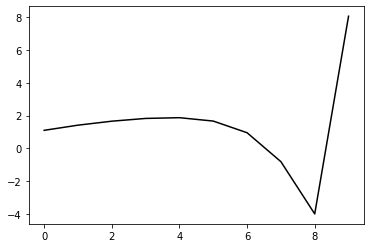

190300 0.540578658875784
0.42924536001785235 -0.386132444333136 -0.159891067881287 -0.13387261480313564
[ 1.26135747  1.19534853  1.45335624  1.6521043   1.72496789  1.54734458
  0.86130686 -0.8841828  -4.07321437  8.13160617]


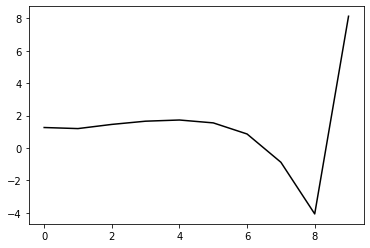

191400 0.25263987897298834
0.4399275776349417 -0.3901684524925773 -0.1665247491842868 -0.12973534375584936
[ 1.06544247  1.50196269  1.72471918  1.87158349  1.9071188   1.69825114
  0.98516438 -0.78326555 -4.00041197  8.05236399]


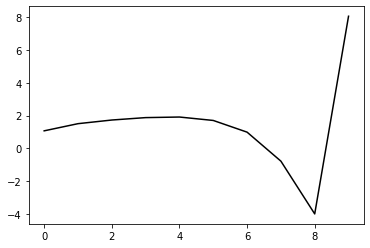

192500 0.19570003200194266
0.430155257679615 -0.3853066612096152 -0.16471034645654534 -0.126818008548433
[ 1.10559697  1.40279588  1.63512611  1.78099142  1.80174582  1.58068981
  0.85587084 -0.92662044 -4.17455912  8.05474229]


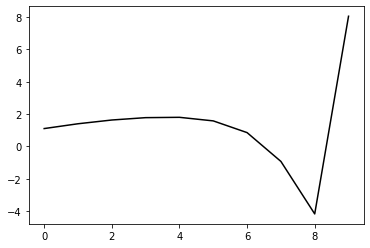

193600 0.15169088293771724
0.435150524244493 -0.37898254937701253 -0.1620315022476445 -0.12926953417755827
[ 1.1250761   1.29676699  1.5633784   1.7506225   1.79695153  1.59664943
  0.89097577 -0.87530932 -4.12102535  7.9910683 ]


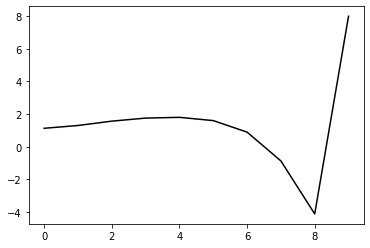

194700 0.21143545385830576
0.4296411596650912 -0.3855366032055533 -0.16691657122712564 -0.12623274794054767
[ 1.07980458  1.30837757  1.52354734  1.71941974  1.79429305  1.619318
  0.93690758 -0.80847576 -4.04983387  8.06232638]


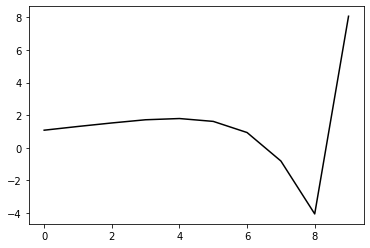

195800 0.23847008785293916
0.4031906006009761 -0.40629380419739125 -0.1768943932960954 -0.13327949081003762
[ 1.11727136  1.35620125  1.466452    1.59799563  1.64286201  1.45054922
  0.75803788 -0.98975089 -4.23268046  8.03489208]


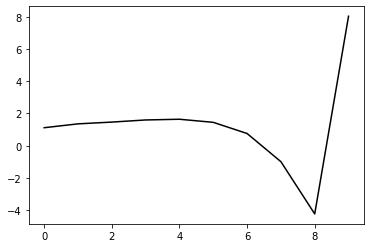

196900 0.3467997493362916
0.407822696870303 -0.4027441611952372 -0.17719774282757894 -0.13250899027564852
[ 1.09529121  1.49567388  1.56229033  1.60822437  1.59895258  1.37421912
  0.65877553 -1.10629508 -4.36825127  8.01471886]


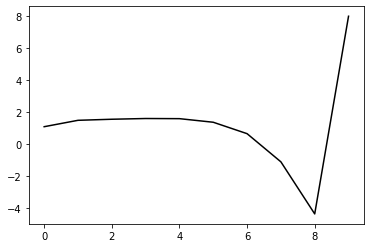

198000 0.22106573371903823
0.4339198225015114 -0.37642987469194067 -0.16430264357545454 -0.13781897461328477
[ 1.06107321  1.60060225  1.78614498  1.83201386  1.78264959  1.52923014
  0.79160189 -0.99509368 -4.2902545   8.02819048]


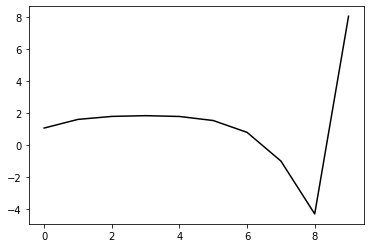

199100 0.23167520531878408
0.44387206386873296 -0.3753417526901034 -0.1670731763365919 -0.13515380393358953
[ 1.028637    1.54179184  1.83087976  1.99108073  1.98629287  1.75407329
  1.03702775 -0.73306871 -4.02714057  8.14796262]


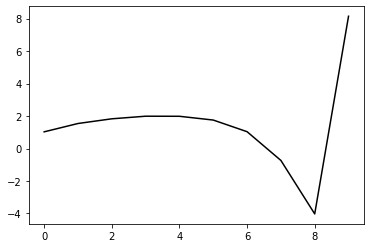

200200 0.256819158190066
0.4412179485972421 -0.3738379842818488 -0.16500118485683507 -0.13500315417547828
[ 1.15820111  1.37831302  1.62185108  1.75635102  1.73998579  1.48405454
  0.75191177 -1.02266126 -4.32118732  8.02140474]


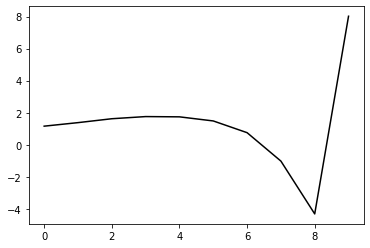

201300 0.22088635102519227
0.44141887848112055 -0.3750954258053284 -0.16678535103107073 -0.13644131351630256
[ 1.07873349  1.46092668  1.75388252  1.93455009  1.95083257  1.71198173
  0.98945207 -0.77599426 -4.07676254  8.05625319]


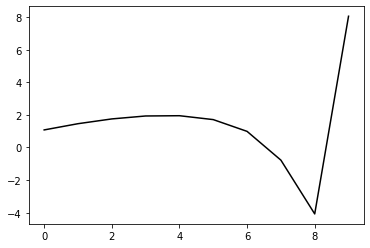

202400 0.48382702307291947
0.4317272115718878 -0.37195884334746204 -0.16403675479944746 -0.13650689201171806
[ 1.25476729  1.24646184  1.50150971  1.70463425  1.76031139  1.5525102
  0.8523836  -0.89255487 -4.190134    8.01991205]


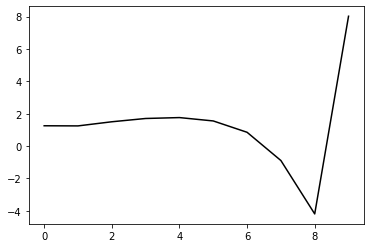

203500 0.20099670471844844
0.4243210753949513 -0.37762687849437276 -0.1682779780544287 -0.13236061564217907
[ 1.12652668  1.39290964  1.55171622  1.7069813   1.74206894  1.51693472
  0.795122   -0.96942787 -4.29247578  8.0458045 ]


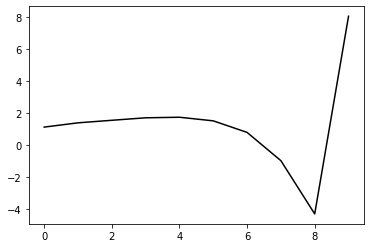

204600 0.27313867539784564
0.3966788937855081 -0.373283833055811 -0.1627758430998001 -0.13072702670731814
[ 1.22657214  1.15419209  1.25729177  1.36519604  1.37113229  1.13017515
  0.39448282 -1.3822989  -4.72559484  8.0160743 ]


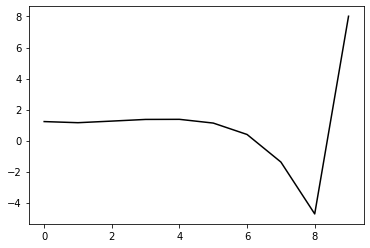

205700 0.20627430586022086
0.4340550505621284 -0.36470190541749425 -0.1648933141135105 -0.13620805393301824
[ 1.15782015  1.48985008  1.70843651  1.83044873  1.84373333  1.6119744
  0.88033457 -0.89659773 -4.24914499  8.05524316]


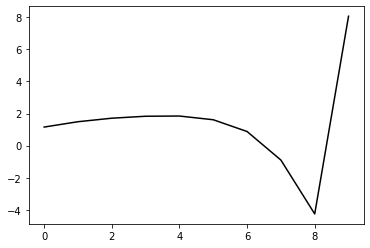

206800 0.31756577865506036
0.3987962202907435 -0.36991257517087606 -0.16487839621602676 -0.13195312944287618
[ 1.15978285  1.29777933  1.40136326  1.46996369  1.43147365  1.16109891
  0.39973088 -1.40043182 -4.77553772  7.96390344]


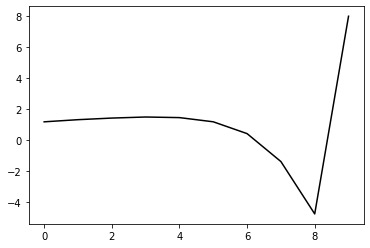

207900 0.26637413703257223
0.437527925347338 -0.36290867723771 -0.16888425319815026 -0.13414853804066548
[ 1.07043062  1.51143768  1.76258564  1.87049001  1.84910994  1.59220024
  0.84134237 -0.9522961  -4.3299492   8.11939553]


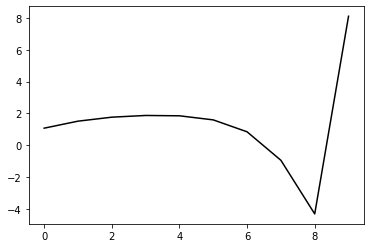

209000 0.28905487897420346
0.43491518942763496 -0.3584395267029911 -0.1662217108265938 -0.13669622476443627
[ 1.17231946  1.40358388  1.69315098  1.87514273  1.89872692  1.6731249
  0.94916198 -0.82316009 -4.19286812  8.03672572]


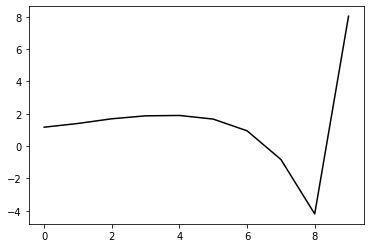

210100 0.27074235373580463
0.4389054228744135 -0.3570788553160829 -0.1683937489568319 -0.12906533340240095
[ 1.00434235  1.42882923  1.67426624  1.85291503  1.88576212  1.66001049
  0.93214387 -0.84762327 -4.24123254  8.04349654]


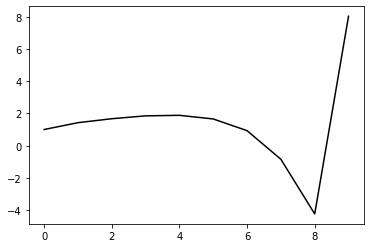

211200 0.27136989651339605
0.41703395691944734 -0.36037162427927866 -0.16574403271212654 -0.13635278196006909
[ 1.148248    1.33596926  1.51280093  1.64439449  1.64570327  1.39003342
  0.63391601 -1.17020943 -4.5898784   7.96470673]


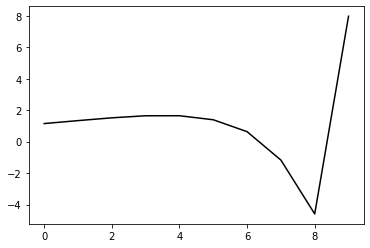

212300 0.22998134735765421
0.42752616073965327 -0.3589088043175644 -0.16883751794624421 -0.1335343257008815
[ 1.10603358  1.38688693  1.63345149  1.79238381  1.81512487  1.57989881
  0.83824312 -0.95608597 -4.37674457  8.000462  ]


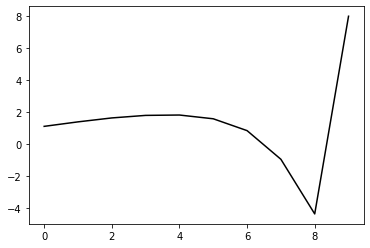

213400 0.23413769558737038
0.4333174960252525 -0.35748222502916294 -0.17118281639619995 -0.12897941602656532
[ 1.07126901  1.3662163   1.62651215  1.82090666  1.87278881  1.66374684
  0.94311411 -0.83541919 -4.25234983  8.14184336]


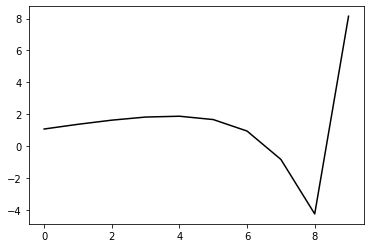

214500 0.26971094451370903
0.4128453019184774 -0.35305803923801804 -0.16692108448573179 -0.12294226770432617
[ 1.09261176  1.16118931  1.31787643  1.46883312  1.50100277  1.27722559
  0.54122083 -1.25659803 -4.7119847   8.00627638]


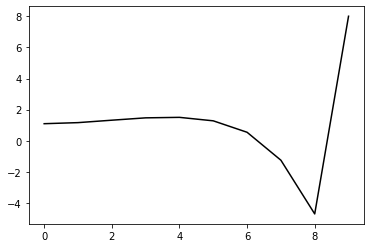

215600 0.1638623062856334
0.42396147050098 -0.35502170000423244 -0.17112538982064399 -0.1287732609466183
[ 1.09655693  1.44279692  1.60705196  1.74762144  1.78785349  1.57607773
  0.84920926 -0.94110248 -4.38816623  8.00363086]


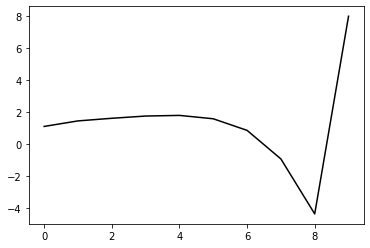

216700 0.3160239345916218
0.4101875525607086 -0.37368380041711285 -0.18340878866296786 -0.12293021580060909
[ 1.08499114  1.22641263  1.4057799   1.53087426  1.5549732   1.34040238
  0.6150606  -1.17264498 -4.6191112   8.03043594]


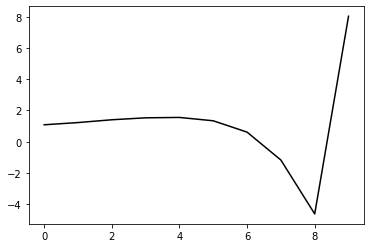

217800 0.19563383053857505
0.42520455594652323 -0.35839157994158355 -0.17390373920829866 -0.13442162978628072
[ 1.09638983  1.44801455  1.65659359  1.78393232  1.80133593  1.58327988
  0.85629344 -0.93395578 -4.3860009   8.09225375]


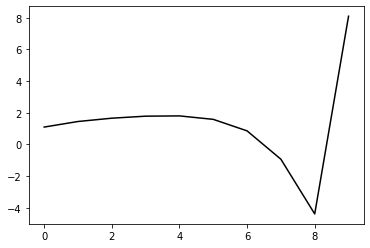

218900 0.2972280246305074
0.4263123359018076 -0.35804927115929136 -0.17377571577328607 -0.13799790460993694
[ 1.1406817   1.5223551   1.71851326  1.82731342  1.82222453  1.58502152
  0.84440026 -0.95665952 -4.41925094  7.9922926 ]


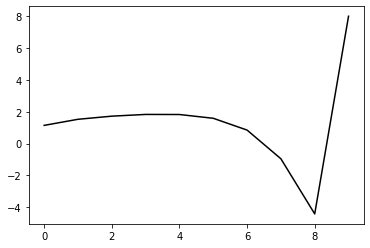

220000 0.273924990358484
0.4345125559822959 -0.3488694237053904 -0.17020322512274294 -0.13831943982828113
[ 1.17633502  1.40760912  1.6984338   1.86732686  1.89079338  1.67457704
  0.95342226 -0.83319623 -4.29273918  8.03059698]


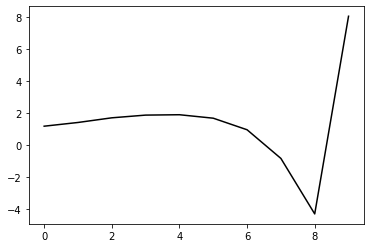

221100 0.1958307200223361
0.4352027902465178 -0.3497040576243455 -0.17264025375027625 -0.1343341617538853
[ 1.04660305  1.46633882  1.7078175   1.88327888  1.91892646  1.70569516
  0.98736107 -0.79890967 -4.26954526  7.97464697]


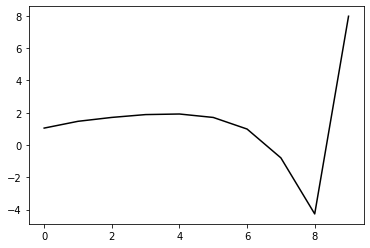

222200 0.31020981630747063
0.4151890371979847 -0.3556164325934858 -0.17402989677870273 -0.13464995961684628
[ 1.24914047  1.18539752  1.39718496  1.57861671  1.63076848  1.43156509
  0.72544927 -1.05090522 -4.5227036   8.0479775 ]


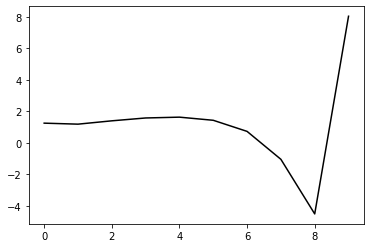

223300 0.22266451147247643
0.42693172955363445 -0.35096351582527674 -0.17412005960415822 -0.13319778118546194
[ 1.07247316  1.41320116  1.62123174  1.7768225   1.82216939  1.61954603
  0.90733595 -0.87790575 -4.37036663  8.04119362]


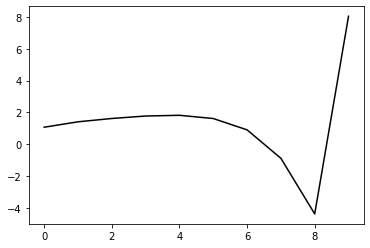

224400 0.2774607635278538
0.41677046932567047 -0.35234299940345093 -0.1767321041811575 -0.1254827327604475
[ 1.15946386  1.24379775  1.41674303  1.53463285  1.55235834  1.33721742
  0.61855915 -1.17363352 -4.68590304  7.97369883]


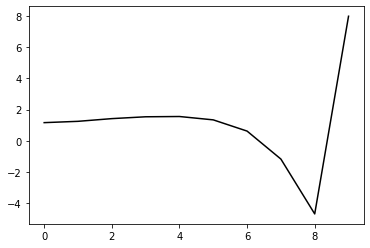

225500 0.20241496168082926
0.419649381003517 -0.34908314838104454 -0.17418766351687331 -0.13793789572800544
[ 1.13819017  1.50607028  1.72480508  1.85982296  1.87724538  1.66144368
  0.94273868 -0.85031383 -4.36716121  7.98722071]


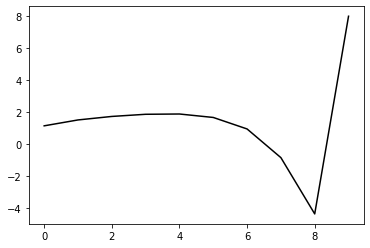

226600 0.2540388756832739
0.4191243717439021 -0.3459398176901474 -0.17153491924314274 -0.1414709039148478
[ 1.20160516  1.3926841   1.63954817  1.80429135  1.83223084  1.62356675
  0.91457345 -0.869385   -4.38483005  7.92448345]


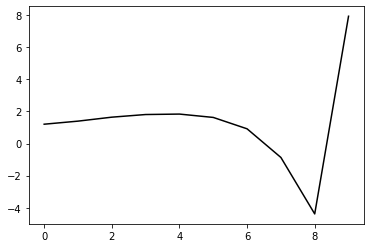

227700 0.295499229193901
0.43234296091844787 -0.33551670591226024 -0.16843500531843777 -0.13920170729047054
[ 1.18192283  1.46935827  1.73642925  1.91835521  1.96243219  1.76180681
  1.0594482  -0.72114383 -4.24893986  8.00999521]


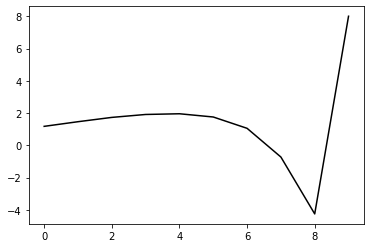

228800 0.19652835327527904
0.43543259224139824 -0.3389703937225431 -0.17345684110966597 -0.13554123048637512
[ 1.06420585  1.48074251  1.73112227  1.9126642   1.95601755  1.75265639
  1.04951108 -0.73093639 -4.26818267  8.09368408]


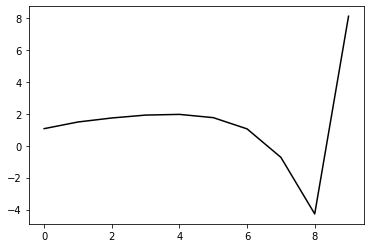

229900 0.2754533421938641
0.4236956861175578 -0.3479214819555996 -0.1790157508643216 -0.13263119405738996
[ 1.09083769  1.36752998  1.58896571  1.78192397  1.84832586  1.66366884
  0.97523163 -0.79271824 -4.32596983  8.05388683]


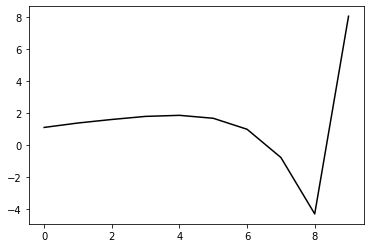

231000 0.5005026803743015
0.42122275813769494 -0.337564697053454 -0.17172207738580106 -0.13891609304898775
[ 1.26345021  1.31082914  1.5429164   1.72770272  1.80405553  1.63473074
  0.95951932 -0.79708061 -4.32814089  8.03170264]


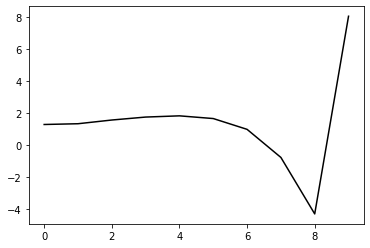

232100 0.21036600761785865
0.40543041376916666 -0.35536738394732315 -0.18406086492316664 -0.1342142745627892
[ 1.15533305  1.4907457   1.62909117  1.74152594  1.76459813  1.55333664
  0.84283194 -0.94340102 -4.50374682  7.99594618]


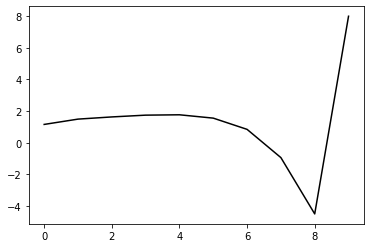

233200 0.26139794025409946
0.42985571384837795 -0.3317952894972673 -0.173224493808116 -0.13545994733410405
[ 1.18733593  1.41383126  1.66784089  1.7978836   1.81247306  1.59735213
  0.88319128 -0.90995944 -4.48958162  7.98087916]


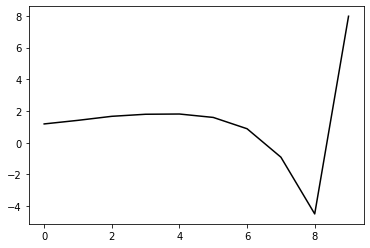

234300 0.5199002264267472
0.419044182079309 -0.33444505649517736 -0.17374582433278674 -0.13939302048892876
[ 1.30006642  1.20055381  1.48009555  1.67323108  1.7234009   1.53520047
  0.84682325 -0.92387401 -4.4901021   8.09217931]


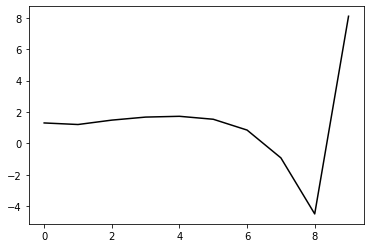

235400 0.28054885601404755
0.4351916274568586 -0.33155262727347373 -0.17625176073821242 -0.13382674495209598
[ 1.06923531  1.56877229  1.83498842  1.99556222  2.01699735  1.79475784
  1.07459138 -0.72553075 -4.32696133  7.95377892]


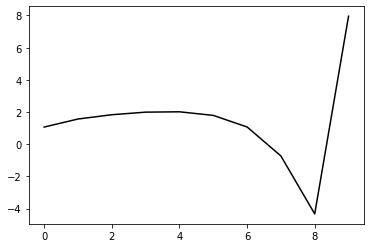

236500 0.28625052719877325
0.4114667157616981 -0.33446681595703637 -0.17370535162284223 -0.1385107227389934
[ 1.20788522  1.25937158  1.49130035  1.67011615  1.70665912  1.49547935
  0.78657627 -1.00116161 -4.59595001  7.9914185 ]


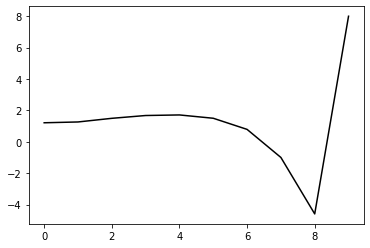

237600 0.1492803304637395
0.42805264132717696 -0.3276189311063621 -0.17349924496266156 -0.13374766017623452
[ 1.13574919  1.40802056  1.65634046  1.82869108  1.87023698  1.66061176
  0.94916301 -0.8430221  -4.45310219  7.98906864]


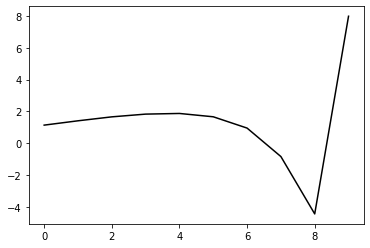

238700 0.19206247385351627
0.4264384524946118 -0.33008280369193865 -0.17547333639035675 -0.13345350125187924
[ 1.13885546  1.33186472  1.57550172  1.77340865  1.84174185  1.65989456
  0.97405349 -0.7933667  -4.38497291  8.07583185]


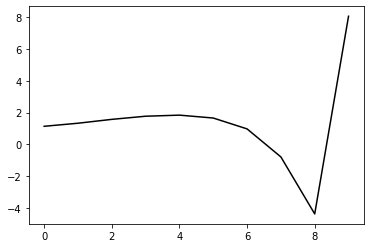

239800 0.261476639023366
0.4307663816147654 -0.3289165468232591 -0.1768814567903757 -0.13146263129257663
[ 1.06436854  1.41514268  1.67459723  1.88255137  1.97214802  1.81373692
  1.14758125 -0.60443693 -4.19378544  8.04386135]


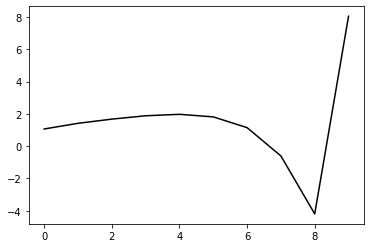

240900 0.2576956817349992
0.4197570671365395 -0.3348579947773246 -0.17968396685432866 -0.13024566044199185
[ 1.1063655   1.33513178  1.54325349  1.73387902  1.82565886  1.67785484
  1.02249144 -0.72079971 -4.31159773  8.02054165]


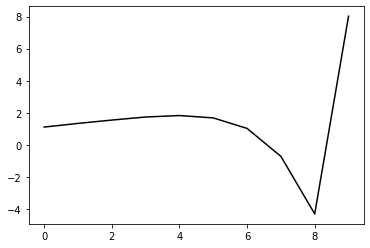

242000 0.22673880978342242
0.41525229439302297 -0.32858740703781125 -0.175040611242513 -0.13413761359730655
[ 1.1519835   1.54833943  1.68956551  1.82485493  1.88785199  1.72636036
  1.0617741  -0.69148265 -4.29885102  8.01891769]


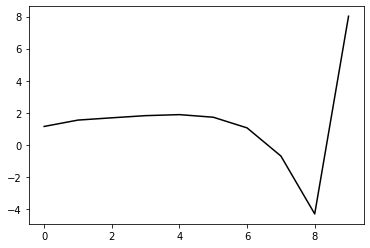

243100 0.16247976026521121
0.42230083359773646 -0.32745391965954973 -0.17588330365267138 -0.13515916631272312
[ 1.14327113  1.47736243  1.72276849  1.88394158  1.95128835  1.80335027
  1.15575371 -0.58273397 -4.18207507  8.04943491]


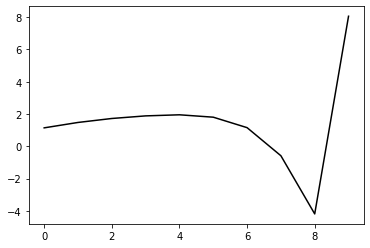

244200 0.2455279034427188
0.39205445161032915 -0.3398588693496763 -0.17993304386929815 -0.13323686100032867
[ 1.16617996  1.27074573  1.43260252  1.55751406  1.58196299  1.39773076
  0.72633099 -1.02945103 -4.64629651  8.00954674]


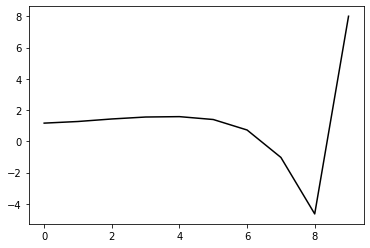

245300 0.23661069468156293
0.41365152531353366 -0.3262484935149692 -0.17532845576556763 -0.13311919025504604
[ 1.13270304  1.42571917  1.65103322  1.78184204  1.80131609  1.60883307
  0.93236318 -0.82871397 -4.45862273  7.95423685]


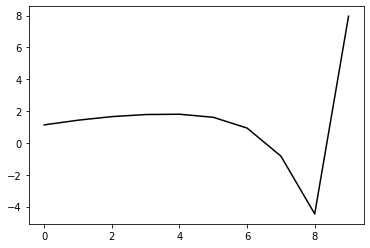

246400 0.24134847805003562
0.4100112757575948 -0.32533948781224414 -0.17496279620272445 -0.1327367212068947
[ 1.13485213  1.36135957  1.58124271  1.73740212  1.76591384  1.57615551
  0.90581162 -0.84814834 -4.47828713  8.07728471]


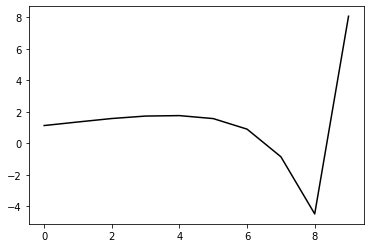

247500 0.211261035976324
0.41378413454850993 -0.3284346847114776 -0.17891028292660927 -0.1328277288384991
[ 1.18560201  1.24831656  1.49492089  1.69973616  1.78356081  1.63901173
  1.01052995 -0.70374111 -4.30153915  8.00845881]


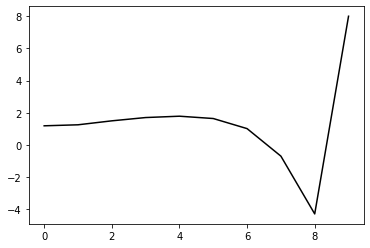

248600 0.19575146389308284
0.40253847218347216 -0.3329163253214721 -0.18004287443680325 -0.12974848705163783
[ 1.18580243  1.24428421  1.3837992   1.52702599  1.57918478  1.41121208
  0.76543448 -0.95856634 -4.56805332  7.99997261]


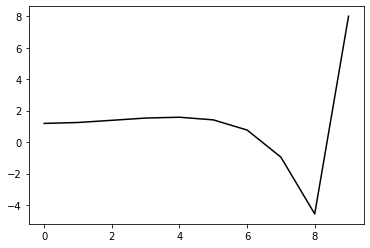

249700 0.20498181242197155
0.41345547362201646 -0.3315380793813479 -0.18167564291484778 -0.13200202529114846
[ 1.10295884  1.32020681  1.50750154  1.6644951   1.73295114  1.58716833
  0.96201652 -0.74268654 -4.3405585   7.99089288]


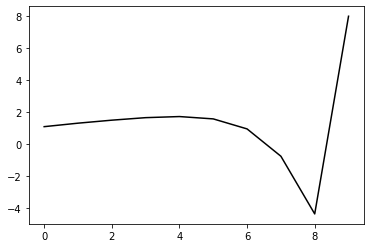

250800 0.20224204185084066
0.408103996726395 -0.335703926038084 -0.18487106399441094 -0.1327372567727477
[ 1.12568471  1.48929562  1.64620323  1.77344952  1.82659431  1.67379307
  1.04615639 -0.65822806 -4.25825104  8.02835043]


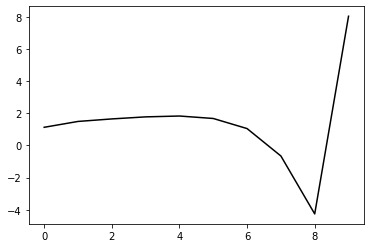

251900 0.3298883492765595
0.42230842744544894 -0.3245817928830395 -0.18055707166571183 -0.12928569125792003
[ 1.07288004  1.4950286   1.72361014  1.83432841  1.84404087  1.65794468
  1.00735251 -0.71347446 -4.33173578  8.02518539]


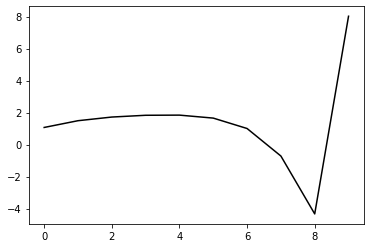

253000 0.2830774854375062
0.4001640660222434 -0.3340233276894169 -0.18465411388160313 -0.12738068886596277
[ 1.10220196  1.46180821  1.59535151  1.66732622  1.63454892  1.40840136
  0.72923344 -1.01077217 -4.64473204  8.01431047]


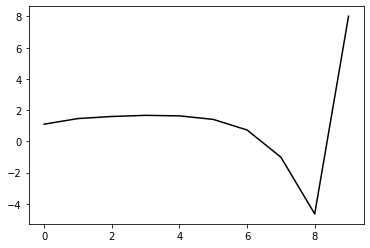

254100 0.21775779970597858
0.42571228455450083 -0.31989817717089614 -0.17899526774646618 -0.13234976247770697
[ 1.05047828  1.64640904  1.86059123  1.92992952  1.86999202  1.61142096
  0.90503053 -0.85737449 -4.51744952  8.06003202]


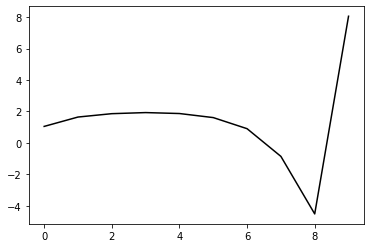

255200 0.2903835897193252
0.41679274176270575 -0.319588132584011 -0.17774292485813165 -0.13484381752767818
[ 1.22677909  1.24265949  1.5246191   1.6601327   1.63096036  1.38726799
  0.69657486 -1.04685773 -4.6908359   7.94108417]


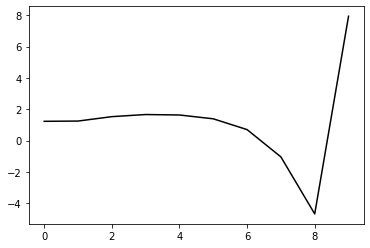

256300 0.3302905778213341
0.4135074353395923 -0.3215682701760485 -0.17891282153332314 -0.13844096426735752
[ 1.2190114   1.32541973  1.5736524   1.734096    1.73281037  1.49515723
  0.80477455 -0.93560727 -4.58062582  8.04135095]


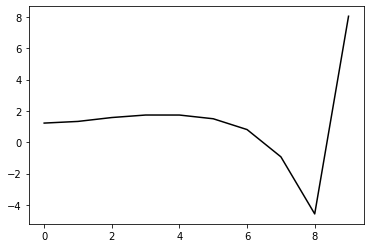

257400 0.2583385140694484
0.40513657128225844 -0.3231722538858479 -0.18028879571185114 -0.13511644058182407
[ 1.09974629  1.22665293  1.42804933  1.5664784   1.55722962  1.30700059
  0.6017398  -1.14687607 -4.80398168  7.9229189 ]


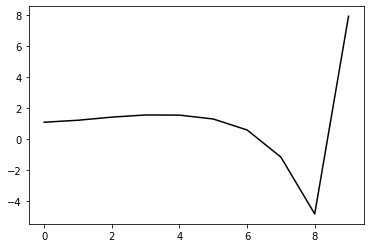

258500 0.20206249597868034
0.42339165517164024 -0.3149914289192139 -0.177604584483895 -0.13837077672216094
[ 1.09346891  1.58043403  1.81344483  1.95143014  1.94902931  1.69730027
  0.98170462 -0.77639862 -4.44549384  7.91454551]


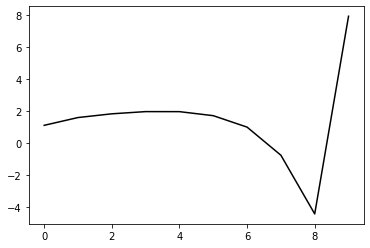

259600 0.1718906236285806
0.40632287377144033 -0.3293826088665789 -0.18582548960794412 -0.13582609091423087
[ 1.13256312  1.32958192  1.58815312  1.77105322  1.79955689  1.57347677
  0.87504159 -0.8656702  -4.5180025   7.99883987]


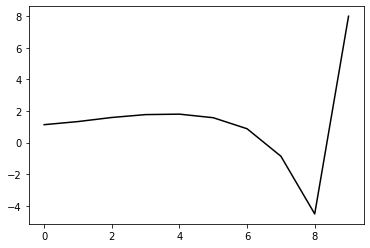

260700 0.19227741011568253
0.40775262977934607 -0.32359823226770007 -0.18153359533840588 -0.13786696242705662
[ 1.145889    1.39295401  1.63138301  1.79959373  1.82063861  1.58128184
  0.86152535 -0.89949253 -4.57243481  7.98922772]


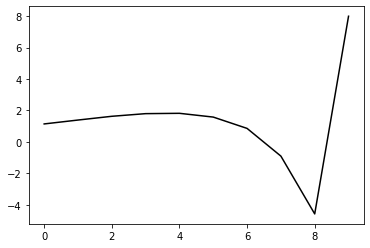

261800 0.19108105997742866
0.4217147541039398 -0.3154642802003497 -0.1779333549877824 -0.1391330223471007
[ 1.0841464   1.62875459  1.83720876  1.96656734  1.95689833  1.68709896
  0.93417663 -0.85697648 -4.5581143   8.05030114]


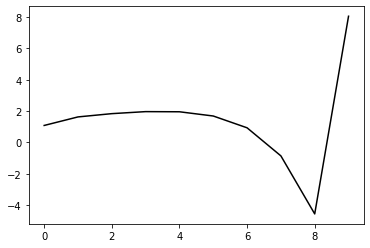

262900 0.32619465666360775
0.4284986271906015 -0.31463450036947244 -0.18082702353472954 -0.13508895550466762
[ 1.04834073  1.59654372  1.85523308  1.98866105  1.97430099  1.69995492
  0.93869565 -0.86185912 -4.57540192  7.97659457]


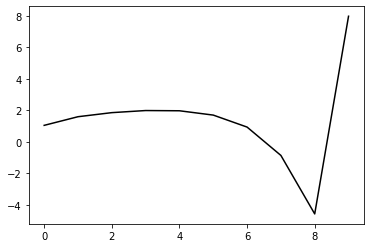

264000 0.23635228548937978
0.41784795276632064 -0.3156418027259226 -0.1789314293075769 -0.1417183987680779
[ 1.14069232  1.53745894  1.79472943  1.94746057  1.94465072  1.67764758
  0.91850176 -0.88206054 -4.59678508  7.90933185]


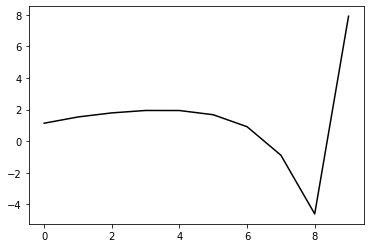

265100 0.17258676800881337
0.43094244247629376 -0.30844416873833624 -0.17865264063332603 -0.13705961176497186
[ 1.09969043  1.49701263  1.83228292  2.0422541   2.08004866  1.84286429
  1.10254445 -0.68729437 -4.40209036  8.03095708]


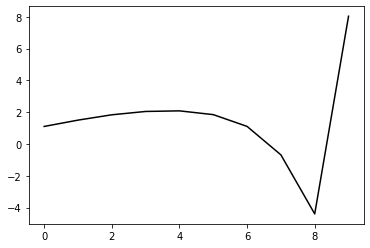

266200 0.24533595152037704
0.40849102613062077 -0.3229631575677523 -0.18507811257037463 -0.13609010482384443
[ 1.19011293  1.26615539  1.46996697  1.64824876  1.68197321  1.44164028
  0.69641679 -1.09659906 -4.8085543   8.08213017]


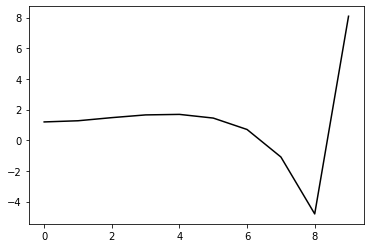

267300 0.6165739895504492
0.41780597165894984 -0.306200648297221 -0.17542425744908619 -0.1419274093761931
[ 1.28362284  1.28491207  1.55975718  1.75193037  1.8074551   1.58986614
  0.85703663 -0.93288066 -4.65203633  8.03420253]


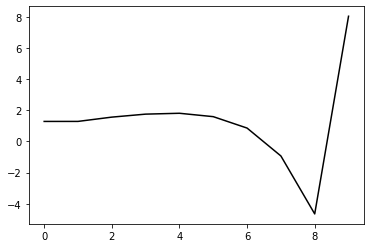

268400 0.24437179192135353
0.40696472662166155 -0.31667655993608346 -0.1832570024089266 -0.13136025787274097
[ 1.09450217  1.44334471  1.64385266  1.79322784  1.80879069  1.55651547
  0.78942674 -1.03475865 -4.78971355  8.02125613]


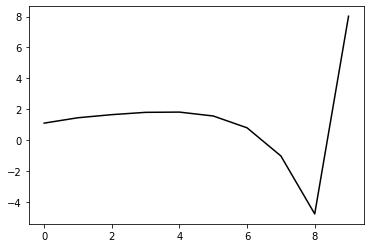

269500 0.2458377361740264
0.39354710476168064 -0.32249502116330686 -0.1839555903662478 -0.13859497864005996
[ 1.19618546  1.45021563  1.63469056  1.77792328  1.79201759  1.54145426
  0.77466161 -1.04975447 -4.79875508  7.95093988]


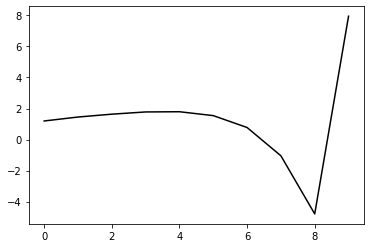

270600 0.17244308955476073
0.40748775367678447 -0.31894429314877065 -0.18556466582506248 -0.13445143833708514
[ 1.13523905  1.463534    1.70136909  1.84867203  1.86295213  1.61477624
  0.84814211 -0.980655   -4.73928628  7.96692298]


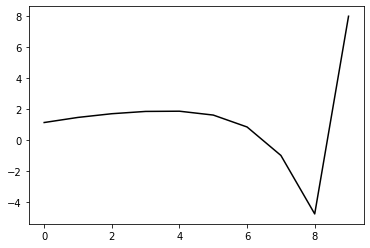

271700 0.19258293225019263
0.40715667809203343 -0.31658308867779605 -0.18266784920400675 -0.139538459878531
[ 1.1401617   1.55428357  1.76881187  1.9069112   1.90790958  1.64799104
  0.87041526 -0.9699052  -4.73775954  7.97420276]


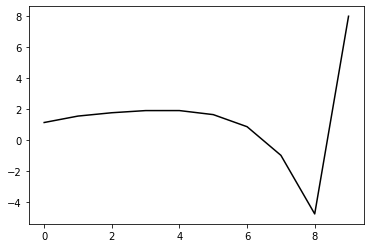

272800 0.20243321471901884
0.41175449367891753 -0.3174533287192556 -0.18601200587681768 -0.13444490845883963
[ 1.13102017  1.43361612  1.72496943  1.90072452  1.91879285  1.67145703
  0.90339442 -0.93303413 -4.70203924  7.97179837]


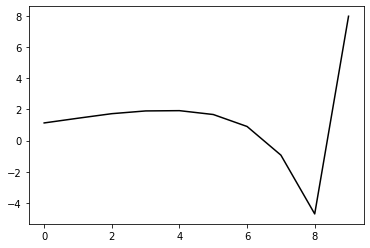

273900 0.3390631485120314
0.40206090773626185 -0.3132446302561004 -0.1817576163187009 -0.13771983513636674
[ 1.22715075  1.43074947  1.62371891  1.78359484  1.80267395  1.55214325
  0.779098   -1.06679485 -4.85086032  7.89164132]


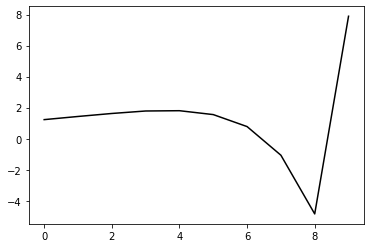

275000 0.7316143885702787
0.41177660900840807 -0.30088921879999164 -0.17402666147462043 -0.14419746682547357
[ 1.32034556  1.31226296  1.62356705  1.81330637  1.85619553  1.62977739
  0.87654353 -0.95553415 -4.72998439  8.03460066]


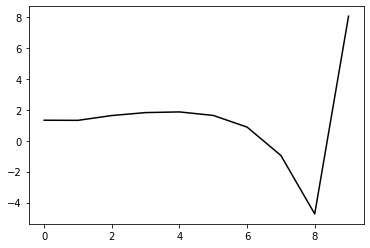

276100 0.2566652825469935
0.40094617855433223 -0.314601138563335 -0.18251613114620316 -0.14534190597478513
[ 1.19196397  1.41928458  1.68030601  1.86196559  1.89414475  1.65477005
  0.88783464 -0.95964815 -4.75038561  7.97097736]


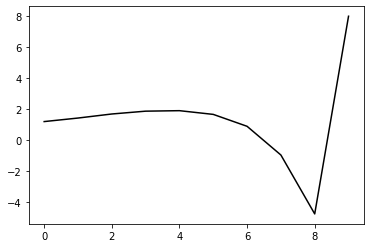

277200 0.2454789743921156
0.399368654146068 -0.31696244912449484 -0.18655429098497342 -0.1372104046001793
[ 1.19265572  1.32136692  1.55511686  1.7220884   1.74907702  1.50688782
  0.73639495 -1.11924617 -4.9250583   7.99126953]


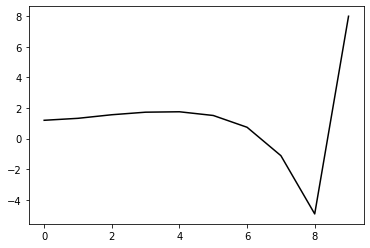

278300 0.22125950102308667
0.4126842149293186 -0.30673112611061215 -0.18308719161739923 -0.13775988130291245
[ 1.08042462  1.45991786  1.75170577  1.94634026  1.99216669  1.76580606
  1.00520118 -0.84940644 -4.66431234  7.97704015]


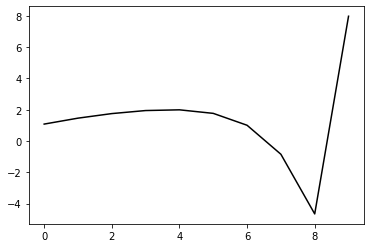

279400 0.29300817637265125
0.4079199024468529 -0.31141466632582027 -0.18750122653685827 -0.13454663636601133
[ 1.09218133  1.44062518  1.69205451  1.92964706  2.03491482  1.86388359
  1.14934586 -0.67341525 -4.47114275  8.00929782]


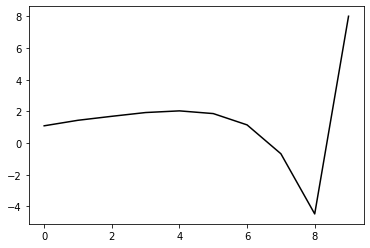

280500 0.25789820424679066
0.3919931398075063 -0.3188780638492451 -0.1896392247528556 -0.1347908959314944
[ 1.23090543  1.21534304  1.39462927  1.5807573   1.67403431  1.51130052
  0.80852134 -1.00560496 -4.79407554  7.99392725]


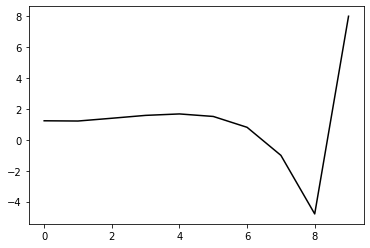

281600 0.1841633236410964
0.40664749176263604 -0.3143021231266167 -0.18919400413638754 -0.13222463708110022
[ 1.12161605  1.47183339  1.6324284   1.77165812  1.83267902  1.65692301
  0.94738339 -0.87419342 -4.66716951  7.97366735]


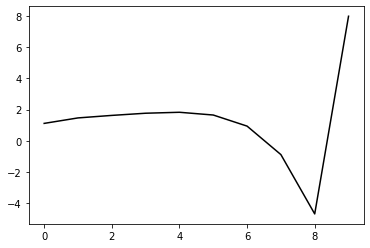

282700 0.18742854603129727
0.40615335905773414 -0.31276072042050235 -0.1876087375843631 -0.13725595434836232
[ 1.16349888  1.3735541   1.60448478  1.77342252  1.84588435  1.69072419
  1.00558289 -0.79796392 -4.57921033  8.06897269]


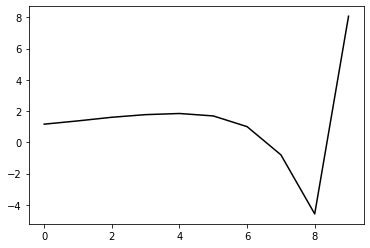

283800 0.4964531670518684
0.42677411297513107 -0.29856291522871153 -0.18250832876681924 -0.13111149902597674
[ 0.98678781  1.58527922  1.81806367  1.95499668  1.97836488  1.77936295
  1.06522298 -0.76807383 -4.59125709  8.01625225]


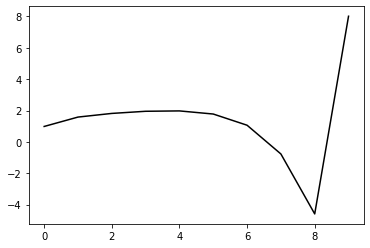

284900 0.28760758291123156
0.4208489596482767 -0.3015234023983069 -0.18414106903331273 -0.13465771779344377
[ 1.0797427   1.48074829  1.76115928  1.94267831  1.99356439  1.81300254
  1.12038334 -0.69569047 -4.51193761  7.9971993 ]


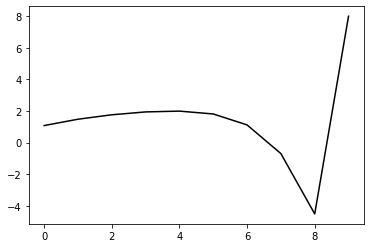

286000 0.31024654335715807
0.39625712431340654 -0.3007875055853447 -0.17949480623454064 -0.14138031772133497
[ 1.17723573  1.2461686   1.41186657  1.57234504  1.62905444  1.45710992
  0.78034038 -1.02078955 -4.83346636  8.0013062 ]


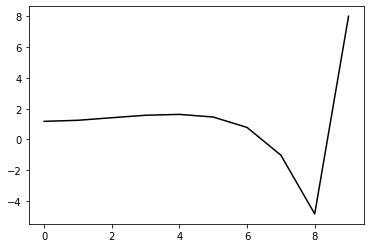

287100 0.2446997059868875
0.41809952607563916 -0.299351115142432 -0.18548776755034682 -0.13317514581088472
[ 1.05440782  1.46577596  1.73174423  1.90064114  1.95723205  1.78386774
  1.1037387  -0.70385595 -4.53292772  8.00791373]


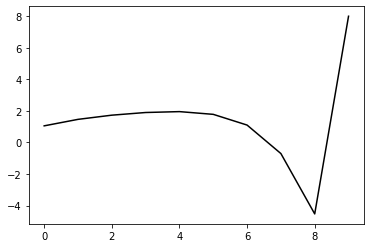

288200 0.21649423604280327
0.39099744299791656 -0.30565445168496 -0.1873923127096758 -0.1265957225449631
[ 1.13371282  1.31392286  1.50002356  1.65659339  1.70152185  1.51779652
  0.83093235 -0.9835601  -4.82960282  7.99176229]


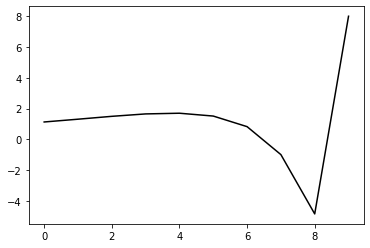

289300 0.22529412782198427
0.4074015936380913 -0.2938251812347738 -0.18224536251936932 -0.13325416659862266
[ 1.13600088  1.4162287   1.659403    1.82727145  1.88437429  1.71200355
  1.03581853 -0.77013039 -4.61558151  7.97019818]


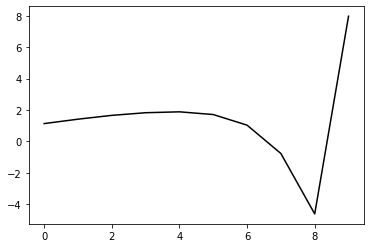

290400 0.22351318822948935
0.40815959886298586 -0.29498519634836967 -0.18445447189489206 -0.1302100260107797
[ 1.09994486  1.421207    1.66173453  1.84872585  1.92097821  1.76264866
  1.10123916 -0.69069863 -4.53028205  7.99949818]


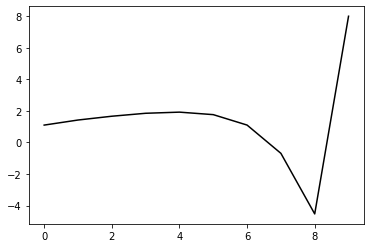

291500 0.24514513809829555
0.3991871721488904 -0.30066125696840973 -0.18830497580052977 -0.12424000507669367
[ 1.10235687  1.40134407  1.52622889  1.64762237  1.68058611  1.49443139
  0.8155539  -0.98582491 -4.83315813  8.00356057]


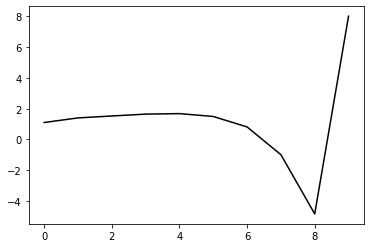

292600 0.1609616290000585
0.3983126945992174 -0.3014950639089132 -0.18671294743763206 -0.138693033791554
[ 1.17728133  1.50399269  1.69842717  1.82398492  1.85373517  1.66676396
  0.98843798 -0.81026539 -4.65354847  7.94820276]


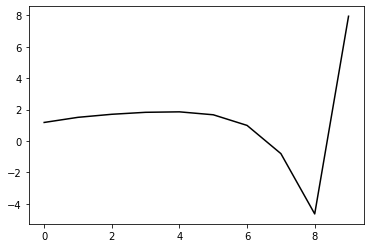

293700 0.18769418224628157
0.411186650904207 -0.2902473351154341 -0.18245108682277716 -0.13851379599781563
[ 1.1717851   1.4850093   1.75694053  1.92380281  1.96632836  1.78862587
  1.11964306 -0.67208318 -4.5201829   8.03798001]


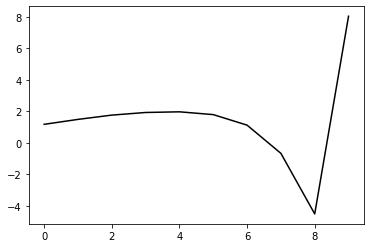

294800 0.3072887401921921
0.4110276886978573 -0.29698348272169384 -0.18887040514473347 -0.13376227445257202
[ 1.06443456  1.46882634  1.71707172  1.92033505  1.9939009   1.83610493
  1.18623641 -0.5867466  -4.42478961  7.98717302]


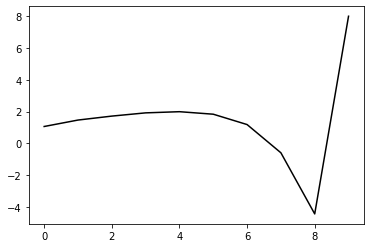

295900 0.33421121269663917
0.41311995043393285 -0.28915574449247866 -0.18609449095606648 -0.13014429501876912
[ 1.06435507  1.59097765  1.79715107  1.92176599  1.93155815  1.71004721
  1.0016195  -0.82300754 -4.71859241  7.93737346]


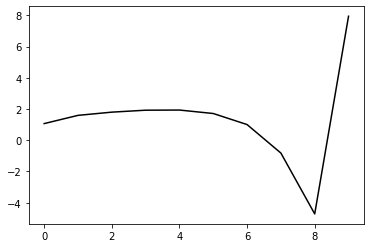

297000 0.32749554803688813
0.39732732914346214 -0.28655216202830014 -0.18002132779375676 -0.14027060595281654
[ 1.1994759   1.57158292  1.75924779  1.8737214   1.87104536  1.63883741
  0.92137597 -0.9080515  -4.8060372   7.9430797 ]


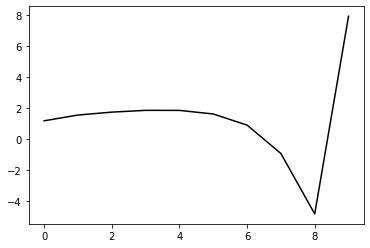

298100 0.23746608284216272
0.4173798342825328 -0.28442216369875917 -0.18402943032673053 -0.1354518185688359
[ 1.02856464  1.50940148  1.79609501  1.9471214   1.94935815  1.71692073
  0.99816574 -0.83155372 -4.73507711  8.04169258]


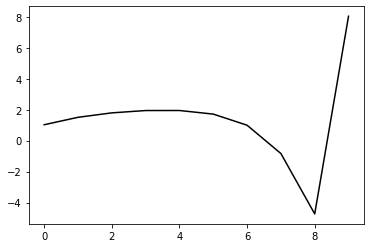

299200 0.28348444965982417
0.3864300477544865 -0.2970617490441633 -0.18766115529124566 -0.13494371775797617
[ 1.23152634  1.238255    1.44441332  1.60442095  1.61813816  1.38811442
  0.67117782 -1.152986   -5.04982177  7.92735515]


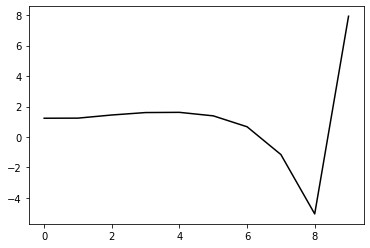

300300 0.3701098177098807
0.41245251630870483 -0.29074684821619295 -0.18833712773221364 -0.13500100307257926
[ 1.01900946  1.42457494  1.69557824  1.85622444  1.87210209  1.63836637
  0.91385599 -0.91576599 -4.81829748  7.95460787]


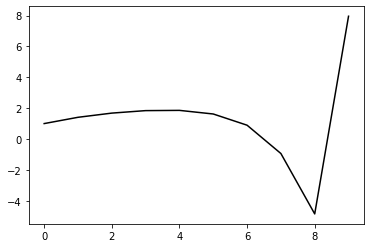

301400 0.2658811009689919
0.38703198094174146 -0.30372410173141534 -0.1926670474248019 -0.13791468460569678
[ 1.1866234   1.34629375  1.55884865  1.72626088  1.75242609  1.52464813
  0.80213404 -1.02507605 -4.9259643   7.97825868]


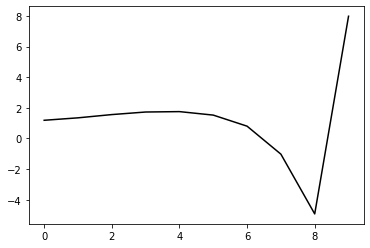

302500 0.32029466874703744
0.3781543720384837 -0.2931285516090431 -0.1826370590555941 -0.14259863082603233
[ 1.25128732  1.23425616  1.41690395  1.55383018  1.56057583  1.31651896
  0.5780555  -1.26223383 -5.17825735  7.84450077]


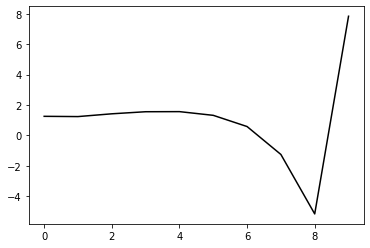

303600 0.14620218318174202
0.4109511341590493 -0.2835192968636897 -0.1840987949296353 -0.14062657098041387
[ 1.12306247  1.50703605  1.7646141   1.91331386  1.93144939  1.69679366
  0.96188097 -0.87806981 -4.80079716  7.91687714]


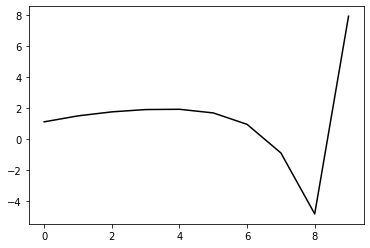

304700 0.2195751713727763
0.40829005166357607 -0.2872897364303146 -0.18645668991232142 -0.14154560798137855
[ 1.06450109  1.46757689  1.74967769  1.94255611  1.97852489  1.75676586
  1.0303576  -0.80270793 -4.72303637  7.96412478]


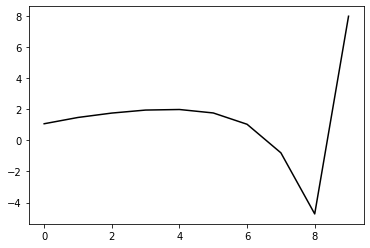

305800 0.2135947052099808
0.3927606024159994 -0.29803852168361006 -0.19291795399213563 -0.14281301470554872
[ 1.10173406  1.43549537  1.62720207  1.79136095  1.81613065  1.58316051
  0.84708425 -0.99194562 -4.91425735  7.93205578]


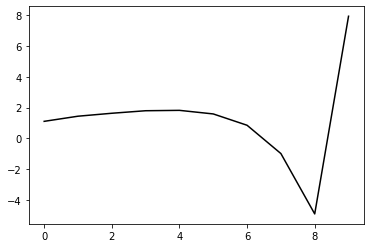

306900 0.2599048069916959
0.41392583238852015 -0.2844091789573678 -0.18951682861215788 -0.142075007038698
[ 1.09021344  1.44963265  1.73300059  1.92278622  1.97484998  1.76460652
  1.04227251 -0.78986124 -4.71703312  8.02617484]


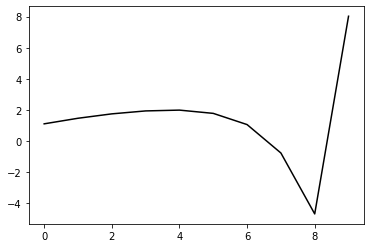

308000 0.34365759528715883
0.3975745774985097 -0.2788679890026561 -0.18175844138181554 -0.1481831212906987
[ 1.17871793  1.26713653  1.4386216   1.59969963  1.63946515  1.42453275
  0.69764962 -1.13862721 -5.07206856  7.9144438 ]


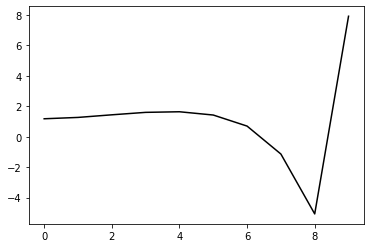

309100 0.1594862324636586
0.4088416399227932 -0.2872254813126426 -0.19195595324548562 -0.1448841883111417
[ 1.13088309  1.50232106  1.78645994  1.96243827  2.01484115  1.81385299
  1.09537102 -0.73676587 -4.67049588  7.97616322]


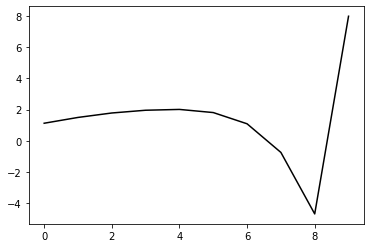

310200 0.25246006483536715
0.41366825467322654 -0.27802126110303055 -0.1874364521108338 -0.14058665357635575
[ 1.18289121  1.38439935  1.60734592  1.75200608  1.7781462   1.5599114
  0.82966686 -1.01226841 -4.95441537  7.8744005 ]


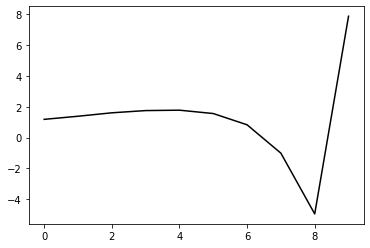

311300 0.21332007519407814
0.4094809460521165 -0.28217822526937575 -0.19030006786624798 -0.1421913007641204
[ 1.1178056   1.41396544  1.67078528  1.8563395   1.90699461  1.70914497
  0.99610785 -0.83380322 -4.77096719  7.99110414]


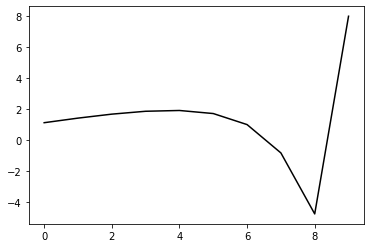

312400 0.21761183366541811
0.4125224673888434 -0.28012135467153093 -0.19076776277784718 -0.14030946231416808
[ 1.1059472   1.42138181  1.65124414  1.8326008   1.89080651  1.70178821
  0.9992234  -0.8221993  -4.7570331   7.96323547]


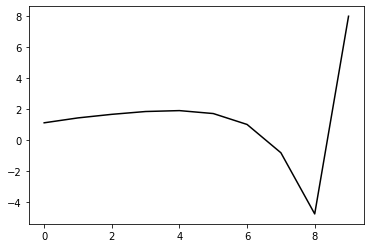

313500 0.20355818569145942
0.39504012660627896 -0.2855809308107645 -0.19217474229952658 -0.14108526243353772
[ 1.15740254  1.40282068  1.58477286  1.7524269   1.80841794  1.61912337
  0.9159341  -0.90769914 -4.84756258  7.86584152]


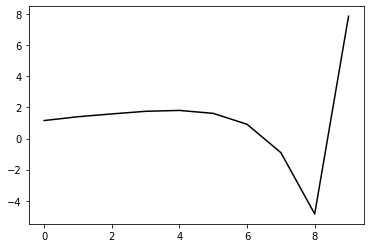

314600 0.15587485843360593
0.40428015622053665 -0.2845380375777955 -0.19365090206621302 -0.1425462350341861
[ 1.15550943  1.3999348   1.65151214  1.83659541  1.90667597  1.73395129
  1.04510055 -0.76835664 -4.70409421  7.97689853]


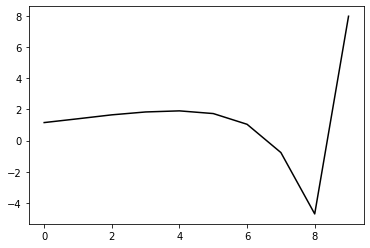

315700 0.18864784160868095
0.4071579999141901 -0.2779661784951447 -0.19141378410755838 -0.14094511251911734
[ 1.14077169  1.45959841  1.69432701  1.85702078  1.90487811  1.71492134
  1.01293071 -0.814286   -4.77001265  7.98356243]


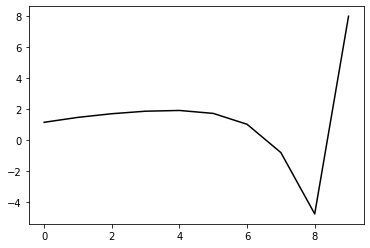

316800 0.19080573386874364
0.41382789481248894 -0.26910762799158616 -0.18781157973416956 -0.1402768493269317
[ 1.10568117  1.50530756  1.77259522  1.95668275  2.0125893   1.82825692
  1.13159087 -0.69448122 -4.65998409  7.96495073]


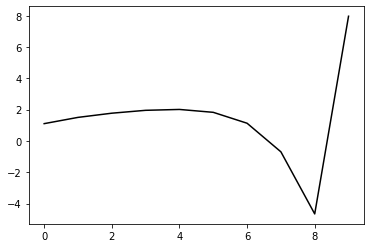

317900 0.2685263219096485
0.4142711272569956 -0.27096648939350376 -0.1915190245694521 -0.1380134084276577
[ 1.09657627  1.51859098  1.76217918  1.94255478  1.99660748  1.806808
  1.10504607 -0.72738835 -4.70510905  7.82053807]


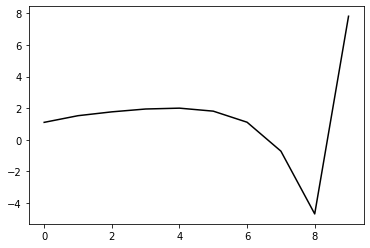

319000 0.7866857527240382
0.3924716384713438 -0.2560445683931836 -0.17496350684582354 -0.15408735343412774
[ 1.28800232  1.30742724  1.51507174  1.69012713  1.74418645  1.5552119
  0.85497058 -0.97717823 -4.96079499  7.93306123]


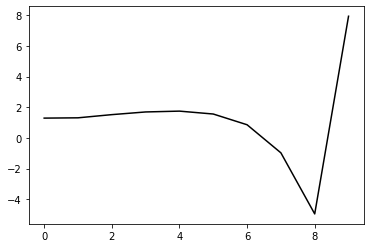

320100 0.2061136473739622
0.41283901879912865 -0.26562818094446444 -0.18980405595066419 -0.13767735219890812
[ 1.04534753  1.50966753  1.75490065  1.90380619  1.93190206  1.71850624
  0.99516417 -0.85908626 -4.86906884  7.91077036]


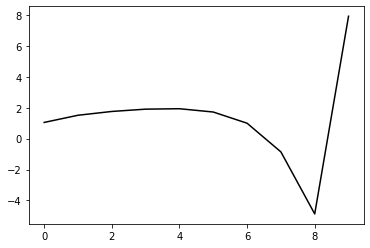

321200 0.27041535159026375
0.3979787118436887 -0.28213919715272473 -0.1981813582322016 -0.13783040024187582
[ 1.10029531  1.39341767  1.62931986  1.82340216  1.89125992  1.7138449
  1.02311652 -0.80188508 -4.78486806  7.92417129]


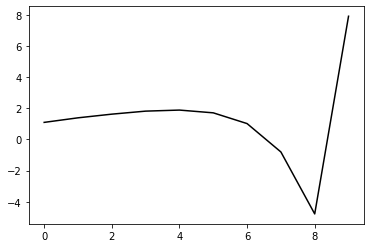

322300 0.20905164135560095
0.40787778755386844 -0.26984402758255155 -0.19261726042090566 -0.13972212052698862
[ 1.12098947  1.39031441  1.65154852  1.85275041  1.93969712  1.78134613
  1.10614374 -0.70807136 -4.68908697  7.98301242]


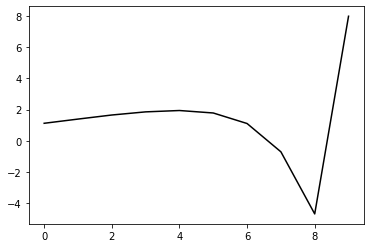

323400 0.22945166299608422
0.39667273152671506 -0.2699328315158006 -0.19134824187544167 -0.1368563663018098
[ 1.09137821  1.41578811  1.57437242  1.73226712  1.79400846  1.61817664
  0.92779583 -0.90261736 -4.9093235   7.92923531]


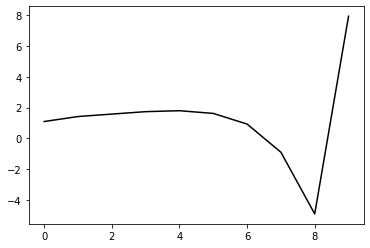

324500 0.3748800106057827
0.3747812602679569 -0.26533433154265834 -0.18377956404781398 -0.14646582788601384
[ 1.25566336  1.16889739  1.30946789  1.4586793   1.52524445  1.37034664
  0.70443473 -1.10551845 -5.10068452  7.94171271]


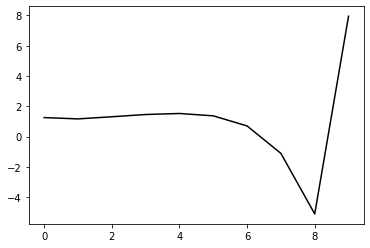

325600 0.1697509977725618
0.38867239285598437 -0.2786757434404006 -0.19689968413724457 -0.14488925965327762
[ 1.18168651  1.54284136  1.68818283  1.79165944  1.83359976  1.66563906
  0.9928284  -0.8217639  -4.82190365  8.00717468]


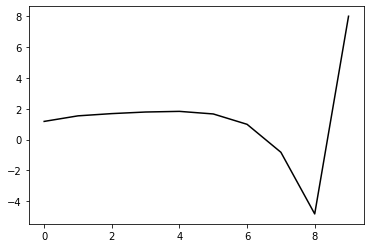

326700 0.19027602723330095
0.40075572165112405 -0.2682655505515169 -0.19304699434270597 -0.14103171670543324
[ 1.13093647  1.51734122  1.74215718  1.84694598  1.85340541  1.66015576
  0.97207675 -0.85511524 -4.87065138  7.88967935]


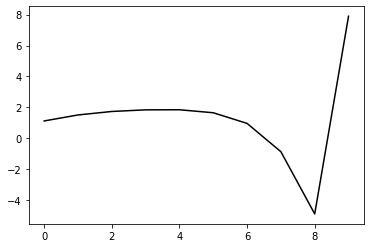

327800 0.22212062672303978
0.3981599032475979 -0.27855698748910573 -0.19982118623959383 -0.14240132266047428
[ 1.10494216  1.50858985  1.77162284  1.94122447  1.97299831  1.79019739
  1.1175574  -0.69310221 -4.69514391  8.01886409]


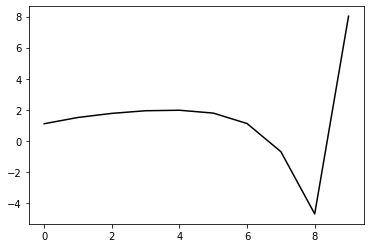

328900 0.31139660824307824
0.41479542852968393 -0.26357952315914607 -0.19277885139174716 -0.13896094940078177
[ 1.06420522  1.56257442  1.82897133  1.97202073  1.97652171  1.75790687
  1.05729419 -0.77408086 -4.79881622  7.96603569]


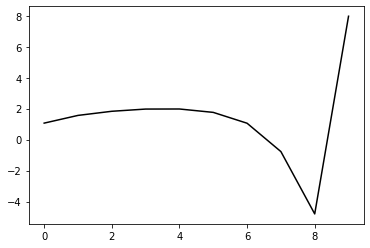

330000 0.2869711269046129
0.401780731714198 -0.2715104730430574 -0.19608439092976498 -0.14261269063911292
[ 1.05820883  1.49651518  1.70188121  1.84080126  1.84883144  1.62673421
  0.92488057 -0.9016163  -4.91868166  7.90134719]


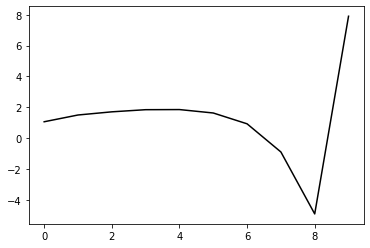

331100 0.17727142985254593
0.4087139508547913 -0.2653374412179346 -0.1945304486269393 -0.14058993819672322
[ 1.1014223   1.49277747  1.76867503  1.9675577   2.02464224  1.83550766
  1.15407895 -0.65808887 -4.67580308  8.02719585]


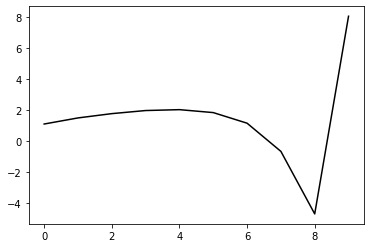

332200 0.29745806100238065
0.3966656763730874 -0.27519340600565 -0.20052027852731427 -0.1416263154404239
[ 1.09684212  1.53240913  1.75739054  1.94535686  2.01848118  1.84412333
  1.17254386 -0.62918044 -4.64077028  7.92154421]


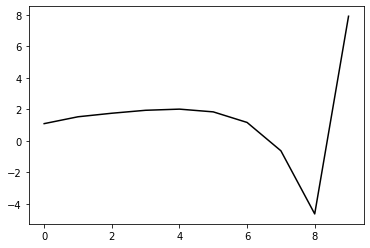

333300 0.2791948087399906
0.3695374196964819 -0.2766518157956757 -0.1999044570652104 -0.1295349806746351
[ 1.11784912  1.26370347  1.40082817  1.51235628  1.51923918  1.29519044
  0.58048492 -1.25902154 -5.31669359  7.82634981]


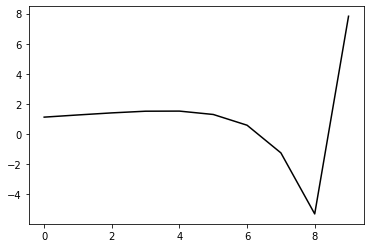

334400 0.2673961620578221
0.38991258780164556 -0.26966581719885496 -0.19789982465898623 -0.137215783987061
[ 1.19124129  1.36371844  1.58909324  1.71851354  1.73060415  1.50967001
  0.79537038 -1.04347582 -5.09827668  7.95013981]


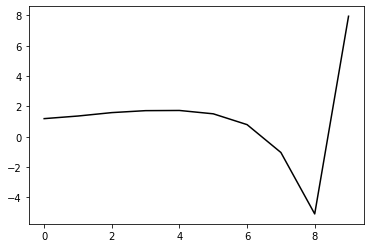

335500 0.22619192200474647
0.390383334418027 -0.2645976733428219 -0.1931328433725405 -0.14729588077670808
[ 1.17623249  1.42316081  1.68890893  1.85109818  1.87446092  1.66058296
  0.95180562 -0.88163715 -4.93290032  7.91334346]


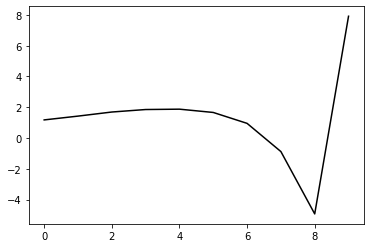

336600 0.1675655071624502
0.39530299815466546 -0.2653253312361975 -0.19704274676512007 -0.13948237765470733
[ 1.12067562  1.40738148  1.63828702  1.81857021  1.86092301  1.65701858
  0.95440192 -0.87529977 -4.9315864   7.93195627]


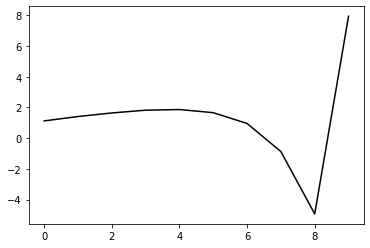

337700 0.1954728456067818
0.3753703734683615 -0.27479270586791843 -0.19950763639512467 -0.13871723269631434
[ 1.15816025  1.43003026  1.59091936  1.74182728  1.77192181  1.55368422
  0.83492004 -1.00860441 -5.07489934  7.9153287 ]


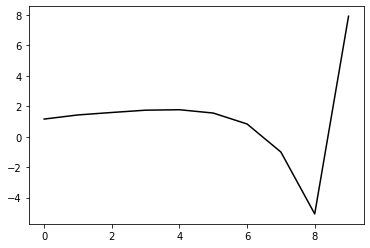

338800 0.19799236957694982
0.4034373870164184 -0.2561651398761172 -0.19221570025114396 -0.1406634466650569
[ 1.0865108   1.58341131  1.83712897  1.987136    2.01453456  1.79579079
  1.07354364 -0.77540078 -4.85346841  7.88868297]


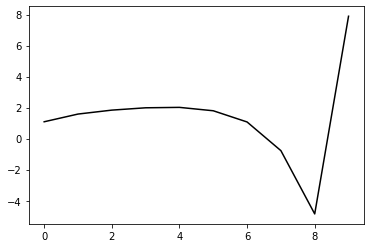

339900 0.31945576433303396
0.3849207094575709 -0.2691141785029486 -0.19846757692162584 -0.14095152835808927
[ 1.20556813  1.37265306  1.60370058  1.78428101  1.83220634  1.63153476
  0.92444657 -0.91039975 -4.97355193  7.97254653]


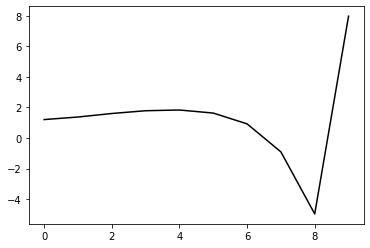

341000 0.2569739543109634
0.39522618095484924 -0.26124097899111576 -0.1957322259741905 -0.1412027742423905
[ 1.09033817  1.45313261  1.70436327  1.8908514   1.94793547  1.75407811
  1.04933295 -0.78718799 -4.86077879  7.93694738]


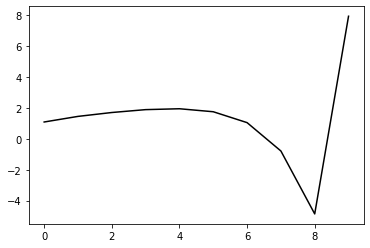

342100 0.17064354348582433
0.3896932286910431 -0.26967315127480457 -0.2009060669823677 -0.1434568871663287
[ 1.17399101  1.38825399  1.6766054   1.89868337  1.99663994  1.84107221
  1.16733295 -0.64284318 -4.69141106  8.01388819]


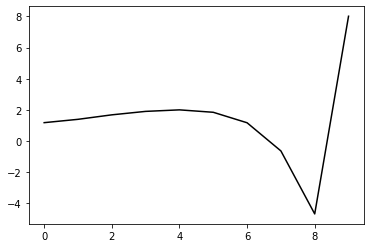

343200 0.24356063696491614
0.39763622837989804 -0.25774821029743694 -0.19352027153914508 -0.1383091578609699
[ 1.18573588  1.44450041  1.64033471  1.77339401  1.81139261  1.61057791
  0.89965103 -0.94245234 -5.02007256  7.95525987]


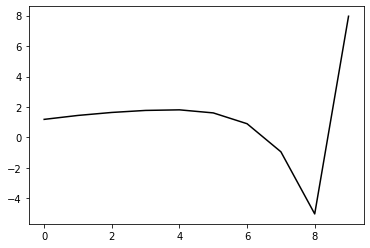

344300 0.324622280384852
0.39858877212723065 -0.263563949250781 -0.19850430822652912 -0.13973951211304914
[ 1.05605486  1.46106306  1.73458241  1.90663677  1.9545009   1.76572899
  1.06670388 -0.7650509  -4.83242476  7.96589976]


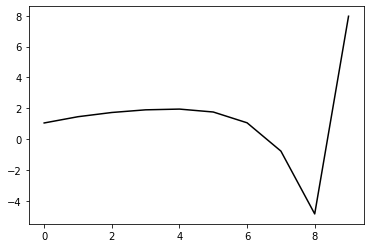

345400 0.3022404693132251
0.3718180741905555 -0.2747177318218698 -0.20244638371410292 -0.1367538484431094
[ 1.22428723  1.28269072  1.4782696   1.63502788  1.66722899  1.46271754
  0.75204919 -1.09000348 -5.16881176  7.942768  ]


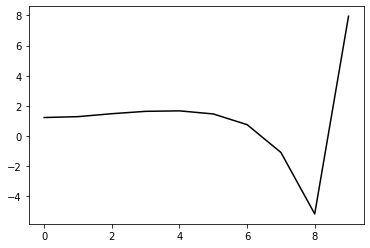

346500 0.22075712322025515
0.3768700871063314 -0.2657210884675402 -0.19652218007364758 -0.14296263409185245
[ 1.17706079  1.44433828  1.65521059  1.8038106   1.83030973  1.6186286
  0.90110379 -0.94804545 -5.03466393  7.86164174]


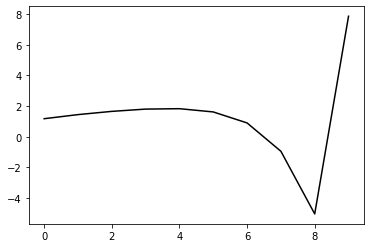

347600 0.27422255164233184
0.360640862170012 -0.2691971666024277 -0.196587565796138 -0.14224568560740042
[ 1.24066275  1.24296936  1.43831492  1.57163273  1.58043011  1.35253889
  0.62128984 -1.24062257 -5.3435994   7.88988693]


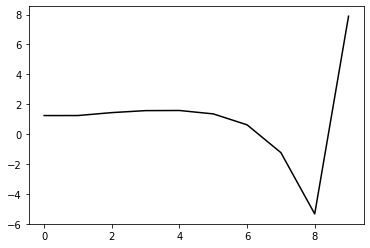

348700 0.19928841697662994
0.38709393223075755 -0.2651261345504038 -0.20011101516845453 -0.14573927013702292
[ 1.18514046  1.44085781  1.71444188  1.88533986  1.92472361  1.72142503
  1.01060271 -0.8346695  -4.92467678  7.85981731]


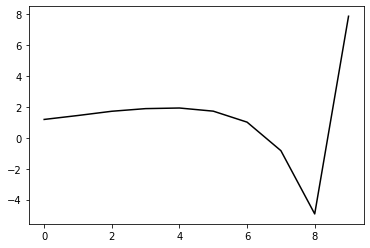

349800 0.23436816480476838
0.3931794136009076 -0.26131911639344607 -0.1999930981309716 -0.14213635187940954
[ 1.08210907  1.45411384  1.74380248  1.95596346  2.02035582  1.83402203
  1.13690923 -0.69822744 -4.78659248  7.95549641]


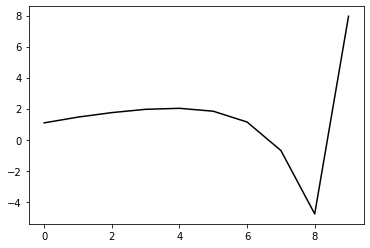

350900 0.42973480348966514
0.39092636603546127 -0.25408172618024927 -0.19452314759795694 -0.14498808965662852
[ 1.2650338   1.37497038  1.6436379   1.84260618  1.91481513  1.73287077
  1.03685819 -0.7983871  -4.88861619  7.977301  ]


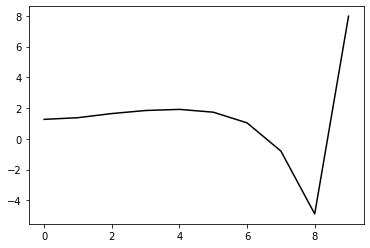

352000 0.31132354098507453
0.39457506116418 -0.25123351811663297 -0.19122859721711152 -0.14854598443012104
[ 1.18963414  1.60970268  1.78775099  1.89645189  1.89875992  1.66289545
  0.9232558  -0.94617881 -5.06252567  7.90170571]


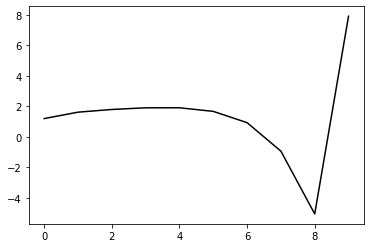

353100 0.192763779166563
0.4124920156276434 -0.24722267594055825 -0.19277133848210906 -0.14584646085649072
[ 1.04604695  1.56827892  1.86444305  2.01395228  2.01473721  1.7758133
  1.03326342 -0.83996729 -4.96432095  7.99381867]


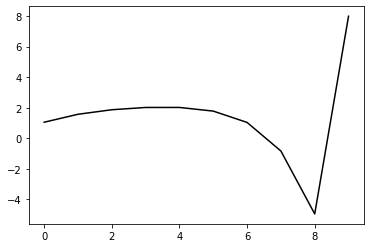

354200 0.35002920792315884
0.3961935236921763 -0.2537530619616411 -0.1948262937731866 -0.14795178270111586
[ 1.27864063  1.16758709  1.44710704  1.66672077  1.73258325  1.54144543
  0.84079607 -0.99450446 -5.08331899  7.87658028]


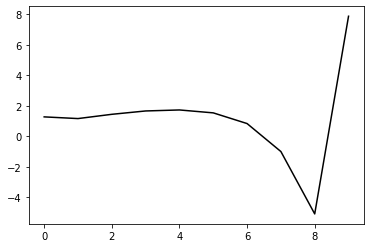

355300 0.2125772274410138
0.4022316371302856 -0.2538080877451728 -0.19639442017044684 -0.14705406350067604
[ 1.10210025  1.44504306  1.71010344  1.90683389  1.9702728   1.77136044
  1.05684174 -0.79326524 -4.89813836  7.97659178]


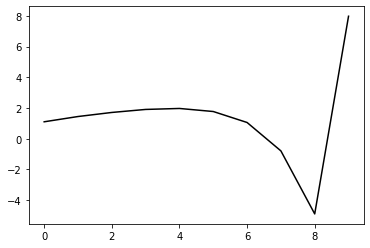

356400 0.4367788010516106
0.3973749302825098 -0.24991103864609873 -0.19369099180000046 -0.14708981613975522
[ 1.26322899  1.23938096  1.5078283   1.72684328  1.82101911  1.65639678
  0.96997183 -0.85798565 -4.94945125  7.95730361]


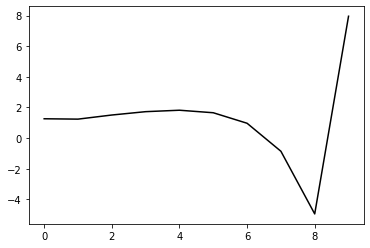

357500 0.2698565715510229
0.38260269352354 -0.2540877711223241 -0.1957502257641056 -0.13866433588342184
[ 1.10237366  1.19819725  1.36098261  1.51698044  1.56616555  1.3663186
  0.64652351 -1.21490367 -5.34632613  7.91049296]


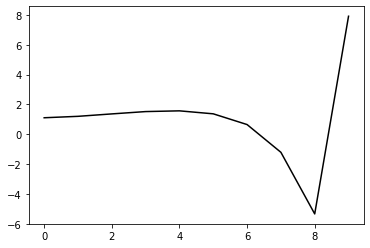

358600 0.16371728712236844
0.40399880057072257 -0.2502926051912318 -0.19738096119464113 -0.1453173465209075
[ 1.06794994  1.56018142  1.7888885   1.94637318  2.00133327  1.81045821
  1.09622836 -0.7633931  -4.89438162  7.92628364]


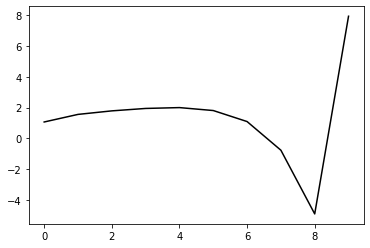

359700 0.19059262759336024
0.3988077936817786 -0.2508572060084196 -0.19701274215663864 -0.1446097544564113
[ 1.1176438   1.41354515  1.65991092  1.8453868   1.91339123  1.74032756
  1.04482936 -0.79930992 -4.91684756  7.9465877 ]


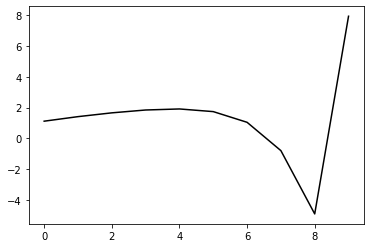

360800 0.20112725806953602
0.3963539411644365 -0.25042279631777264 -0.19818890554836077 -0.14057527335848352
[ 1.11883594  1.32796053  1.55997342  1.76662611  1.85782721  1.70672493
  1.03253203 -0.79590797 -4.90503901  7.92279836]


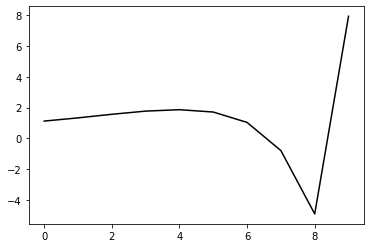

361900 0.3257202103852332
0.3752499841631244 -0.25181809750518425 -0.19507547718764984 -0.14159402501855947
[ 1.16290222  1.32592368  1.39788011  1.52307428  1.57373645  1.39377026
  0.698093   -1.14860508 -5.27572861  7.88978382]


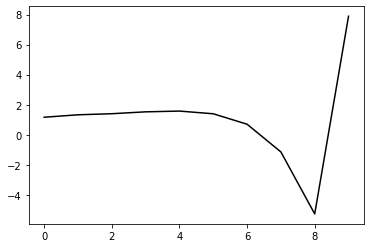

363000 0.5724699791312734
0.39783748231392474 -0.24342991951324738 -0.19328069363526154 -0.15101723336162598
[ 1.27622356  1.33728125  1.61514977  1.77987601  1.85416714  1.70479996
  1.03857153 -0.78280915 -4.88807995  7.88395188]


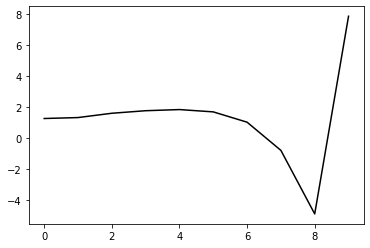

364100 0.23902349340236334
0.38315337485482787 -0.2461176209035722 -0.19349258108155332 -0.14574906769590293
[ 1.19508658  1.37179344  1.50347368  1.6226577   1.64961953  1.46190399
  0.76822441 -1.07659002 -5.20488622  7.87610114]


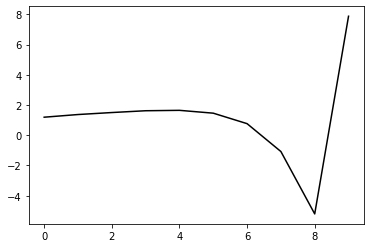

365200 0.2877870039487089
0.3931399410108351 -0.24778700011093693 -0.19686858948187305 -0.15049302108425705
[ 1.19873838  1.44922448  1.69871308  1.85016627  1.89397228  1.7213468
  1.04457539 -0.78572701 -4.90562776  8.02297825]


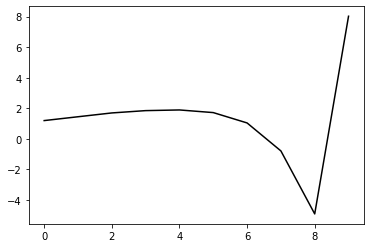

366300 0.3328868652561333
0.381182635410103 -0.24785572154856447 -0.19548800927893384 -0.1484540740446704
[ 1.19052659  1.32121547  1.51653222  1.65442912  1.670225    1.46715247
  0.7691767  -1.07835869 -5.22053877  7.8919028 ]


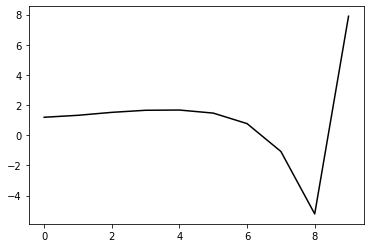

367400 0.2714959041229979
0.37515703493640556 -0.25860376469706364 -0.204433321228657 -0.13725513949019089
[ 1.1347949   1.31716663  1.49563198  1.61851605  1.61551247  1.38653301
  0.66447272 -1.20569326 -5.37772617  7.85706486]


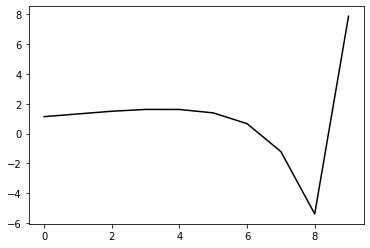

368500 0.26668931282026753
0.37222286246669883 -0.25603067772007737 -0.20074637950207097 -0.15374809397678724
[ 1.17301831  1.25022394  1.47567276  1.63921651  1.67443487  1.47641745
  0.78191427 -1.06190435 -5.20729118  7.92420762]


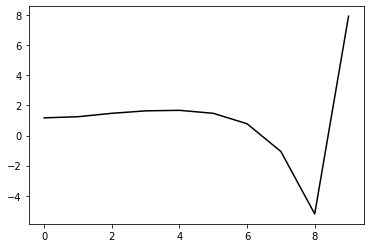

369600 0.178807055817725
0.3865099796645894 -0.25128181554739826 -0.20169327441078896 -0.14512066144556623
[ 1.08046323  1.42362393  1.65340546  1.80315665  1.82055719  1.6018786
  0.88756671 -0.97391157 -5.14051185  7.92601907]


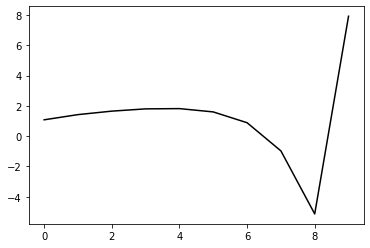

370700 0.24995846924239704
0.3951795382505245 -0.2393614877825171 -0.19591869747562723 -0.14950080798878024
[ 1.19038943  1.46950167  1.75414196  1.96433923  2.03425999  1.85448889
  1.16841683 -0.67219338 -4.83096127  8.0375525 ]


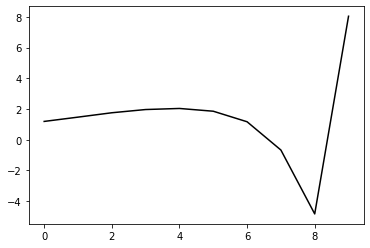

371800 0.19859320807616926
0.3942415047999751 -0.24509654212543794 -0.2015800718583498 -0.14479039918741407
[ 1.09451297  1.49996171  1.78513161  1.98934026  2.05585796  1.87072341
  1.17773266 -0.6683771  -4.83778202  7.95822685]


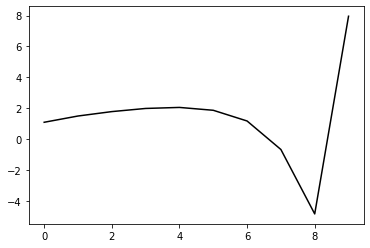

372900 0.2609541831970474
0.39466038003217985 -0.24277107958924327 -0.20121347049014932 -0.1423087219872405
[ 1.11241971  1.37048475  1.63997318  1.86757373  1.96898593  1.81680018
  1.15092957 -0.6704833  -4.81975866  7.99000139]


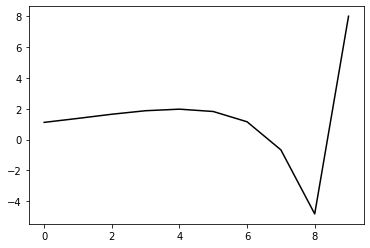

374000 0.7317198472649928
0.378119854090341 -0.2395191857843016 -0.19385181966141338 -0.15412601519076646
[ 1.3357693   1.21828596  1.44930316  1.64222914  1.73863516  1.59121285
  0.92994752 -0.88488485 -5.02415293  7.92865411]


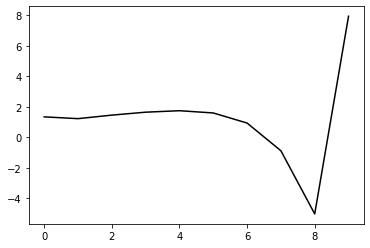

375100 0.2577497466266725
0.3647250158148305 -0.2426453812790471 -0.19603787916080923 -0.1499016410262371
[ 1.208167    1.28209415  1.47015223  1.61460476  1.66535469  1.48009153
  0.78254679 -1.06878644 -5.25234994  7.87784672]


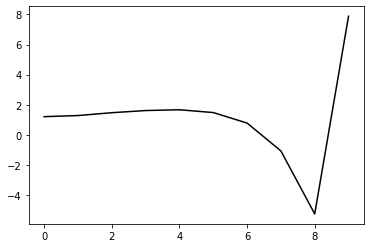

376200 0.21317236785645358
0.37089907798326444 -0.24670570036726522 -0.20182184795981362 -0.14537630916956606
[ 1.11947145  1.38668284  1.59555708  1.74995395  1.80182655  1.62204449
  0.92940094 -0.92034803 -5.10903834  7.90786599]


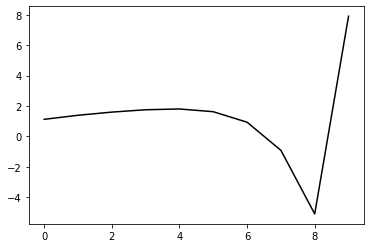

377300 0.2687361354737825
0.3729216559119628 -0.24992065564533048 -0.20561463137286204 -0.1411097224315181
[ 1.06133831  1.54108362  1.68595119  1.80187185  1.82389314  1.62069119
  0.90962209 -0.95621695 -5.16073332  7.89750169]


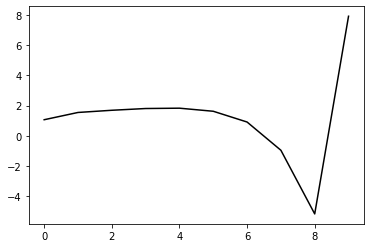

378400 0.22727387180578582
0.3757551033030824 -0.2425073373517773 -0.20125095959455014 -0.14720919886694567
[ 1.12308924  1.45247698  1.69350336  1.82980181  1.85568042  1.65795785
  0.9534959  -0.90720348 -5.11007769  7.88177388]


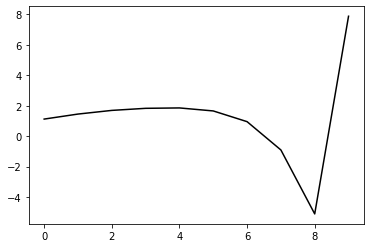

379500 0.1926649084262804
0.37669440040424557 -0.2475081938915825 -0.20548452947150753 -0.14758371454526403
[ 1.14369483  1.36855872  1.65556926  1.84986229  1.90691279  1.731709
  1.04977602 -0.79022181 -4.9760432   7.9323734 ]


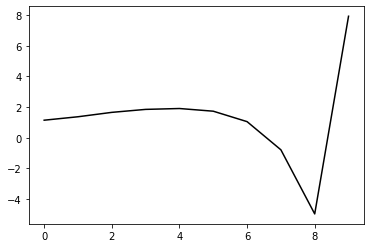

380600 0.15143603435308556
0.3781448773685678 -0.23467509575677312 -0.19858159974406936 -0.14528234449005858
[ 1.12958811  1.48136901  1.68701316  1.84254131  1.87330461  1.66745107
  0.95909351 -0.90501845 -5.11969176  7.88279868]


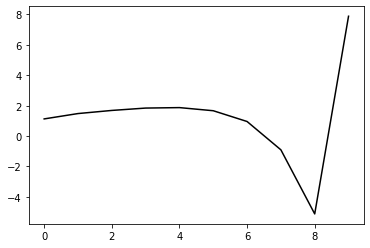

381700 0.1909507646090519
0.3747059118292643 -0.2396472476641812 -0.2022661970256804 -0.14478335380342625
[ 1.1356361   1.46708472  1.71685764  1.88294722  1.91618434  1.70756982
  0.99441446 -0.8746309  -5.09740481  7.90211248]


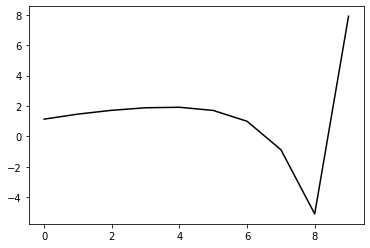

382800 0.19604160160979966
0.3742257751473582 -0.2454146163581329 -0.2073309506231892 -0.14387159520129403
[ 1.13366435  1.48844565  1.74111871  1.9364983   1.99452241  1.80319258
  1.10292022 -0.75527018 -4.97081679  7.92013631]


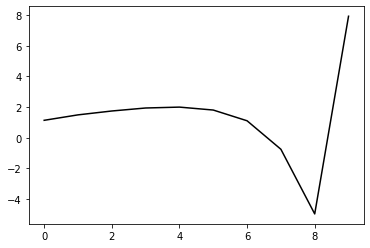

383900 0.39832211962989844
0.38066814177980846 -0.23628714276753018 -0.20109769502057212 -0.14845685784512522
[ 1.25419899  1.45503893  1.71856498  1.89249676  1.9458169   1.7518833
  1.04877717 -0.81005928 -5.02206197  7.96693155]


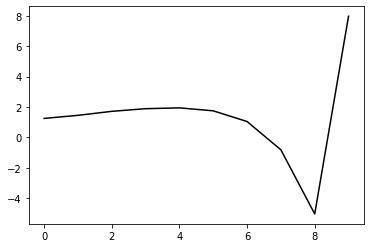

385000 0.7863562611502708
0.38087474837287855 -0.22847502590226298 -0.19561789147586747 -0.15388405787654347
[ 1.34234715  1.37119912  1.698757    1.90183334  1.96679678  1.78467845
  1.09175152 -0.75812913 -4.96520151  8.06329939]


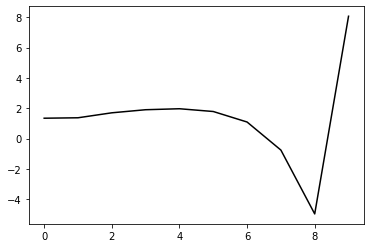

386100 0.24324002950417248
0.36381463766811634 -0.2409579113607235 -0.20314062726556545 -0.14625618019329684
[ 1.18747188  1.2647967   1.51757444  1.68221221  1.69888264  1.46771329
  0.7321021  -1.15353032 -5.39556985  7.87647439]


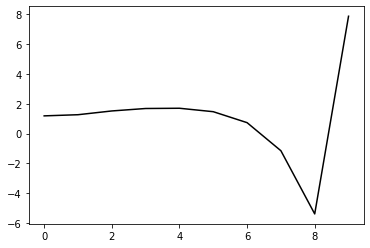

387200 0.21207381359360428
0.38418421390862684 -0.23699154925867214 -0.20461393110492834 -0.14697014822450374
[ 1.1797389   1.5225022   1.83043947  2.02696379  2.06841586  1.84877476
  1.11655767 -0.76931176 -5.01504476  7.85697068]


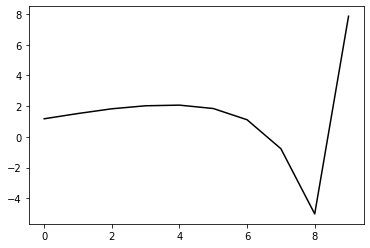

388300 0.3338752679645276
0.37310366195851796 -0.24127334910974424 -0.2071651278383537 -0.13857948025507777
[ 1.22668667  1.30308013  1.52642443  1.69811387  1.72433893  1.48970288
  0.74355337 -1.15271256 -5.40871803  7.90166608]


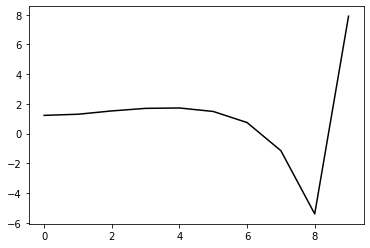

389400 0.29248754067997246
0.37310733611648045 -0.2424209734313049 -0.20861934078172872 -0.14113659683077226
[ 1.22976759  1.34672017  1.59445691  1.77323674  1.80962679  1.5810591
  0.83479803 -1.06304205 -5.32026446  7.86350049]


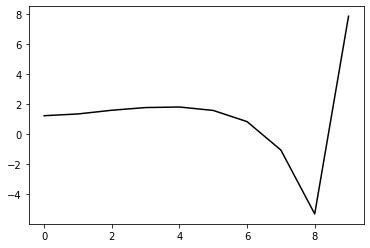

390500 0.21440431669566598
0.3800271841714132 -0.23930478563349067 -0.20761878402683948 -0.14539292179856686
[ 1.20423672  1.37011973  1.68393764  1.89799774  1.96368119  1.76108035
  1.03427756 -0.8469107  -5.08753121  7.94771085]


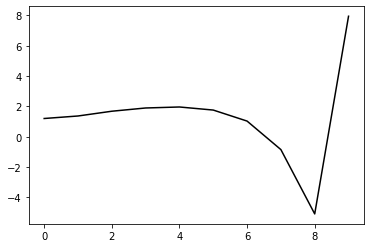

391600 0.1497393619448999
0.3789479830527309 -0.23052677239653893 -0.20287311667709335 -0.142634575069882
[ 1.14227744  1.54532589  1.75915881  1.92643187  1.96128359  1.73153171
  0.97722139 -0.93168418 -5.20455721  7.81662629]


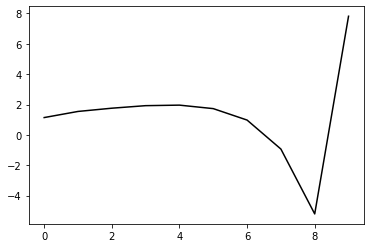

392700 0.22063494712423615
0.3608494948072111 -0.24283721979844086 -0.20908390124373882 -0.14029154549405726
[ 1.14610362  1.38432246  1.55427776  1.71041552  1.7425045   1.51390068
  0.7587403  -1.15176084 -5.42471131  7.79917287]


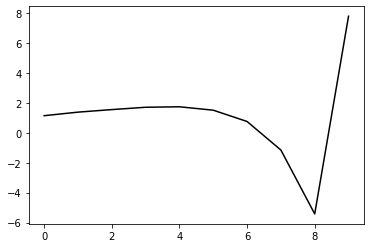

393800 0.2438045528417244
0.37986911170007387 -0.24033133796870212 -0.2113831398744598 -0.14574824373067827
[ 1.10137986  1.59337243  1.88509634  2.07477505  2.12887139  1.92063068
  1.17936101 -0.72400237 -4.99848554  7.96975842]


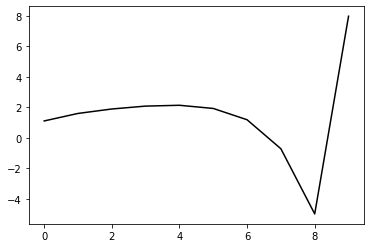

394900 0.2822029162782006
0.3855824624083059 -0.23140236307323842 -0.20681904702016995 -0.14341554615094965
[ 1.16574305  1.5153903   1.83224493  2.02174187  2.06095864  1.83749878
  1.08205241 -0.835745   -5.12256702  7.91282096]


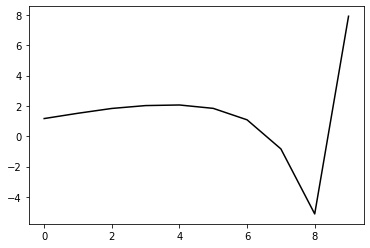

396000 0.5790183056746521
0.38113553196632005 -0.22774421728233807 -0.2032958576991235 -0.1482028605920512
[ 1.33651948  1.24344541  1.5720971   1.84362283  1.95691283  1.79152291
  1.08444519 -0.79391622 -5.04698462  7.90570569]


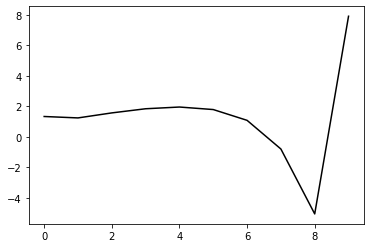

397100 0.24959330315339798
0.360676334865205 -0.23690478923235556 -0.20618347605393336 -0.14635709978145775
[ 1.22775241  1.2246264   1.45910519  1.63635382  1.68890671  1.47469969
  0.72632135 -1.18602904 -5.466368    7.85847916]


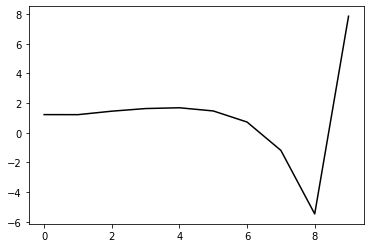

398200 0.24475820752714103
0.3886597112087187 -0.22813295922028437 -0.20563656486585 -0.1461753590193344
[ 1.20775509  1.59029818  1.8816674   2.06545815  2.11990885  1.90716385
  1.15557127 -0.76366572 -5.05246123  7.93054116]


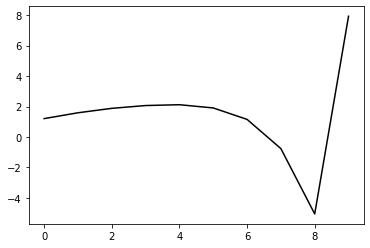

399300 0.23598217502767005
0.38015925601835543 -0.228153368952503 -0.20685586050770446 -0.13389894416389936
[ 1.08009877  1.44229188  1.66259073  1.80118751  1.79624762  1.53448639
  0.74268477 -1.21332766 -5.54478886  7.75183851]


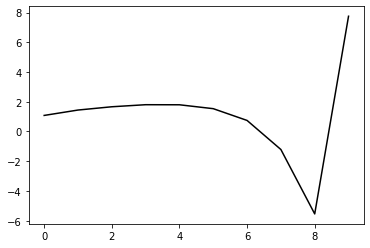

400400 0.2208734375471342
0.39798282669953755 -0.22063939645682765 -0.2048338388310739 -0.14305949461672535
[ 1.13551889  1.5658813   1.88439154  2.07153895  2.10263244  1.86539954
  1.09095439 -0.85338829 -5.17431496  7.87428955]


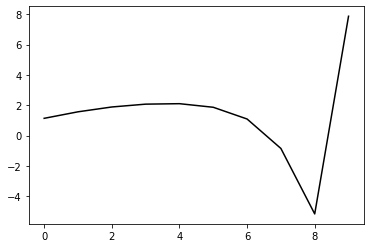

401500 0.25855013783140435
0.3691579118435792 -0.24843810297319438 -0.2181141217484667 -0.14052639768552966
[ 1.21247124  1.26144842  1.52622383  1.73975556  1.79447899  1.57424409
  0.81473677 -1.11460266 -5.41274191  7.9086109 ]


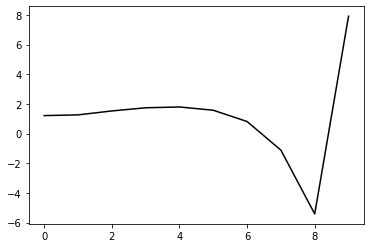

402600 0.15015245745675806
0.3912699216445618 -0.22497389398368006 -0.20534615184298974 -0.14368576827854096
[ 1.17013437  1.47054898  1.7660213   1.97084051  2.02778955  1.80570552
  1.03854422 -0.90332871 -5.2206586   7.84588914]


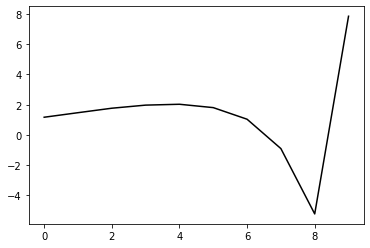

403700 0.1807730227943014
0.3908460506165712 -0.22540466469379877 -0.2061624090272411 -0.14703679401370165
[ 1.18070297  1.49217519  1.80275105  2.05533465  2.15996745  1.9817394
  1.24952591 -0.66648456 -4.96655834  7.96289806]


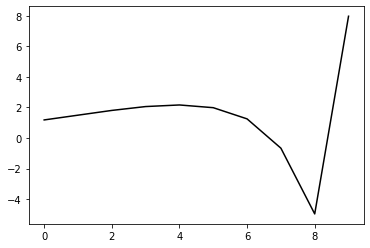

404800 0.1928685618662644
0.39056209777260387 -0.2243884181353086 -0.2070770329457533 -0.14348112789575224
[ 1.12702139  1.47416205  1.75404134  1.99667101  2.10526699  1.93495468
  1.20781737 -0.70878265 -5.01582911  7.91888114]


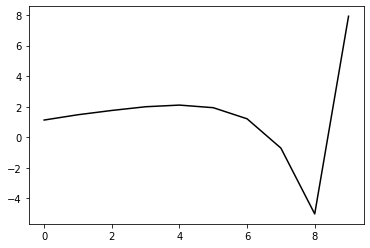

405900 0.3801990624582852
0.3864756397608259 -0.23424652707425134 -0.21295247780698992 -0.14164376047897895
[ 1.09551835  1.55890074  1.79688267  1.99247459  2.07105147  1.87645926
  1.12538273 -0.81565476 -5.14713921  7.89306682]


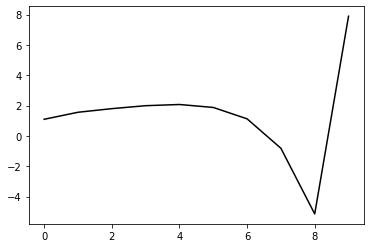

407000 0.43267444015870077
0.3798086295913173 -0.22785492453989892 -0.2065433117062969 -0.15111612078630557
[ 1.27937565  1.44531122  1.7335254   1.94276922  2.03807847  1.86769951
  1.1387393  -0.78549357 -5.10282767  7.99064766]


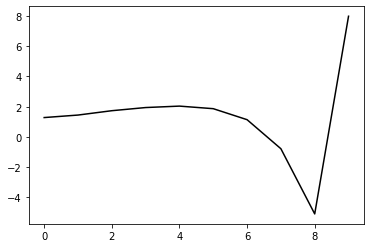

408100 0.2322983040805623
0.3814976604757288 -0.2315578778708412 -0.2116065715157276 -0.14153978423266825
[ 1.0778073   1.49999177  1.71019578  1.86266286  1.90572596  1.69865881
  0.94181852 -1.01015966 -5.35895506  7.84160073]


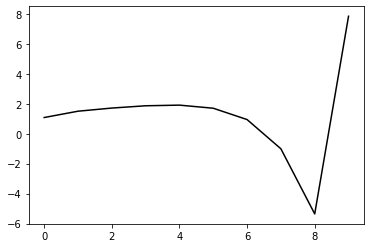

409200 0.18469413701008966
0.3818689839085451 -0.23234291793240372 -0.21261631027940756 -0.1450641745759795
[ 1.16986039  1.41643804  1.72296754  1.94240785  2.03059528  1.86670435
  1.15069917 -0.76949798 -5.09307525  7.9106702 ]


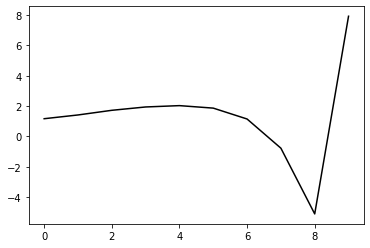

410300 0.21445819643549305
0.3861449209642426 -0.2255891295316038 -0.2093564794525724 -0.14526404587763336
[ 1.11836035  1.44696214  1.726441    1.96521365  2.07580969  1.92853196
  1.22905672 -0.68269442 -5.0099555   7.91319932]


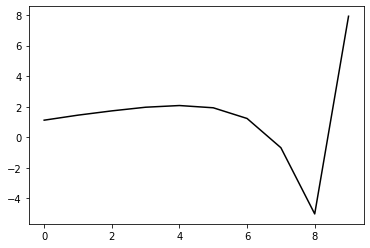

411400 0.2916455102263179
0.3888383309299719 -0.22266325435884773 -0.20922790906165945 -0.14212769700960853
[ 1.08771042  1.42722408  1.68424843  1.91970474  2.05490632  1.93998497
  1.27355128 -0.61291433 -4.92924571  7.90034582]


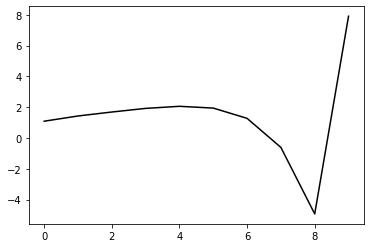

412500 0.24839953547676166
0.3645028974589819 -0.23886264035408042 -0.21699597016580158 -0.13587803085398853
[ 1.14887745  1.35889468  1.50584915  1.66164765  1.74192706  1.58966512
  0.89714087 -1.01158633 -5.3528687   7.89786631]


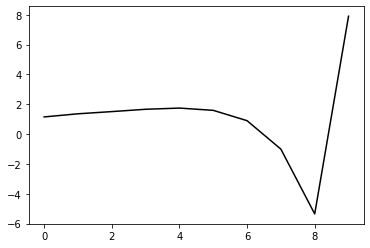

413600 0.1784481138890749
0.36174239995343027 -0.2333838786587528 -0.20991359930601985 -0.14704255133102745
[ 1.19868957  1.50925228  1.65743675  1.78073698  1.82978257  1.65808589
  0.95289263 -0.96589091 -5.31307957  7.83177644]


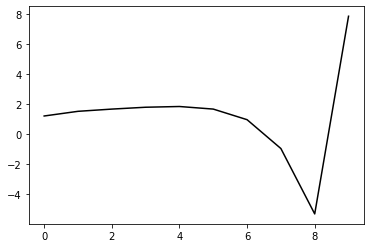

414700 0.18452002263269227
0.38705862993866214 -0.2227428327694498 -0.2077632893379275 -0.1480981778743189
[ 1.15028289  1.55882329  1.84508525  2.00146682  2.04798916  1.87673852
  1.17661597 -0.73866493 -5.08946113  7.91258787]


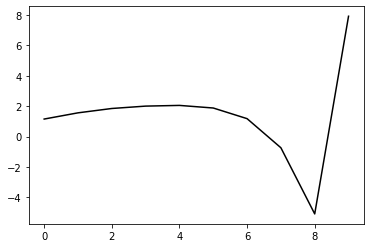

415800 0.3308845147798444
0.3496520093775386 -0.23445069862740903 -0.2077918967828798 -0.14929499516048786
[ 1.22159282  1.24910804  1.41230797  1.54150542  1.54957666  1.34409568
  0.62483285 -1.3014966  -5.66068021  7.80812621]


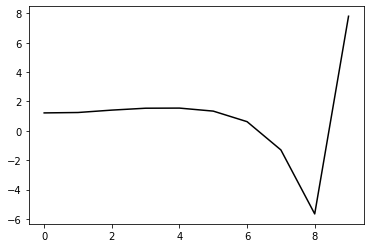

416900 0.289945825159042
0.38642106891036576 -0.22610258447245538 -0.21098635539874447 -0.15156134765774137
[ 1.16201242  1.50770974  1.79013192  1.94405132  1.97172299  1.77569225
  1.0653305  -0.85440558 -5.21589473  7.90953016]


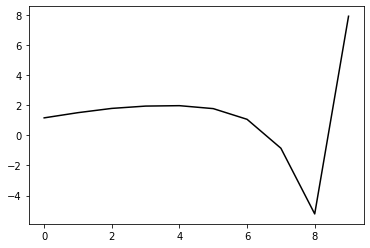

418000 0.4674281225110421
0.3798293051835391 -0.22501175190423195 -0.2089630025709453 -0.15607065339072715
[ 1.28286865  1.42512974  1.7315403   1.94378614  2.00587513  1.82791046
  1.13406764 -0.76974001 -5.12052941  7.87480017]


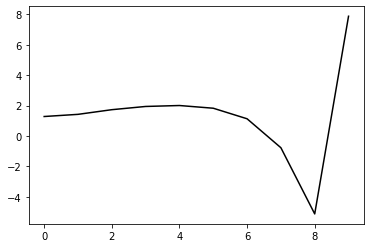

419100 0.15972471689935286
0.3915663044197252 -0.22292232011068147 -0.21037850714472772 -0.15183365585602163
[ 1.14603273  1.55094613  1.83584862  2.02985125  2.08670787  1.89736171
  1.1929215  -0.71826281 -5.07762842  7.96228973]


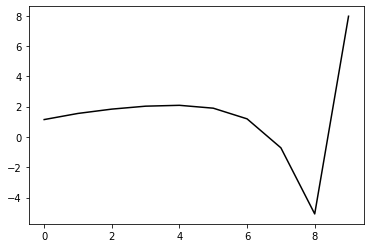

420200 0.3256577522039108
0.3946601059663067 -0.22116813863126586 -0.21167811545131143 -0.14715995923267955
[ 1.06199068  1.47971044  1.77117506  2.0014107   2.09219439  1.92704861
  1.24007926 -0.65585077 -5.0110853   7.89114454]


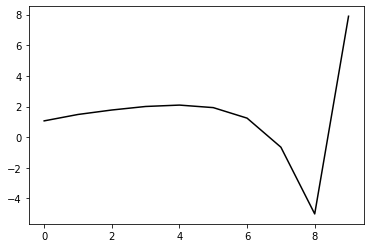

421300 0.3029358487670676
0.38889956901602574 -0.22703872739409756 -0.2147739737906772 -0.14837470261553548
[ 1.08188927  1.58279515  1.81450596  1.9937598   2.05569707  1.86443334
  1.15233842 -0.76457689 -5.14283361  7.92018049]


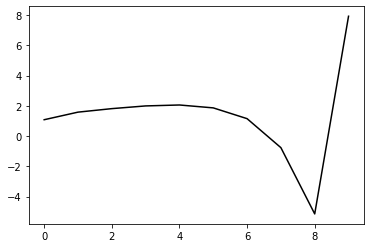

422400 0.3337577153488589
0.3951451364272227 -0.22210350095358286 -0.21291360196787243 -0.14851784933834214
[ 1.0696999   1.53990047  1.83555478  2.03119249  2.09875982  1.91563479
  1.20857735 -0.70355229 -5.08163793  7.88190562]


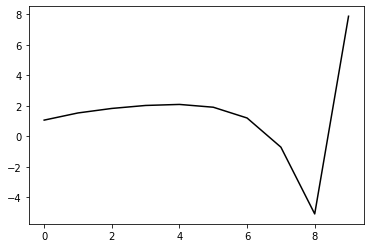

423500 0.2909211641234361
0.36350180534534293 -0.2330425865790493 -0.21390237043503316 -0.15066593640233986
[ 1.25740313  1.28811584  1.45731449  1.64289014  1.71385279  1.53779834
  0.83936077 -1.06032608 -5.4186108   7.90638838]


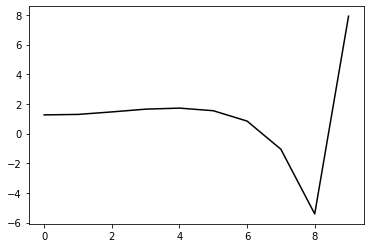

424600 0.14312607338669128
0.3995277772210069 -0.21683976737714344 -0.2103034335387806 -0.14783405293298377
[ 1.15889702  1.5186949   1.81205633  1.97998513  2.03025676  1.83952697
  1.12708607 -0.7865255  -5.16605967  7.87992725]


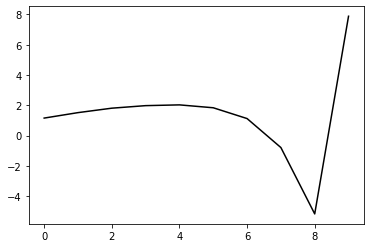

425700 0.23015328479831726
0.3645652759329925 -0.236543692187281 -0.21933759246737286 -0.13996810110718494
[ 1.11669464  1.31562828  1.49422975  1.64325561  1.6693403   1.4573125
  0.7284554  -1.19748396 -5.58789137  7.80415365]


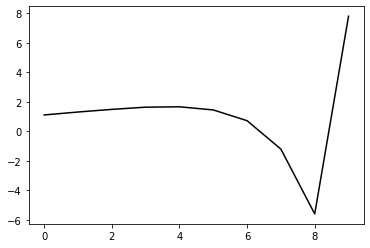

426800 0.2093097335064845
0.37940938343554437 -0.23225555432079173 -0.21814219349057967 -0.14875515905777031
[ 1.14822726  1.50269213  1.74533951  1.90390683  1.9394986   1.73329663
  1.00850766 -0.91328381 -5.29901668  7.93939855]


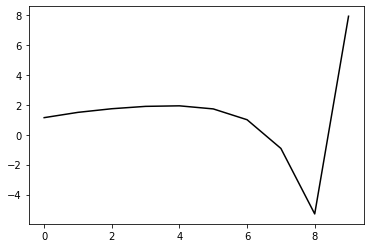

427900 0.32028520307898534
0.38934495961678645 -0.22019070541464963 -0.21185387481361478 -0.15031269962537458
[ 1.21274869  1.37780934  1.68042057  1.87839663  1.92865721  1.73028083
  1.01156001 -0.90530755 -5.29298527  7.91566355]


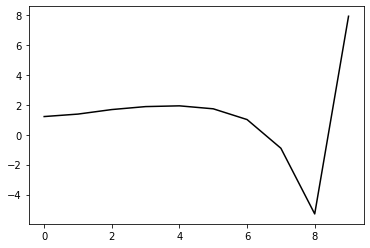

429000 0.5858640563491174
0.3813049577071847 -0.21590201885238258 -0.20624708978919792 -0.15587024562458665
[ 1.32228294  1.24769941  1.53126362  1.73989029  1.80809486  1.62012492
  0.9093587  -0.9987622  -5.37947835  7.89217484]


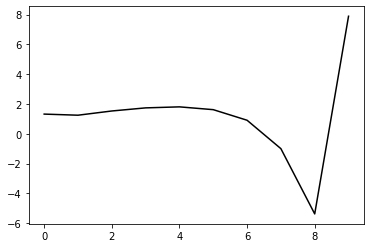

430100 0.2792709194338549
0.3974029538352488 -0.21570005496825786 -0.21068364090581446 -0.1476638610113394
[ 1.03407305  1.66430898  1.91174588  2.07406267  2.10473876  1.87812135
  1.12774965 -0.81861145 -5.24180656  7.90212638]


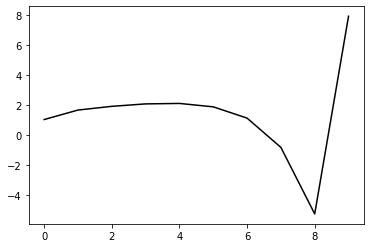

431200 0.2615232162886243
0.36796820028918126 -0.22534459561481152 -0.20974263622519387 -0.1553406230251658
[ 1.1888435   1.35720043  1.59460794  1.763359    1.79663333  1.57465196
  0.82867865 -1.11090083 -5.52358171  7.92743283]


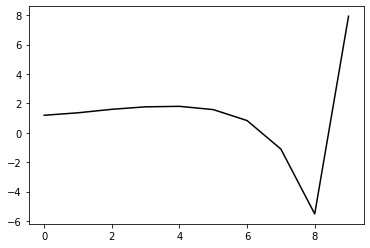

432300 0.3122305496409695
0.3747692386891126 -0.2247182262148058 -0.21416454941407578 -0.14446506709139365
[ 1.1961102   1.32080276  1.55849038  1.72516016  1.75818944  1.53517795
  0.78572548 -1.15929863 -5.58495364  7.91388244]


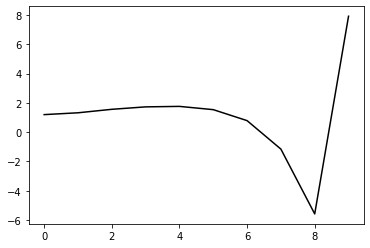

433400 0.21859404513171823
0.3876584978645227 -0.21585605339851305 -0.21041328273913995 -0.14762808581725326
[ 1.13322698  1.42337189  1.71820922  1.92359353  1.97816722  1.76972952
  1.02889004 -0.91085121 -5.3347775   7.88769769]


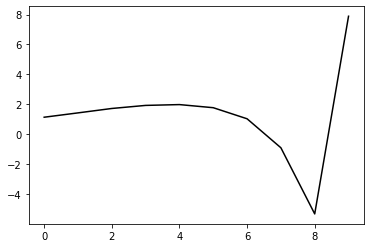

434500 0.22428215017158293
0.38719221855595537 -0.21648726258429124 -0.21023200201081568 -0.15041519680936843
[ 1.20203934  1.35835946  1.64609252  1.87433882  1.95884289  1.77543953
  1.05508715 -0.86588656 -5.27086455  7.89422171]


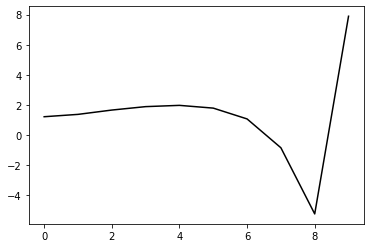

435600 0.1658718699716863
0.3795534629739845 -0.22295105488815867 -0.21292928261415098 -0.15447581888829487
[ 1.18000232  1.37522984  1.6492286   1.88667012  1.99837992  1.84409601
  1.14829509 -0.7514532  -5.13885425  7.94442153]


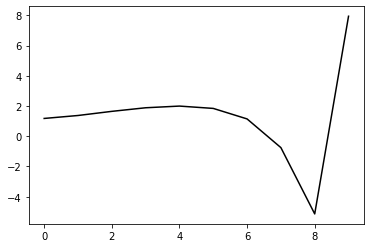

436700 0.190855911141296
0.37318658589158404 -0.22327415752435106 -0.21269354616866828 -0.14902538603349422
[ 1.13019366  1.45201196  1.65543095  1.83539355  1.90390242  1.71335753
  0.98229535 -0.95303916 -5.38393395  7.87354783]


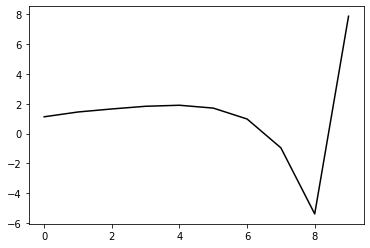

437800 0.19132289976957806
0.38851365977298113 -0.2159989254801769 -0.211280215532865 -0.1522194860463496
[ 1.09396084  1.50869033  1.80364914  2.01526376  2.1027034   1.93291577
  1.21792039 -0.70762601 -5.13695576  7.81244576]


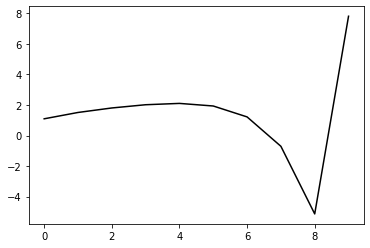

438900 0.38976913033922667
0.3813432071774661 -0.21499786343980137 -0.20926403342641295 -0.154077021606626
[ 1.2474455   1.27202403  1.52816184  1.75491704  1.86890538  1.73064081
  1.04832598 -0.84826208 -5.25147011  7.89343811]


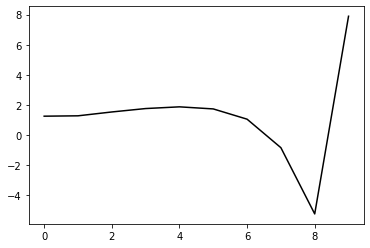

440000 0.3031656751551841
0.37326970135978715 -0.2110772186087714 -0.20508416823211242 -0.1573266525373001
[ 1.17271319  1.37375328  1.59546149  1.7879787   1.87734686  1.72050095
  1.02067696 -0.896828   -5.32931039  7.87231298]


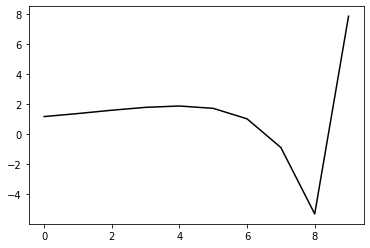

441100 0.20386864207649535
0.36929738485409147 -0.21757994188076651 -0.21123632172397705 -0.14821190752089936
[ 1.13259541  1.36920439  1.57735399  1.74284091  1.80959695  1.63983371
  0.93228757 -0.994114   -5.44176954  7.88816463]


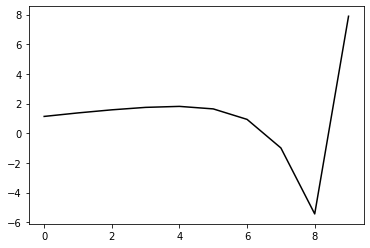

442200 0.21848062754325673
0.3691900834116567 -0.22425556007228362 -0.21737595970057205 -0.14672870581653435
[ 1.10852748  1.32457413  1.5789247   1.7799148   1.86983192  1.72411405
  1.04116415 -0.86528416 -5.29917518  7.89114165]


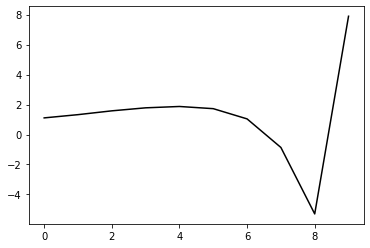

443300 0.29501659961937954
0.36647501288615963 -0.2152633176923509 -0.21062363456159544 -0.14867028248220207
[ 1.18315747  1.34260771  1.54411833  1.72349208  1.80287021  1.65015505
  0.96552867 -0.94246417 -5.38212403  7.8552708 ]


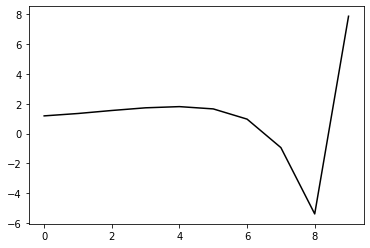

444400 0.2220324893206513
0.3817895552108234 -0.2109432979326014 -0.21223121748290777 -0.14338661714686587
[ 1.10271904  1.38275247  1.64351198  1.84303936  1.93460611  1.7971506
  1.13028998 -0.76255669 -5.19315272  7.84674528]


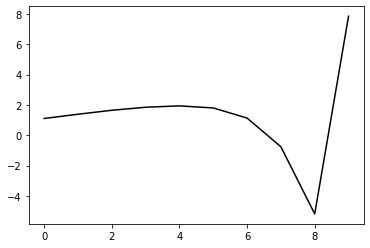

445500 0.21526070929898494
0.3767548078544014 -0.2135820207931398 -0.21374251006700443 -0.1462300816546645
[ 1.20149352  1.22793462  1.48612902  1.72530743  1.86682032  1.77943283
  1.16306946 -0.68442325 -5.07871012  7.95512246]


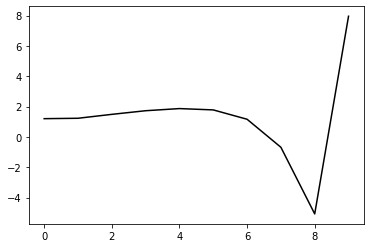

446600 0.17481155710623708
0.3727977941309631 -0.2170082802651045 -0.21672196526169277 -0.1425993347028773
[ 1.12528379  1.50112022  1.68098379  1.86639128  1.98140093  1.87298732
  1.23846068 -0.6278588  -5.04997191  7.90553429]


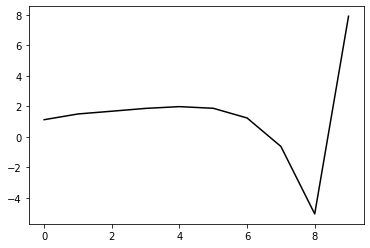

447700 0.18958892319333537
0.36934450438392874 -0.214507272055113 -0.21465578580051117 -0.14494034747475598
[ 1.18340605  1.43079794  1.63887675  1.81093285  1.91344166  1.80712548
  1.18157567 -0.67412817 -5.08680646  7.92272077]


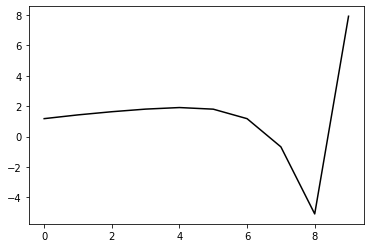

448800 0.23679693465805718
0.3708437479094367 -0.2162503735650362 -0.21803990790310812 -0.1415418272291008
[ 1.12205436  1.47975774  1.70129085  1.90084107  2.01822568  1.92889137
  1.32378439 -0.51497991 -4.92239626  7.8853427 ]


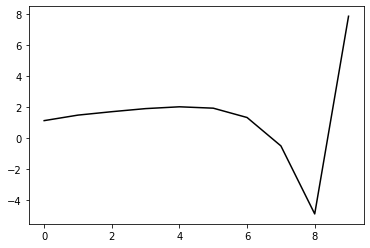

449900 0.37837657130252744
0.3419919776780902 -0.21247648776007855 -0.21169785426285642 -0.130363170751059
[ 1.16221497  1.32817702  1.37206697  1.43199406  1.44468152  1.27642994
  0.61527697 -1.26650726 -5.72031919  7.82291393]


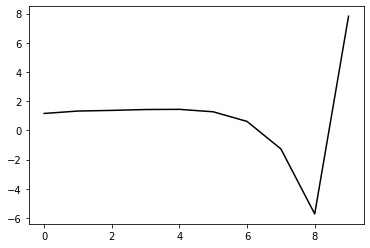

451000 0.5410843955597594
0.3494414126115133 -0.20065588290805486 -0.2009745278000882 -0.15687951266561076
[ 1.23760663  1.37151414  1.57578087  1.64939734  1.64819217  1.47106282
  0.8085287  -1.06986235 -5.51632059  7.87023864]


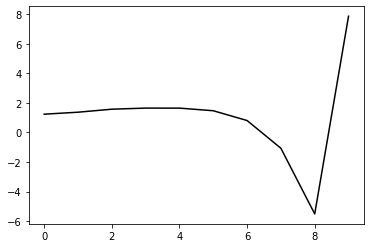

452100 0.22200869120506617
0.35788083742310617 -0.2104855978025378 -0.20995867264033918 -0.15257745774488637
[ 1.17107885  1.43299683  1.68936975  1.79956003  1.78858232  1.5933289
  0.92015246 -0.96365186 -5.41602073  7.79297332]


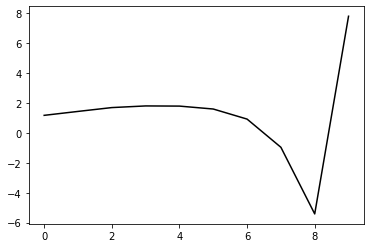

453200 0.2399641131842831
0.34661037394253436 -0.22754647840775072 -0.22105806991124785 -0.14594258241285468
[ 1.13696719  1.3007284   1.54265521  1.6983806   1.70240283  1.50054046
  0.82618349 -1.05129267 -5.4969371   7.83861312]


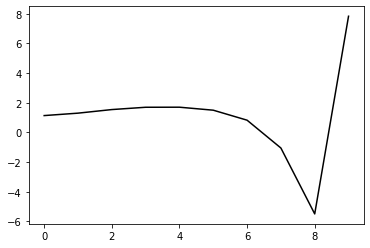

454300 0.2352278842222569
0.3598573700773365 -0.2183618045273142 -0.21770942778652097 -0.14381759682723844
[ 1.15612213  1.42530651  1.66087398  1.80439862  1.80190887  1.5759526
  0.87845762 -1.01449138 -5.47763422  7.87195162]


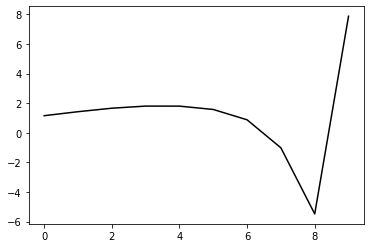

455400 0.265538040063473
0.3596446150440333 -0.20751750571916214 -0.2096640461184193 -0.15092162481549443
[ 1.15224659  1.41352407  1.70446209  1.89535473  1.9169895   1.69552313
  0.99519282 -0.89719564 -5.36383048  7.81886782]


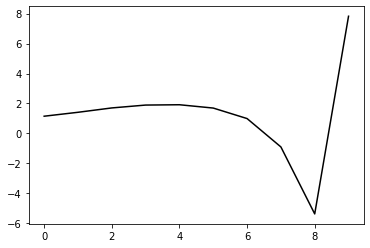

456500 0.2017670081791524
0.36463839162198347 -0.21075449248238468 -0.2146104636541449 -0.14515789488066108
[ 1.14312204  1.45783832  1.72526213  1.92690311  1.96654391  1.74901832
  1.04426923 -0.84961611 -5.31919269  7.83445112]


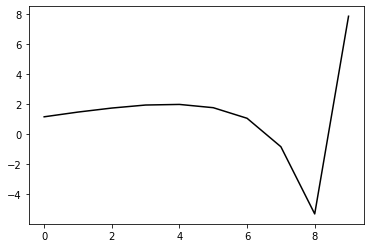

457600 0.16004679309574663
0.3557199379685474 -0.21379206165847053 -0.21510105939153845 -0.14986659361316523
[ 1.18530215  1.44067895  1.69053432  1.90781309  1.97725834  1.78264507
  1.0905938  -0.79032327 -5.2502604   7.90943401]


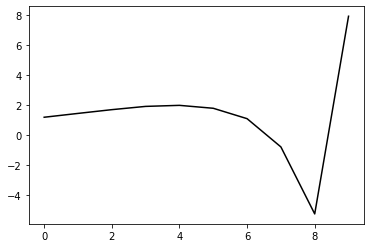

458700 0.19259409633737598
0.3683796260619362 -0.20846581593219934 -0.21450395328687036 -0.14851054740199512
[ 1.16144236  1.52521453  1.77018266  1.94798079  1.99833429  1.78817259
  1.07581305 -0.82098018 -5.2940367   7.91715918]


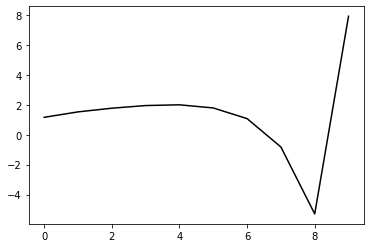

459800 0.2279966832270836
0.36779214911790126 -0.21737855759299368 -0.22019733299671151 -0.14930269224529608
[ 1.10547026  1.58818025  1.84406772  2.02595823  2.07833317  1.87287731
  1.16002347 -0.73529493 -5.20299691  7.88837963]


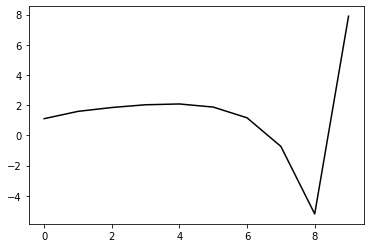

460900 0.2618449797713132
0.37711501751447774 -0.20723980953839108 -0.21571882589711588 -0.14763114122499546
[ 1.12228768  1.55930839  1.86016496  2.0525722   2.10550163  1.90105378
  1.1836924  -0.71714633 -5.19355902  7.91304366]


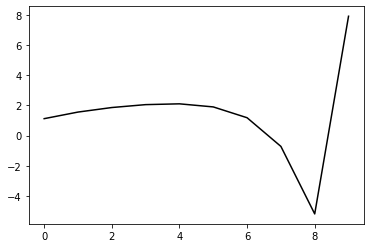

462000 0.21434623588331864
0.37328411325974215 -0.2071211889360913 -0.21564580260145202 -0.14899052929590126
[ 1.14047271  1.51019102  1.83103309  2.07846099  2.1762297   2.00856674
  1.31823354 -0.56062255 -5.02145585  7.81469055]


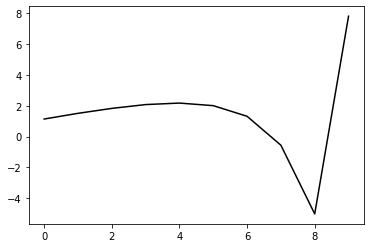

463100 0.22399423800177298
0.3585640553441903 -0.20990331613081517 -0.21673715388725948 -0.14276126705414033
[ 1.16461958  1.30083481  1.47221693  1.66831313  1.75239157  1.57728589
  0.87672819 -1.01333994 -5.49033578  7.87399624]


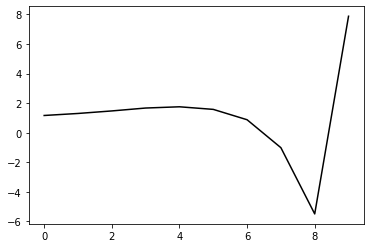

464200 0.25748773778808964
0.37162601081729957 -0.20107317828247734 -0.21318915975283906 -0.14599579578504082
[ 1.22058562  1.44896141  1.7062495   1.89399833  1.98376773  1.82498612
  1.13443038 -0.75112215 -5.22409648  7.84847286]


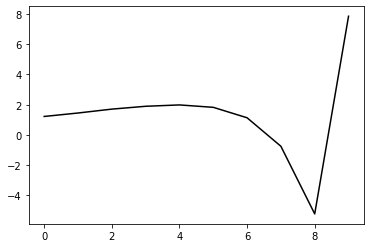

465300 0.378505095183723
0.36880484636261707 -0.2010322304608472 -0.21322918281678474 -0.14669460915519839
[ 1.2635683   1.32844133  1.6164984   1.83863314  1.94729432  1.81445323
  1.15027612 -0.7138766  -5.16963681  7.97597465]


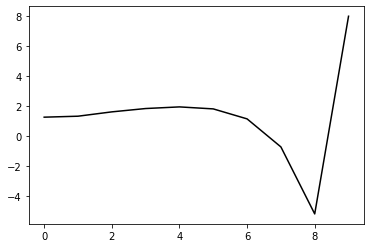

466400 0.2565103872252728
0.3611416235919838 -0.21557171908013523 -0.22167287026695132 -0.14123795668118933
[ 1.14451309  1.35162897  1.58070741  1.77315298  1.86303432  1.71696945
  1.04458429 -0.82645228 -5.28417444  7.82948393]


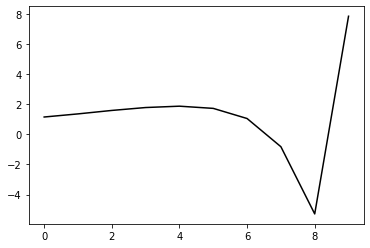

467500 0.20404923482199544
0.36360399682776257 -0.20292284164888588 -0.21262256655918726 -0.14506752871049028
[ 1.18310451  1.57097062  1.76420537  1.90887837  1.96261468  1.79159924
  1.10191376 -0.78427462 -5.25428031  7.90684385]


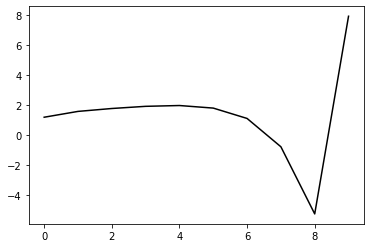

468600 0.16093344994870762
0.3668583998338675 -0.20371168092351097 -0.21386704716700694 -0.14702607463522882
[ 1.21184287  1.35273594  1.64375263  1.85974725  1.94208535  1.795779
  1.1322005  -0.73174082 -5.18285935  7.90128409]


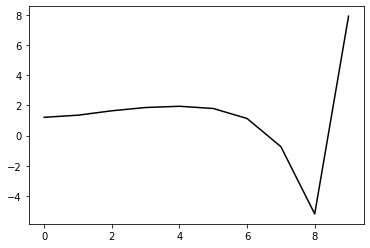

469700 0.2014885110305886
0.3499360344407583 -0.2166176094459562 -0.21961347056541003 -0.14511234562346476
[ 1.20624465  1.36857412  1.59820653  1.80111465  1.87593528  1.71307938
  1.03614753 -0.83844923 -5.29819407  7.95320743]


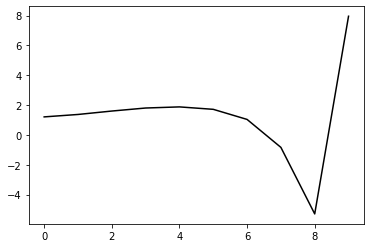

470800 0.1987894080276405
0.37210984211586884 -0.2035570782333169 -0.21513020992813892 -0.1432374698917842
[ 1.13018033  1.52183487  1.78883388  1.99184181  2.07410529  1.91472587
  1.23849176 -0.6376748  -5.10487339  7.91420478]


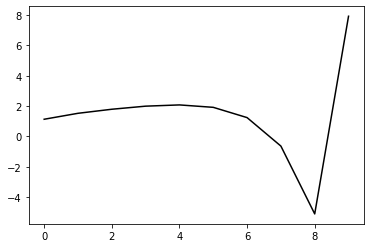

471900 0.259907836235376
0.3651201453660833 -0.21293605187497597 -0.22136069060906774 -0.14364810054193872
[ 1.15421046  1.52032314  1.75429168  1.95358635  2.04984636  1.90755663
  1.24856318 -0.61007069 -5.05807445  7.94491235]


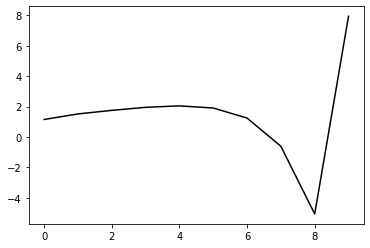

473000 0.29968419695728926
0.36902796460309695 -0.20709789219453859 -0.21842209452821706 -0.142067210942447
[ 1.0909311   1.42832576  1.6650383   1.84579468  1.92950142  1.78431593
  1.12471986 -0.73501905 -5.18910065  7.98399768]


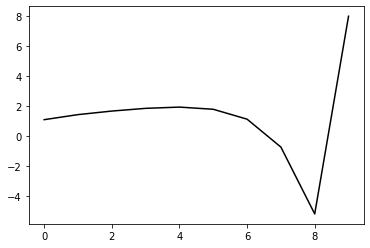

474100 0.16669479820091793
0.3702022759640047 -0.2052295345249638 -0.21657723919871547 -0.14593782562351418
[ 1.13484141  1.59333725  1.86645045  2.06699146  2.16358958  2.03281756
  1.38767092 -0.4592331  -4.90272846  7.97162888]


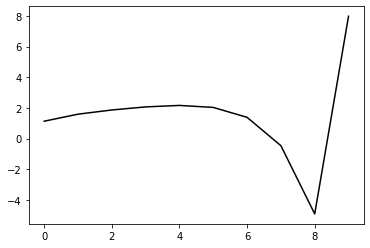

475200 0.2548723431528968
0.37152281225025563 -0.1953400595728579 -0.210687928941415 -0.14121482297742802
[ 1.20891834  1.41809651  1.63608724  1.78593204  1.83998836  1.67745305
  1.01171522 -0.84962626 -5.30458099  7.87645614]


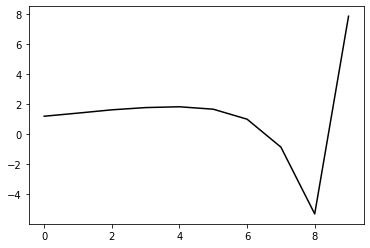

476300 0.23014130046951903
0.36535808508558437 -0.2033821889281839 -0.21502651192988229 -0.14251006577477182
[ 1.16530035  1.37558058  1.63211258  1.81613259  1.88367203  1.73266506
  1.08102811 -0.76533782 -5.20479377  7.93989293]


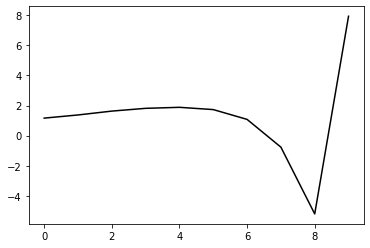

477400 0.24210766870791067
0.37109095489004934 -0.2035579301004044 -0.21717506220450036 -0.14403697459252585
[ 1.11829956  1.51162419  1.79535601  2.00817199  2.10089331  1.96630247
  1.32910539 -0.50431522 -4.93533809  7.87422083]


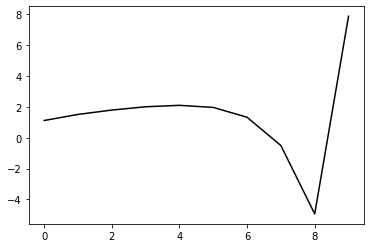

478500 0.2494181641087302
0.35251932122202223 -0.21011097521278335 -0.2188665376937023 -0.1424479801752546
[ 1.24476298  1.30637678  1.53989828  1.74765086  1.84363632  1.71040786
  1.07515724 -0.75509547 -5.18620826  7.92822903]


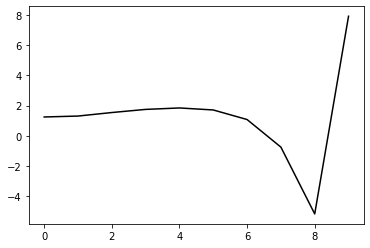

479600 0.17084423821561692
0.35899969636651663 -0.2092682982439391 -0.21901262743320318 -0.14283238206583698
[ 1.19097881  1.45239468  1.63517279  1.79164852  1.85452216  1.69279788
  1.03235772 -0.81784099 -5.26435153  7.90262988]


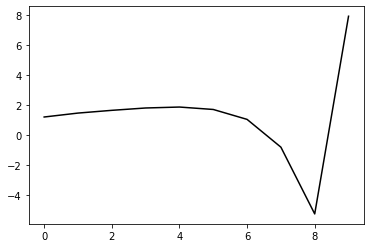

480700 0.1883240791963565
0.3584145720337686 -0.210216973577636 -0.21973764350547365 -0.14470132454001639
[ 1.18355515  1.42559738  1.65775323  1.82314917  1.88983835  1.73489147
  1.08091889 -0.76234157 -5.20191533  7.89114718]


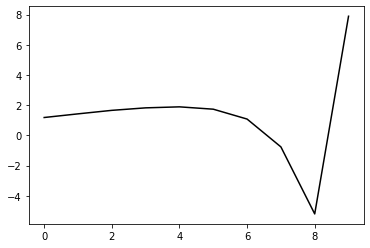

481800 0.34429802575921803
0.33478626709670817 -0.22501646540322645 -0.22784558101140434 -0.1322662351728427
[ 1.17190616  1.15314269  1.28467172  1.40913334  1.44133507  1.25965562
  0.58498423 -1.27555638 -5.73762684  7.85357156]


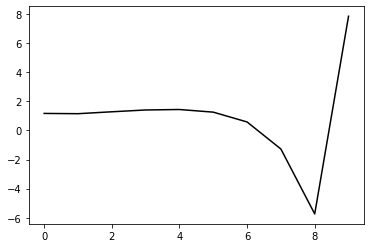

482900 0.5505908125938891
0.35936903340361676 -0.20227867927129545 -0.21292339027195495 -0.15569978256203526
[ 1.29844788  1.48698333  1.74475226  1.88351912  1.92136813  1.74478909
  1.07469843 -0.7806639  -5.2345594   7.9061902 ]


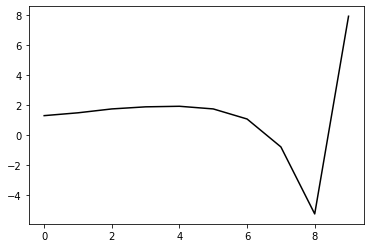

484000 0.5134936238815375
0.3653299510397621 -0.20071564954113358 -0.21295906276562354 -0.15485971929922865
[ 1.28483543  1.41760248  1.74111436  1.91703822  1.96066516  1.78613667
  1.12111108 -0.72681838 -5.17268303  7.91467258]


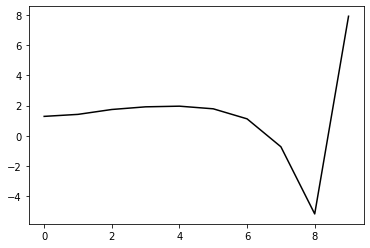

485100 0.1684585085750823
0.3701547017579831 -0.2038558826793302 -0.21790962443907497 -0.14948247102534676
[ 1.12439553  1.60736984  1.89690687  2.09088633  2.13818664  1.95216812
  1.27478663 -0.58408296 -5.04402798  7.98161353]


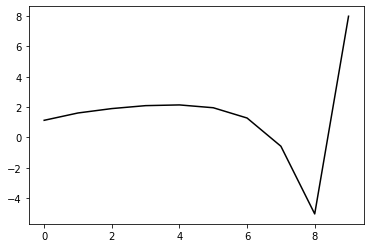

486200 0.27640963095979804
0.3488680113574649 -0.21960982797221787 -0.22719585284199892 -0.14236372997575913
[ 1.15178221  1.39344275  1.61775607  1.82320566  1.89348902  1.7192181
  1.04880453 -0.80245521 -5.25615773  7.84652946]


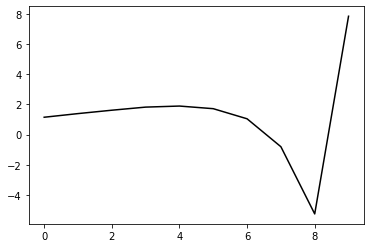

487300 0.25132514534094086
0.3418647651456487 -0.21103484644061338 -0.21989644745514322 -0.13894507480779109
[ 1.15468326  1.36852306  1.55654119  1.70784174  1.74045032  1.53131085
  0.82506634 -1.0595057  -5.55265335  7.8071418 ]


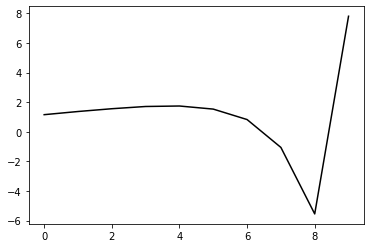

488400 0.23113326163476108
0.34921763361176317 -0.21038093553786558 -0.22041690557247423 -0.1437921793103789
[ 1.18175699  1.47133547  1.69815919  1.86374199  1.90864128  1.71047705
  1.01025856 -0.86831297 -5.35057049  7.90760133]


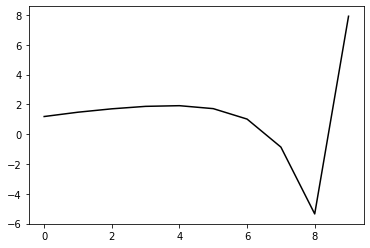

489500 0.22203957760644574
0.3597964802966916 -0.203886451097583 -0.2182378840190766 -0.14773261852345015
[ 1.22649182  1.41070547  1.72414455  1.93950246  2.01650167  1.84640048
  1.1681409  -0.6910897  -5.15608493  7.88499635]


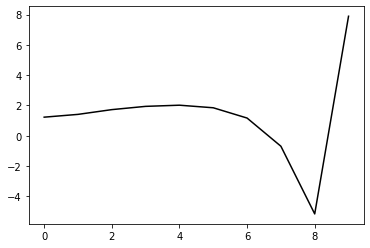

490600 0.16139956346503734
0.3525590906265337 -0.20826980488462735 -0.2192018500628845 -0.1478416913064422
[ 1.20263818  1.43755898  1.68533348  1.88084691  1.9493434   1.7689194
  1.07900496 -0.7892644  -5.25813477  7.93584113]


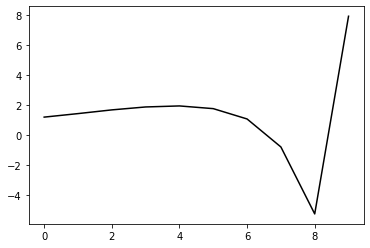

491700 0.23687858685240606
0.33935535964796226 -0.220345288297165 -0.2263649814722662 -0.13979400901795072
[ 1.13985108  1.35530904  1.5334064   1.71076645  1.77562491  1.59754072
  0.90986346 -0.95479772 -5.41581418  7.79355548]


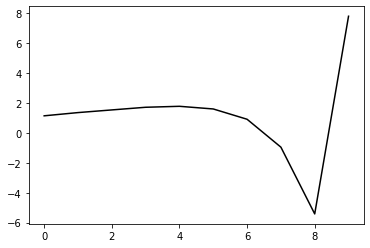

492800 0.19713997965778743
0.35951015645823076 -0.20295705388879107 -0.2179526210188799 -0.14740390250812888
[ 1.12129724  1.51043671  1.78994993  1.9824438   2.05083979  1.87668813
  1.18931993 -0.67796868 -5.145169    7.9102336 ]


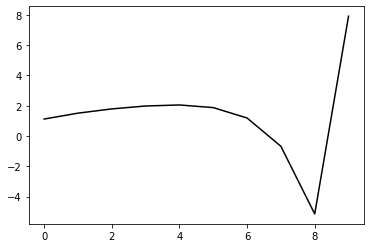

493900 0.30654929646057283
0.35532318780674954 -0.20438298623685072 -0.21864438678144205 -0.14728719874092105
[ 1.19754887  1.51950449  1.78106176  1.97080547  2.03979086  1.86473393
  1.17532344 -0.69476885 -5.16344384  7.91326189]


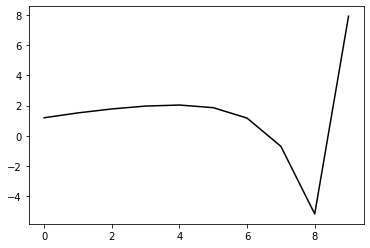

495000 0.41746910632091994
0.34501764380159977 -0.19296238523170933 -0.2074366770089922 -0.154419958628145
[ 1.21347285  1.349775    1.58182391  1.75544598  1.80396488  1.61245761
  0.9096636  -0.97255801 -5.45407903  7.87812644]


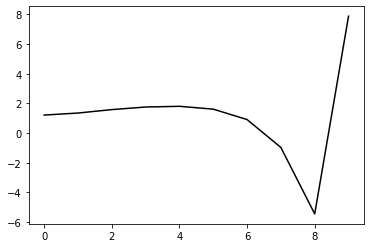

496100 0.17383731997380988
0.364385512949724 -0.20388520050143377 -0.21869202815757197 -0.14917710629585187
[ 1.10800871  1.51060019  1.81113186  1.98541076  2.02787757  1.82929921
  1.1200448  -0.76669207 -5.24674943  7.90654007]


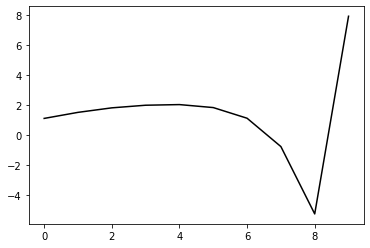

497200 0.27774065431324685
0.35694743513794 -0.20758274381569175 -0.2204814260476418 -0.15241323788566094
[ 1.2397535   1.37712003  1.68032105  1.92610788  2.03186643  1.88225153
  1.2119167  -0.64436162 -5.10137573  7.90339791]


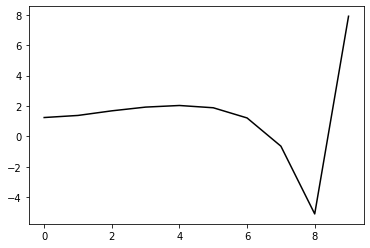

498300 0.301545417313542
0.32917867526093586 -0.218149451981725 -0.2240872834674612 -0.14375935008400717
[ 1.19843703  1.25927616  1.43063234  1.62867852  1.71496267  1.55021666
  0.86449457 -1.00823716 -5.48726466  7.86486987]


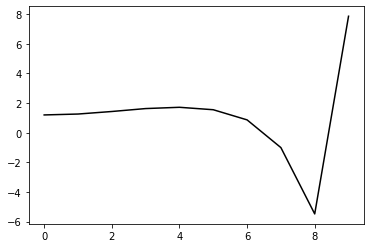

499400 0.30514420669344944
0.3373728621245668 -0.21614006576569317 -0.22305625509982932 -0.1430657312649458
[ 1.23894086  1.37698279  1.54329587  1.69228629  1.74755773  1.55971338
  0.85154753 -1.0416892  -5.53455157  7.81673959]


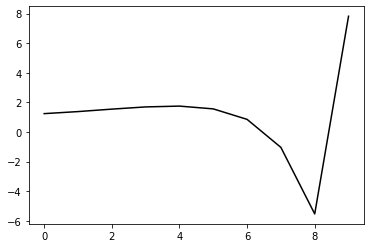

In [17]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if math.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
    if j%11==0: 
        print(j*100, Error_func(h, m2, lam, alpha, beta, Positive[j%10], Negative[j%10]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()

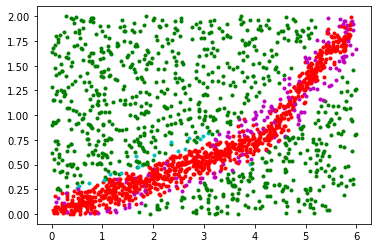

In [18]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()